## 전처리

In [17]:
# 필요한 모듈 불러오기
import pandas as pd
import re
from konlpy.tag import Okt
from hanspell import spell_checker
okt = Okt()

In [18]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
stopword_file_path = "C:/Users/jedim/OneDrive/바탕 화면/2024-1/데이터 사이언스/데이터사이언스 4팀 프로젝트(v0.2)/stopword.txt"
stopword_list = []

# 파일 열기
with open(stopword_file_path, 'r', encoding='utf-8') as stopword_file:
    # 파일의 각 줄에 대해 반복
    for line in stopword_file:
        # 줄의 앞뒤 공백 제거 후 불용어 리스트에 추가
        stopword_list.append(line.strip())

print(stopword_list)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어'

### 1대 이승만 대통령

In [3]:
first_lee = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\1대_이승만_취임사.txt", 'r', encoding='utf-8')
lines_first_lee = first_lee.readlines()
first_lee.close()
print(lines_first_lee)

['[이승만_1대_취임사]\n', '\n', '여러 번 죽었던 이 몸이 하나님의 은혜와 동포의 애호(愛護)로 지금까지 살아오다가 오늘에 이와 같이 영광스러운 추대(推戴)를 받은 나로서는 일변(一邊) 감격(感激)한 마음과 일변 심당(心當)키 어려운 책임을 지고 두려운 생각을 금하기 어렵습니다. 기쁨이 극(極)하면 우슴으로 변하여 눈물이 된다는 것을 글에서 보고 말을 들었든 것입니다. 요사이 나의 치하(致賀)하는 남여동포가 모다 눈물을 씻으며 고개를 돌립니다. 각처에서 축전 오는 것을 보면 모다 눈물을 금하기 어렵다합니다. 나는 본래 나의 감상으로 남에게 촉감(觸感)될 말을 하지 않기로 매양 힘쓰는 사람입니다. 그러나 목석간담(木石肝膽)이 아닌만치 뼈에 맺히는 눈물을 금하기 어려웁니다. 이것은 다름이 아니라 40년 전에 잃었던 나라를 다시 찾는 것이요 죽었던 민족이 다시 사는 것이 오날 이에서 표면(表面)되는 까닭입니다.\n', '\n', '대통령 선서하는 이 자리에서 하나님과 동포 앞에서 나의 직무를 다하기로 일층(一層) 더 결심하며 맹서합니다. 따라서 여러 동포들도 오늘 한층 더 분발해서 각각 자기의 몸을 잊어버리고 민족전체의 행복을 위하여 대한민국의 국민 된 영광스럽고 신성한 직책을 다 하도록 마음으로 맹서하기를 바랍니다. 여러분이 나에게 맡기는 직책은 누구나 한사람의 힘으로 성공할 수는 없는 것입니다. 이 중대한 책임을 내가 용감히 부담할 때에 내 기능이나 지혜를 믿고 나서는 것이 결코 아니며 전혀 애국남여의 합의 합력함으로만 진행할 수 있는 것을 믿는 바입니다. 이번 우리 총선거의 대성공을 모든 우방들이 칭찬하기에 이른 것은 우리애국남여가 단순한 애국정신으로 각각 직책을 다한 연고(緣故)입니다. 그 결과로 국회성립이 또한 완전무결한 민주주의제로 조직되어 2, 3 정당이 그 안에 대표가 되었고 무소속과 좌익색태(左翼色態)로 주목받은 대의원이 또한 여럿이 있게 된 것입니다.\n', '\n', '기왕 경험으로 추측하면 이 많은 국회의원 중에서 사상충돌로 분쟁분

In [4]:
print(len(lines_first_lee))

11


In [5]:
# 숫자 및 특수문자 제거
for i in range(len(lines_first_lee)):
    lines_first_lee[i] = re.sub(r'[0-9]', ' ', lines_first_lee[i])
    lines_first_lee[i] = re.sub(r'\W+', ' ', lines_first_lee[i])

print(lines_first_lee)

[' 이승만_ 대_취임사 ', ' ', '여러 번 죽었던 이 몸이 하나님의 은혜와 동포의 애호 愛護 로 지금까지 살아오다가 오늘에 이와 같이 영광스러운 추대 推戴 를 받은 나로서는 일변 一邊 감격 感激 한 마음과 일변 심당 心當 키 어려운 책임을 지고 두려운 생각을 금하기 어렵습니다 기쁨이 극 極 하면 우슴으로 변하여 눈물이 된다는 것을 글에서 보고 말을 들었든 것입니다 요사이 나의 치하 致賀 하는 남여동포가 모다 눈물을 씻으며 고개를 돌립니다 각처에서 축전 오는 것을 보면 모다 눈물을 금하기 어렵다합니다 나는 본래 나의 감상으로 남에게 촉감 觸感 될 말을 하지 않기로 매양 힘쓰는 사람입니다 그러나 목석간담 木石肝膽 이 아닌만치 뼈에 맺히는 눈물을 금하기 어려웁니다 이것은 다름이 아니라 년 전에 잃었던 나라를 다시 찾는 것이요 죽었던 민족이 다시 사는 것이 오날 이에서 표면 表面 되는 까닭입니다 ', ' ', '대통령 선서하는 이 자리에서 하나님과 동포 앞에서 나의 직무를 다하기로 일층 一層 더 결심하며 맹서합니다 따라서 여러 동포들도 오늘 한층 더 분발해서 각각 자기의 몸을 잊어버리고 민족전체의 행복을 위하여 대한민국의 국민 된 영광스럽고 신성한 직책을 다 하도록 마음으로 맹서하기를 바랍니다 여러분이 나에게 맡기는 직책은 누구나 한사람의 힘으로 성공할 수는 없는 것입니다 이 중대한 책임을 내가 용감히 부담할 때에 내 기능이나 지혜를 믿고 나서는 것이 결코 아니며 전혀 애국남여의 합의 합력함으로만 진행할 수 있는 것을 믿는 바입니다 이번 우리 총선거의 대성공을 모든 우방들이 칭찬하기에 이른 것은 우리애국남여가 단순한 애국정신으로 각각 직책을 다한 연고 緣故 입니다 그 결과로 국회성립이 또한 완전무결한 민주주의제로 조직되어 정당이 그 안에 대표가 되었고 무소속과 좌익색태 左翼色態 로 주목받은 대의원이 또한 여럿이 있게 된 것입니다 ', ' ', '기왕 경험으로 추측하면 이 많은 국회의원 중에서 사상충돌로 분쟁분열을 염려한 사람들이 없지 않았던 것입니다 그러나 중

In [6]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_first_lee = []
for line in lines_first_lee:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_first_lee.append(filtered_line)

# 결과 출력
print(filtered_lines_first_lee)

['이승만_ 대_취임사', '', '여러 번 죽었던 몸이 하나님의 은혜와 동포의 애호 愛護 지금까지 살아오다가 오늘에 이와 영광스러운 추대 推戴 받은 나로서는 일변 一邊 감격 感激 한 마음과 일변 심당 心當 키 어려운 책임을 지고 두려운 생각을 금하기 어렵습니다 기쁨이 극 極 하면 우슴으로 변하여 눈물이 된다는 것을 글에서 보고 말을 들었든 것입니다 요사이 나의 치하 致賀 하는 남여동포가 모다 눈물을 씻으며 고개를 돌립니다 각처에서 축전 오는 것을 보면 모다 눈물을 금하기 어렵다합니다 나는 본래 나의 감상으로 남에게 촉감 觸感 될 말을 하지 않기로 매양 힘쓰는 사람입니다 목석간담 木石肝膽 아닌만치 뼈에 맺히는 눈물을 금하기 어려웁니다 이것은 다름이 아니라 전에 잃었던 나라를 다시 찾는 것이요 죽었던 민족이 다시 사는 것이 오날 이에서 표면 表面 되는 까닭입니다', '', '대통령 선서하는 자리에서 하나님과 동포 나의 직무를 다하기로 일층 一層 더 결심하며 맹서합니다 여러 동포들도 오늘 한층 더 분발해서 자기의 몸을 잊어버리고 민족전체의 행복을 대한민국의 국민 된 영광스럽고 신성한 직책을 다 하도록 마음으로 맹서하기를 바랍니다 여러분이 나에게 맡기는 직책은 누구나 한사람의 힘으로 성공할 수는 없는 것입니다 중대한 책임을 내가 용감히 부담할 때에 내 기능이나 지혜를 믿고 나서는 것이 결코 아니며 전혀 애국남여의 합의 합력함으로만 진행할 수 있는 것을 믿는 바입니다 총선거의 대성공을 모든 우방들이 칭찬하기에 이른 것은 우리애국남여가 단순한 애국정신으로 직책을 다한 연고 緣故 입니다 결과로 국회성립이 완전무결한 민주주의제로 조직되어 정당이 안에 대표가 되었고 무소속과 좌익색태 左翼色態 주목받은 대의원이 여럿이 있게 된 것입니다', '', '기왕 경험으로 추측하면 많은 국회의원 사상충돌로 분쟁분열을 염려한 사람들이 없지 않았던 것입니다 중대 문제에 종종 극열한 쟁론 爭論 있다가도 필경 畢竟 표결될 때에는 다 공정한 자유의견을 표시하여 순리적으로 진행하게 되므로 헌법제정

In [7]:
print(len(filtered_lines_first_lee))

11


### 2대 이승만 대통령

In [6]:
second_lee = open("C:/Users/jedim/OneDrive/바탕 화면/2024-1/데이터 사이언스/데이터사이언스 4팀 프로젝트(v0.2)/역대 대통령 취임사/2대_이승만_취임사.txt", 'r', encoding='utf-8')
lines_second_lee = second_lee.readlines()
second_lee.close()
print(lines_second_lee)

['[이승만_2대_취임사]\n', '\n', '오늘 취임식에서 내가 다시 지게되는 책임은 내가 할 수만 있으면 지지 않았을 것임니다.\n', '\n', '지나간 사년동안에 행한 정부일은 쉬운 일이 아니였던 것임니다. 이 앞으로 오는 일은 좀 r쉬우리라고는 볼 수업는 터임니다.\n', '\n', '우리 사람하는 국민이 이 위험한 때를 당해서 정부관료나 일반평민이나 너 나를 물론하고 누구나 각각 나라의 직책과 민족으 사명외에는 다른 것은 감히 복종할 생각도 못할 것임니다.\n', '\n', '우리 생명도 우리의 것이 아님니다. 우리 앞에 당한 노력과 고초를 우리들이 피하고 우리 몸의 평안과 마음에 원하는 것을 감히 생각도 할 수 없는 것임니다.\n', '\n', '노소를 막론하고 할 수 있는대로는 우리의 최선을 다해야 할 것임니다. 밖에서 노력해서 이남이북의 우리 국민을 먹여 살릴 일을 하든지 전쟁에 나가서 악독한 원수를 처 물리치든지 정부에서 무슨 직책을 맡아 진행하든지 각각 실수하거나 실패하고는 아니 될 것임니다.\n', '\n', '이때는 우리가 다 희생적으로 공헌할 때임니다. 모든 한인남녀는 다같이 사명을 맡아서 고상하고 영웅스러운 공헌이 되어야 할 것임니다.\n', '\n', '백만명의 반수되는 우리 청년들이 희생적 제단에 저의 생명을 바쳐서 냉정한 담량과 백절불굴하는 결심으로 무도한 공산당의 침략에서 우리를 구해내기 위하여 싸우는 중임니다.\n', '\n', '일천만 우리 동포는 가옥을 잃어버리고 도로에 방황하니 무렴지욕을 가진 적군들이 우리를 정복하자는 희망으로 파괴소탕한 중에서 살길을 구하고 있는 중임니다.\n', '\n', '이북에 칠백만 우리 형제자매들은 적색학정아래서 피를 흘리고 애통하고 있는 것을 우리가 다 구해내지 않고서는 잠시하도 평안히 쉴 수 없는 것임니다.\n', '\n', '이 불의한 전쟁의 참혹한 전재로 우리나라는 거의 다 적지가 되었으니 이백만 우리 동포가 잔혹한 사상을 당하게 된 것임니다.\n', '\n', '우리 반도의 한 가

In [7]:
print(len(lines_second_lee))

89


In [8]:
# 숫자 및 특수문자 제거
for i in range(len(lines_second_lee)):
    lines_second_lee[i] = re.sub(r'[0-9]', ' ', lines_second_lee[i])
    lines_second_lee[i] = re.sub(r'\W+', ' ', lines_second_lee[i])

print(lines_second_lee)

[' 이승만_ 대_취임사 ', ' ', '오늘 취임식에서 내가 다시 지게되는 책임은 내가 할 수만 있으면 지지 않았을 것임니다 ', ' ', '지나간 사년동안에 행한 정부일은 쉬운 일이 아니였던 것임니다 이 앞으로 오는 일은 좀 r쉬우리라고는 볼 수업는 터임니다 ', ' ', '우리 사람하는 국민이 이 위험한 때를 당해서 정부관료나 일반평민이나 너 나를 물론하고 누구나 각각 나라의 직책과 민족으 사명외에는 다른 것은 감히 복종할 생각도 못할 것임니다 ', ' ', '우리 생명도 우리의 것이 아님니다 우리 앞에 당한 노력과 고초를 우리들이 피하고 우리 몸의 평안과 마음에 원하는 것을 감히 생각도 할 수 없는 것임니다 ', ' ', '노소를 막론하고 할 수 있는대로는 우리의 최선을 다해야 할 것임니다 밖에서 노력해서 이남이북의 우리 국민을 먹여 살릴 일을 하든지 전쟁에 나가서 악독한 원수를 처 물리치든지 정부에서 무슨 직책을 맡아 진행하든지 각각 실수하거나 실패하고는 아니 될 것임니다 ', ' ', '이때는 우리가 다 희생적으로 공헌할 때임니다 모든 한인남녀는 다같이 사명을 맡아서 고상하고 영웅스러운 공헌이 되어야 할 것임니다 ', ' ', '백만명의 반수되는 우리 청년들이 희생적 제단에 저의 생명을 바쳐서 냉정한 담량과 백절불굴하는 결심으로 무도한 공산당의 침략에서 우리를 구해내기 위하여 싸우는 중임니다 ', ' ', '일천만 우리 동포는 가옥을 잃어버리고 도로에 방황하니 무렴지욕을 가진 적군들이 우리를 정복하자는 희망으로 파괴소탕한 중에서 살길을 구하고 있는 중임니다 ', ' ', '이북에 칠백만 우리 형제자매들은 적색학정아래서 피를 흘리고 애통하고 있는 것을 우리가 다 구해내지 않고서는 잠시하도 평안히 쉴 수 없는 것임니다 ', ' ', '이 불의한 전쟁의 참혹한 전재로 우리나라는 거의 다 적지가 되었으니 이백만 우리 동포가 잔혹한 사상을 당하게 된 것임니다 ', ' ', '우리 반도의 한 가족도 비참한 지경을 당하지 않은 사람이 드물게 되었으며 각각 우리 

In [9]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_second_lee = []
for line in lines_second_lee:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_second_lee.append(filtered_line)

# 결과 출력
print(filtered_lines_second_lee)

['이승만_ 대_취임사', '', '오늘 취임식에서 내가 다시 지게되는 책임은 내가 할 수만 있으면 지지 않았을 것임니다', '', '지나간 사년동안에 행한 정부일은 쉬운 일이 아니였던 것임니다 앞으로 오는 일은 r쉬우리라고는 볼 수업는 터임니다', '', '사람하는 국민이 위험한 때를 당해서 정부관료나 일반평민이나 나를 물론하고 누구나 나라의 직책과 민족으 사명외에는 것은 감히 복종할 생각도 못할 것임니다', '', '생명도 우리의 것이 아님니다 앞에 당한 노력과 고초를 우리들이 피하고 몸의 평안과 마음에 원하는 것을 감히 생각도 할 수 없는 것임니다', '', '노소를 할 수 있는대로는 우리의 최선을 다해야 할 것임니다 밖에서 노력해서 이남이북의 국민을 먹여 살릴 일을 전쟁에 나가서 악독한 원수를 처 물리치든지 정부에서 직책을 맡아 진행하든지 실수하거나 실패하고는 될 것임니다', '', '이때는 우리가 다 희생적으로 공헌할 때임니다 모든 한인남녀는 다같이 사명을 맡아서 고상하고 영웅스러운 공헌이 되어야 할 것임니다', '', '백만명의 반수되는 청년들이 희생적 제단에 저의 생명을 바쳐서 냉정한 담량과 백절불굴하는 결심으로 무도한 공산당의 침략에서 우리를 구해내기 싸우는 중임니다', '', '일천만 동포는 가옥을 잃어버리고 도로에 방황하니 무렴지욕을 가진 적군들이 우리를 정복하자는 희망으로 파괴소탕한 살길을 구하고 있는 중임니다', '', '이북에 칠백만 형제자매들은 적색학정아래서 피를 흘리고 애통하고 있는 것을 우리가 다 구해내지 않고서는 잠시하도 평안히 쉴 수 없는 것임니다', '', '불의한 전쟁의 참혹한 전재로 우리나라는 다 적지가 되었으니 이백만 동포가 잔혹한 사상을 당하게 된 것임니다', '', '반도의 한 가족도 비참한 지경을 당하지 않은 사람이 드물게 되었으며 포악한 원수들의 죄를 징벌하고 파괴된 나라에서 모라내라는 요청을 정당한 이유를 안 가진 사람이 없는 것임니다', '', '환난에 우리는 한 가지 경력으로 배운 것이 있으니 이것은 동족상애

### 3대 이승만 대통령

In [12]:
third_lee = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\3대_이승만_취임사.txt", 'r', encoding='utf-8')
lines_third_lee = third_lee.readlines()
third_lee.close()
print(lines_third_lee)

['[이승만_3대_취임사]\n', '\n', '나의 사랑하는 동포 여러분. 내가 오늘 또 한번 우리 민중 앞에 서서 대통령 취임 선언식을 제3차로 행하게 된 것입니다.\n', '\n', '우리 동포들이 나의 지도에 신념을 표시한 것에 대해서 내가 겸손한 마음과 영광스러운 뜻으로 평화할 때에나 전쟁 중에서나 또 국내 국외의 관계를 막론하고 우리 민족의 복리를 위해서 내 성심과 능력을 다하기를 맹서하는 바입니다.\n', '\n', '이 다음 4년은 우리 역사에 제일 긴절한 시대입니다. 우리가 앞에 당한 여러 가지 큰 문제를 위해서 많은 희생을 당하며 여기까지 나온 역사를 대강 생각해 보는 것이 필요한 것입니다.\n', '\n', '우리의 제일 긴급하고 절박한 문제는 통일입니다. 한국이 분열된 것을 잠시라도 그저 두는 것은 우리나라 국민에게 불공평한 것이며 세계평화를 위협하는 것입니다. 그 반면으로 한국을 통일시키는 것은 유엔의 큰 영예가 될 것이며 또 국제상 관계에 이유와 공의를 믿는 모든 나라에 큰 성공일 것입니다.\n', '\n', '우리 국제상의 둘째로 큰 문제는 일본이 공산당과 점점 친밀하여가는 것입니다. 일본이 사절단을 중공과 한국 이북에 연속 보내서 공산당들과 결속을 만들고 있는 것입니다.\n', '\n', '우리 경찰이 날마다 우리나라에 잠입하여 들어오는 공산당들을 잡아드려서 저의들의 행동을 밝히 드려다 보고 있는 것입니다. 이 사람들은 군기와 재정을 상당히 준비해 가지고 들어와서 우리나라에 난동과 혁명운동을 선동하는 것이 목적인 것입니다. 만일 일본이 북경과 모스코의 공산당들의 뒤를 계속 따라간다면 어떠한 결과가 생길 것입니까. 자유세계가 이 위태한 것을 제때에 각오하고 일어설 것입니다.\n', '\n', '다음으로 우리나라의 내정을 말하자면 내 생각에는 지나간 첫 8년 동안에 민주정체의 진보를 성취한 것은 실로 역사상 드문 성공입니다. 일본의 선전에 빠진 사람들은 한인들이 능히 자주 국가를 진행할 준비가 되었을까를 의심했던 것입니다.\n', '\n

In [13]:
print(len(lines_third_lee))

43


In [14]:
# 숫자 및 특수문자 제거
for i in range(len(lines_third_lee)):
    lines_third_lee[i] = re.sub(r'[0-9]', ' ', lines_third_lee[i])
    lines_third_lee[i] = re.sub(r'\W+', ' ', lines_third_lee[i])

print(lines_third_lee)

[' 이승만_ 대_취임사 ', ' ', '나의 사랑하는 동포 여러분 내가 오늘 또 한번 우리 민중 앞에 서서 대통령 취임 선언식을 제 차로 행하게 된 것입니다 ', ' ', '우리 동포들이 나의 지도에 신념을 표시한 것에 대해서 내가 겸손한 마음과 영광스러운 뜻으로 평화할 때에나 전쟁 중에서나 또 국내 국외의 관계를 막론하고 우리 민족의 복리를 위해서 내 성심과 능력을 다하기를 맹서하는 바입니다 ', ' ', '이 다음 년은 우리 역사에 제일 긴절한 시대입니다 우리가 앞에 당한 여러 가지 큰 문제를 위해서 많은 희생을 당하며 여기까지 나온 역사를 대강 생각해 보는 것이 필요한 것입니다 ', ' ', '우리의 제일 긴급하고 절박한 문제는 통일입니다 한국이 분열된 것을 잠시라도 그저 두는 것은 우리나라 국민에게 불공평한 것이며 세계평화를 위협하는 것입니다 그 반면으로 한국을 통일시키는 것은 유엔의 큰 영예가 될 것이며 또 국제상 관계에 이유와 공의를 믿는 모든 나라에 큰 성공일 것입니다 ', ' ', '우리 국제상의 둘째로 큰 문제는 일본이 공산당과 점점 친밀하여가는 것입니다 일본이 사절단을 중공과 한국 이북에 연속 보내서 공산당들과 결속을 만들고 있는 것입니다 ', ' ', '우리 경찰이 날마다 우리나라에 잠입하여 들어오는 공산당들을 잡아드려서 저의들의 행동을 밝히 드려다 보고 있는 것입니다 이 사람들은 군기와 재정을 상당히 준비해 가지고 들어와서 우리나라에 난동과 혁명운동을 선동하는 것이 목적인 것입니다 만일 일본이 북경과 모스코의 공산당들의 뒤를 계속 따라간다면 어떠한 결과가 생길 것입니까 자유세계가 이 위태한 것을 제때에 각오하고 일어설 것입니다 ', ' ', '다음으로 우리나라의 내정을 말하자면 내 생각에는 지나간 첫 년 동안에 민주정체의 진보를 성취한 것은 실로 역사상 드문 성공입니다 일본의 선전에 빠진 사람들은 한인들이 능히 자주 국가를 진행할 준비가 되었을까를 의심했던 것입니다 ', ' ', '오늘 와서 보면 우리 정부는 삼권분립으로 행정부 입법부 

In [15]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_third_lee = []
for line in lines_third_lee:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_third_lee.append(filtered_line)

# 결과 출력
print(filtered_lines_third_lee)


['이승만_ 대_취임사', '', '나의 사랑하는 동포 내가 오늘 한번 민중 앞에 서서 대통령 취임 선언식을 차로 행하게 된 것입니다', '', '동포들이 나의 지도에 신념을 표시한 것에 내가 겸손한 마음과 영광스러운 뜻으로 평화할 때에나 전쟁 중에서나 국내 국외의 관계를 민족의 복리를 내 성심과 능력을 다하기를 맹서하는 바입니다', '', '년은 역사에 제일 긴절한 시대입니다 우리가 앞에 당한 여러 가지 큰 문제를 많은 희생을 당하며 여기까지 나온 역사를 대강 생각해 보는 것이 필요한 것입니다', '', '우리의 제일 긴급하고 절박한 문제는 통일입니다 한국이 분열된 것을 잠시라도 두는 것은 우리나라 국민에게 불공평한 것이며 세계평화를 위협하는 것입니다 반면으로 한국을 통일시키는 것은 유엔의 큰 영예가 될 것이며 국제상 관계에 이유와 공의를 믿는 모든 나라에 큰 성공일 것입니다', '', '국제상의 둘째로 큰 문제는 일본이 공산당과 점점 친밀하여가는 것입니다 일본이 사절단을 중공과 한국 이북에 연속 보내서 공산당들과 결속을 만들고 있는 것입니다', '', '경찰이 날마다 우리나라에 잠입하여 들어오는 공산당들을 잡아드려서 저의들의 행동을 밝히 드려다 보고 있는 것입니다 사람들은 군기와 재정을 상당히 준비해 가지고 들어와서 우리나라에 난동과 혁명운동을 선동하는 것이 목적인 것입니다 일본이 북경과 모스코의 공산당들의 뒤를 계속 따라간다면 결과가 생길 것입니까 자유세계가 위태한 것을 제때에 각오하고 일어설 것입니다', '', '우리나라의 내정을 내 생각에는 지나간 첫 동안에 민주정체의 진보를 성취한 것은 역사상 드문 성공입니다 일본의 선전에 빠진 사람들은 한인들이 능히 자주 국가를 진행할 준비가 되었을까를 의심했던 것입니다', '', '오늘 와서 보면 정부는 삼권분립으로 행정부 입법부 사법부가 병행해서 발전되고 있는 것이며 우리가 전국적으로 지방적으로 여러 번 선거를 집행했었는데 매번에 각오가 깊이 박히는 것은 우리나라의 주권이 민중에게 있다는 것이며 유권자들의 권리

### 4대 윤보선 대통령

In [16]:
fourth_yoon = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\4대_윤보선_취임사.txt", 'r', encoding='utf-8')
lines_fourth_yoon = fourth_yoon.readlines()
fourth_yoon.close()
print(lines_fourth_yoon)

['[윤보선_4대_취임사]\n', '\n', '제2공화국의 초대대통령으로 영예의 당선을 얻은 어제 나의 감격은 선서식을 거행하는 오늘에는 영광된 의무감과 무거운 책임감으로 변해 졌읍니다. 비록 엄숙 해야 할 식전 이기는 하나 감격과 책임감이 교차되는 이 순간에 있어 벅차 오르는 소회의 일단을 간단히 말씀 드리려는 것을 허물치 마시기를 바라는 바입니다.\n', '첫째, 나같이 부덕하고 무능한 사람을 제2공화국의 대통령으로 뽑아주신 국회의원제위에게 송구하면서도 감사하다는 말씀을 아울러 올리는 바입니다.\n', '\n', '둘째, 내가 사랑하여마지않는 국민제위에게 방금 정중하게 선서한 바와 같이 국민의 복리를 위해서는 내 신명을 걸기로 했거니와 이제부터는 국민을 위한 정부라기보다도 진실로 국민의 정부이오니 현명하신 국민의 건설적인 비판과 적극적인 협조가 없이는 오늘의 난국을 타개할 도리가 없는가 합니다. 오늘날 정치의 책임이 행정자에게만 있는 것이 아니라 피치자인 국민에게도 분담되었다는 것을 재확인해 주기를 바라는 바입니다.\n', '\n', '세째, 앞으로 구성되는 정부는 적극적이고 강력한 정책수행을 하여야만 하겠읍니다. 그러기 위하여는 당파를 초월해서라도 먼저 적재적소의 인물 본위로 내각의 자세를 갖추고 슬기로운 지혜와 향기로운 인화로서 혼연일체의 행정의 미를 거두어야겠읍니다. 거룩한 사월혁명이 한개 정당의 집권의 전리품이 아니요 대다수 국민의 민권탈환의 금자탑이요 빈곤해방의 기점이라 할진대 오고 가는 집권보다도 하나도 둘도 그리고 셋도 있을 수도 있고 없을 수도 있는 정당이나 단체보다도 오직 하나밖에 다시 없는 국민과 영원히 존재해야 하는 국가를 위해서는 모두를 다바치는 것이 젊은 학도들이 흘린 고귀한 피의 값을 보상하는 길인가 합니다.\n', '\n', '사월혁명으로부터 정치적자유의유산을 물려받은 제2공화국 정부는 이제는 국민이 다먹고 살 수 있는 경제적 자유를 마련하지 않으면 안되겠읍니다. 경제적 자유에 뿌리를 박지 않는 정치적 자유는 마치 꽃병에 꽂힌 꽃

In [17]:
print(len(lines_fourth_yoon))

16


In [18]:
# 숫자 및 특수문자 제거
for i in range(len(lines_fourth_yoon)):
    lines_fourth_yoon[i] = re.sub(r'[0-9]', ' ', lines_fourth_yoon[i])
    lines_fourth_yoon[i] = re.sub(r'\W+', ' ', lines_fourth_yoon[i])

print(lines_fourth_yoon)

[' 윤보선_ 대_취임사 ', ' ', '제 공화국의 초대대통령으로 영예의 당선을 얻은 어제 나의 감격은 선서식을 거행하는 오늘에는 영광된 의무감과 무거운 책임감으로 변해 졌읍니다 비록 엄숙 해야 할 식전 이기는 하나 감격과 책임감이 교차되는 이 순간에 있어 벅차 오르는 소회의 일단을 간단히 말씀 드리려는 것을 허물치 마시기를 바라는 바입니다 ', '첫째 나같이 부덕하고 무능한 사람을 제 공화국의 대통령으로 뽑아주신 국회의원제위에게 송구하면서도 감사하다는 말씀을 아울러 올리는 바입니다 ', ' ', '둘째 내가 사랑하여마지않는 국민제위에게 방금 정중하게 선서한 바와 같이 국민의 복리를 위해서는 내 신명을 걸기로 했거니와 이제부터는 국민을 위한 정부라기보다도 진실로 국민의 정부이오니 현명하신 국민의 건설적인 비판과 적극적인 협조가 없이는 오늘의 난국을 타개할 도리가 없는가 합니다 오늘날 정치의 책임이 행정자에게만 있는 것이 아니라 피치자인 국민에게도 분담되었다는 것을 재확인해 주기를 바라는 바입니다 ', ' ', '세째 앞으로 구성되는 정부는 적극적이고 강력한 정책수행을 하여야만 하겠읍니다 그러기 위하여는 당파를 초월해서라도 먼저 적재적소의 인물 본위로 내각의 자세를 갖추고 슬기로운 지혜와 향기로운 인화로서 혼연일체의 행정의 미를 거두어야겠읍니다 거룩한 사월혁명이 한개 정당의 집권의 전리품이 아니요 대다수 국민의 민권탈환의 금자탑이요 빈곤해방의 기점이라 할진대 오고 가는 집권보다도 하나도 둘도 그리고 셋도 있을 수도 있고 없을 수도 있는 정당이나 단체보다도 오직 하나밖에 다시 없는 국민과 영원히 존재해야 하는 국가를 위해서는 모두를 다바치는 것이 젊은 학도들이 흘린 고귀한 피의 값을 보상하는 길인가 합니다 ', ' ', '사월혁명으로부터 정치적자유의유산을 물려받은 제 공화국 정부는 이제는 국민이 다먹고 살 수 있는 경제적 자유를 마련하지 않으면 안되겠읍니다 경제적 자유에 뿌리를 박지 않는 정치적 자유는 마치 꽃병에 꽂힌 꽃과 같이 곧 시들어 지는 것입니다 피를 

In [19]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_fourth_yoon = []
for line in lines_fourth_yoon:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_fourth_yoon.append(filtered_line)

# 결과 출력
print(filtered_lines_fourth_yoon)


['윤보선_ 대_취임사', '', '공화국의 초대대통령으로 영예의 당선을 얻은 어제 나의 감격은 선서식을 거행하는 오늘에는 영광된 의무감과 무거운 책임감으로 변해 엄숙 해야 할 식전 이기는 감격과 책임감이 교차되는 순간에 있어 벅차 오르는 소회의 일단을 간단히 말씀 드리려는 것을 허물치 마시기를 바라는 바입니다', '첫째 나같이 부덕하고 무능한 사람을 공화국의 대통령으로 뽑아주신 국회의원제위에게 송구하면서도 감사하다는 말씀을 올리는 바입니다', '', '둘째 내가 사랑하여마지않는 국민제위에게 방금 정중하게 선서한 바와 국민의 복리를 위해서는 내 신명을 걸기로 했거니와 이제부터는 국민을 위한 정부라기보다도 진실로 국민의 정부이오니 현명하신 국민의 건설적인 비판과 적극적인 협조가 없이는 오늘의 난국을 타개할 도리가 없는가 합니다 오늘날 정치의 책임이 행정자에게만 있는 것이 아니라 피치자인 국민에게도 분담되었다는 것을 재확인해 주기를 바라는 바입니다', '', '세째 앞으로 구성되는 정부는 적극적이고 강력한 정책수행을 하여야만 그러기 위하여는 당파를 초월해서라도 먼저 적재적소의 인물 본위로 내각의 자세를 갖추고 슬기로운 지혜와 향기로운 인화로서 혼연일체의 행정의 미를 거두어야겠읍니다 거룩한 사월혁명이 한개 정당의 집권의 전리품이 아니요 대다수 국민의 민권탈환의 금자탑이요 빈곤해방의 기점이라 할진대 오고 가는 집권보다도 하나도 둘도 셋도 있을 수도 있고 없을 수도 있는 정당이나 단체보다도 하나밖에 다시 없는 국민과 영원히 존재해야 하는 국가를 위해서는 모두를 다바치는 것이 젊은 학도들이 흘린 고귀한 피의 값을 보상하는 길인가 합니다', '', '사월혁명으로부터 정치적자유의유산을 물려받은 공화국 정부는 이제는 국민이 다먹고 살 수 있는 경제적 자유를 마련하지 않으면 안되겠읍니다 경제적 자유에 뿌리를 박지 않는 정치적 자유는 꽃병에 꽂힌 꽃과 시들어 지는 것입니다 피를 무서워 했던 독재는 정녕코 물러났기에 오늘 우리의 정치활동은 자유로왔읍니다 독재에 다니던 경제부패는 아

### 5대 박정희 대통령

In [20]:
fifth_park = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\5대_박정희_취임사.txt", 'r', encoding='utf-8')
lines_fifth_park = fifth_park.readlines()
fifth_park.close()
print(lines_fifth_park)

['[박정희_5대_취임사]\n', '\n', '단군성조가 천혜의 이 강토 위에 국기를 닦으신지 반만년, 연면히 이어온 역사와 전통위에, 이제 새 공화국을 바로 새우면서, 나는 국헌을 준수하고 나의 신명을 조국과 민족앞에 바칠 것을 맹서하면서, 겨레가 쌓은 이 성단에 서게 되었읍니다.\n', '\n', '나의 사랑하는 삼천만동포들이여!\n', '\n', '나는 오늘 영예로운 제3공화국의 대통령에 취임하면서 이 중대한 시기에 나를 대통령으로 선출해 주신 국민 여러분에게 감사드리며, 보람 있는 이 날의 조국을 보전하기에 생명을 바치신 순국선열과 공산침략에서 나라를 지켜온 충용스러운 전몰장병, 그리고 독재에 항거하여 민주주의를 수호한 영웅적인 4월혁명의 영령앞에 나의 이 모든 영광을 돌리고자 합니다.\n', '\n', '한편 나는 국내외로 매우 중요한 이 시기에 대통령의 중책을 맡게 됨에, 그 사명과 책무가 한이 무거움을 깊이 통감하고, 자주와 자립과 번영의 내일로 향하는 민족의 우렁찬 전진의 대오 앞에 겨레의 충성스러운 공복이 될 것을 굳게 다짐하는 바입니다.\n', '\n', '아세아의 동녘에 금수강산이라 불리우는 한반도에, 선조의 거룩한 창국의 뜻을 받아, 찬란한 문화로 자라난 배달의 겨레가 오천년의 역사를 지켜온 이땅이 우리들의 조국입니다.\n', '\n', '한 핏줄기 이 민족의 가슴속에 붉은 피 용솟음치는 분발의 고동과 약진의 맥박은 결코 멈추지는 않았던 것입니다. 반세기의 고된 역정은 밟았으되, 일본제국주의에 항쟁한 3ㆍ1독립정신은 조국의 광복을 쟁취하였고, 투철한 반공의식은 6ㆍ25 동란에서 공산침략을 분쇄하여 강토를 보위하였으며, 열화같은 민주적 신념은 4월혁명에서 독재를 물리쳐, 민주주의를 수호하였고, 이어 5월혁명으로 부패와 부정을 배격함으로써 민족정기를 되찾아, 오늘 여기에 우람한 새 공화국을 건설하기에 이른 것입니다.\n', '\n', '그러나 오늘 우리가 당면한 현실은, 결코 목적지 도달의 안도가 아니며, 준험한 노정에의 새 출발인 것입니다.

In [21]:
print(len(lines_fifth_park))

85


In [22]:
# 숫자 및 특수문자 제거
for i in range(len(lines_fifth_park)):
    lines_fifth_park[i] = re.sub(r'[0-9]', ' ', lines_fifth_park[i])
    lines_fifth_park[i] = re.sub(r'\W+', ' ', lines_fifth_park[i])

print(lines_fifth_park)

[' 박정희_ 대_취임사 ', ' ', '단군성조가 천혜의 이 강토 위에 국기를 닦으신지 반만년 연면히 이어온 역사와 전통위에 이제 새 공화국을 바로 새우면서 나는 국헌을 준수하고 나의 신명을 조국과 민족앞에 바칠 것을 맹서하면서 겨레가 쌓은 이 성단에 서게 되었읍니다 ', ' ', '나의 사랑하는 삼천만동포들이여 ', ' ', '나는 오늘 영예로운 제 공화국의 대통령에 취임하면서 이 중대한 시기에 나를 대통령으로 선출해 주신 국민 여러분에게 감사드리며 보람 있는 이 날의 조국을 보전하기에 생명을 바치신 순국선열과 공산침략에서 나라를 지켜온 충용스러운 전몰장병 그리고 독재에 항거하여 민주주의를 수호한 영웅적인 월혁명의 영령앞에 나의 이 모든 영광을 돌리고자 합니다 ', ' ', '한편 나는 국내외로 매우 중요한 이 시기에 대통령의 중책을 맡게 됨에 그 사명과 책무가 한이 무거움을 깊이 통감하고 자주와 자립과 번영의 내일로 향하는 민족의 우렁찬 전진의 대오 앞에 겨레의 충성스러운 공복이 될 것을 굳게 다짐하는 바입니다 ', ' ', '아세아의 동녘에 금수강산이라 불리우는 한반도에 선조의 거룩한 창국의 뜻을 받아 찬란한 문화로 자라난 배달의 겨레가 오천년의 역사를 지켜온 이땅이 우리들의 조국입니다 ', ' ', '한 핏줄기 이 민족의 가슴속에 붉은 피 용솟음치는 분발의 고동과 약진의 맥박은 결코 멈추지는 않았던 것입니다 반세기의 고된 역정은 밟았으되 일본제국주의에 항쟁한 ㆍ 독립정신은 조국의 광복을 쟁취하였고 투철한 반공의식은 ㆍ 동란에서 공산침략을 분쇄하여 강토를 보위하였으며 열화같은 민주적 신념은 월혁명에서 독재를 물리쳐 민주주의를 수호하였고 이어 월혁명으로 부패와 부정을 배격함으로써 민족정기를 되찾아 오늘 여기에 우람한 새 공화국을 건설하기에 이른 것입니다 ', ' ', '그러나 오늘 우리가 당면한 현실은 결코 목적지 도달의 안도가 아니며 준험한 노정에의 새 출발인 것입니다 ', ' ', ' 월혁명으로부터 비롯되어 월혁명을 거쳐 발전된 년대우리 세대의 한국이

In [23]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_fifth_park = []
for line in lines_fifth_park:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_fifth_park.append(filtered_line)

# 결과 출력
print(filtered_lines_fifth_park)


['박정희_ 대_취임사', '', '단군성조가 천혜의 강토 위에 국기를 닦으신지 반만년 연면히 이어온 역사와 전통위에 이제 새 공화국을 새우면서 나는 국헌을 준수하고 나의 신명을 조국과 민족앞에 바칠 것을 맹서하면서 겨레가 쌓은 성단에 서게 되었읍니다', '', '나의 사랑하는 삼천만동포들이여', '', '나는 오늘 영예로운 공화국의 대통령에 취임하면서 중대한 시기에 나를 대통령으로 선출해 주신 국민 여러분에게 감사드리며 보람 있는 날의 조국을 보전하기에 생명을 바치신 순국선열과 공산침략에서 나라를 지켜온 충용스러운 전몰장병 독재에 항거하여 민주주의를 수호한 영웅적인 월혁명의 영령앞에 나의 모든 영광을 돌리고자 합니다', '', '한편 나는 국내외로 매우 중요한 시기에 대통령의 중책을 맡게 됨에 사명과 책무가 한이 무거움을 깊이 통감하고 자주와 자립과 번영의 내일로 향하는 민족의 우렁찬 전진의 대오 앞에 겨레의 충성스러운 공복이 될 것을 굳게 다짐하는 바입니다', '', '아세아의 동녘에 금수강산이라 불리우는 한반도에 선조의 거룩한 창국의 뜻을 받아 찬란한 문화로 자라난 배달의 겨레가 오천년의 역사를 지켜온 이땅이 우리들의 조국입니다', '', '한 핏줄기 민족의 가슴속에 붉은 피 용솟음치는 분발의 고동과 약진의 맥박은 결코 멈추지는 않았던 것입니다 반세기의 고된 역정은 밟았으되 일본제국주의에 항쟁한 ㆍ 독립정신은 조국의 광복을 쟁취하였고 투철한 반공의식은 ㆍ 동란에서 공산침략을 분쇄하여 강토를 보위하였으며 열화같은 민주적 신념은 월혁명에서 독재를 물리쳐 민주주의를 수호하였고 이어 월혁명으로 부패와 부정을 배격함으로써 민족정기를 되찾아 오늘 여기에 우람한 새 공화국을 건설하기에 이른 것입니다', '', '오늘 우리가 당면한 현실은 결코 목적지 도달의 안도가 아니며 준험한 노정에의 새 출발인 것입니다', '', '월혁명으로부터 비롯되어 월혁명을 거쳐 발전된 년대우리 세대의 한국이 겪어야만 할 역사적 필연의 과제는 정치ㆍ경제ㆍ사회ㆍ문화 모든 분야에 걸쳐 조국의 근

### 6대 박정희 대통령

In [24]:
sixth_park = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\6대_박정희_취임사.txt", 'r', encoding='utf-8')
lines_sixth_park = sixth_park.readlines()
sixth_park.close()
print(lines_sixth_park)

['[박정희_6대_취임사]\n', '\n', '단군성조가 천혜의 이 강토에 국기를 닦으신지 반만년, 연면히 이어온 역사와 전통위에 이제 대한민국 제 6대 대통령으로 취임하면서, 나는 국헌을 준수하고, 나의 신명을 조국과 민족앞에 바칠 것을 맹세하며, 겨레가 쌓은 이 성단에 서게 되었습니다.\n', ' \n', '나는 나의 이번 임기에 속하는 앞으로의 4년간이 이나라의 자주와 자립과 번영이 안착하는 대망의 70년대를 향한 중대한 시기임을 깊이 명심하고, 책임이 한없이 무거움을 통감하며, 일하는 대통령으로서 조국근대화작업에 앞장서서, 충성스럽게 나라와 겨레를 위해 봉사할 것을 굳게 다짐하는 바입니다.\n', '\n', '친애하는 국내외동포여러분!\n', '\n', '우리 대한민국은 탄생한지 얼마 안되는 신흥국가입니다. 그러나 우리의 역사는 수없이 많았던 외세의 침략을 전국민적인 항쟁으로 격퇴한 억센 민족이며, 인내와 끈기로 고난을 이겨낸 생명력과 창조력을 지닌 민족임을 말해주고 있읍니다. 백년전의 쇄국과 고립이 백년의 고난과 정체를 가져오기는 하였읍니다만, 이제 한국은 그 새로운 민족사를 개척하고, 아시아에서 뿐만 아니라, 세계에 있어서 중요한 공헌을 할 시기가 다가왔다고 생각합니다.\n', '\n', '오늘날 우리는 아시아에 있어서 새 물결을 일으키고 있읍니다. 그것은 신생국이 예속과 정체를 박차고, 정치적 독립과 경제적 자립을 성공적으로 달성하는 본보기를 보이는 일이며, 민주주의가 공산주의보다 더욱 능률적인 경제발전을 이룩할 수 있다는 사실을 보이는 일이며, 동서와 남북의 대립속에서 그 중압과 견제를 지양하고, 자유·평화·번영·통일을 이룩하는 일이며, 한마디로 자립에 눈뜬 한 민족의 각성은 진실로 큰 힘을 발휘하는 것이라는 위대한 실증을 성공시키는 일입니다.\n', '\n', '우리는 이 위대한 실증을 70년대의 세계에 증언하기 위하여 모든 준비를 다하고 있읍니다. 하루속히 조국의 근대화를 완수하고, 자주·자립의 통일조국을 창건하는 역사적 대업을 착실하게 진행

In [25]:
print(len(lines_sixth_park))

53


In [26]:
# 숫자 및 특수문자 제거
for i in range(len(lines_sixth_park)):
    lines_sixth_park[i] = re.sub(r'[0-9]', ' ', lines_sixth_park[i])
    lines_sixth_park[i] = re.sub(r'\W+', ' ', lines_sixth_park[i])

print(lines_sixth_park)

[' 박정희_ 대_취임사 ', ' ', '단군성조가 천혜의 이 강토에 국기를 닦으신지 반만년 연면히 이어온 역사와 전통위에 이제 대한민국 제 대 대통령으로 취임하면서 나는 국헌을 준수하고 나의 신명을 조국과 민족앞에 바칠 것을 맹세하며 겨레가 쌓은 이 성단에 서게 되었습니다 ', ' ', '나는 나의 이번 임기에 속하는 앞으로의 년간이 이나라의 자주와 자립과 번영이 안착하는 대망의 년대를 향한 중대한 시기임을 깊이 명심하고 책임이 한없이 무거움을 통감하며 일하는 대통령으로서 조국근대화작업에 앞장서서 충성스럽게 나라와 겨레를 위해 봉사할 것을 굳게 다짐하는 바입니다 ', ' ', '친애하는 국내외동포여러분 ', ' ', '우리 대한민국은 탄생한지 얼마 안되는 신흥국가입니다 그러나 우리의 역사는 수없이 많았던 외세의 침략을 전국민적인 항쟁으로 격퇴한 억센 민족이며 인내와 끈기로 고난을 이겨낸 생명력과 창조력을 지닌 민족임을 말해주고 있읍니다 백년전의 쇄국과 고립이 백년의 고난과 정체를 가져오기는 하였읍니다만 이제 한국은 그 새로운 민족사를 개척하고 아시아에서 뿐만 아니라 세계에 있어서 중요한 공헌을 할 시기가 다가왔다고 생각합니다 ', ' ', '오늘날 우리는 아시아에 있어서 새 물결을 일으키고 있읍니다 그것은 신생국이 예속과 정체를 박차고 정치적 독립과 경제적 자립을 성공적으로 달성하는 본보기를 보이는 일이며 민주주의가 공산주의보다 더욱 능률적인 경제발전을 이룩할 수 있다는 사실을 보이는 일이며 동서와 남북의 대립속에서 그 중압과 견제를 지양하고 자유 평화 번영 통일을 이룩하는 일이며 한마디로 자립에 눈뜬 한 민족의 각성은 진실로 큰 힘을 발휘하는 것이라는 위대한 실증을 성공시키는 일입니다 ', ' ', '우리는 이 위대한 실증을 년대의 세계에 증언하기 위하여 모든 준비를 다하고 있읍니다 하루속히 조국의 근대화를 완수하고 자주 자립의 통일조국을 창건하는 역사적 대업을 착실하게 진행시키고 있읍니다 나는 우리의 대도시에서부터 벽촌 낙도에 이르기까지 민족중흥의 양광이

In [27]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_sixth_park = []
for line in lines_sixth_park:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_sixth_park.append(filtered_line)

# 결과 출력
print(filtered_lines_sixth_park)


['박정희_ 대_취임사', '', '단군성조가 천혜의 강토에 국기를 닦으신지 반만년 연면히 이어온 역사와 전통위에 이제 대한민국 대 대통령으로 취임하면서 나는 국헌을 준수하고 나의 신명을 조국과 민족앞에 바칠 것을 맹세하며 겨레가 쌓은 성단에 서게 되었습니다', '', '나는 나의 임기에 속하는 앞으로의 년간이 이나라의 자주와 자립과 번영이 안착하는 대망의 년대를 향한 중대한 시기임을 깊이 명심하고 책임이 한없이 무거움을 통감하며 일하는 대통령으로서 조국근대화작업에 앞장서서 충성스럽게 나라와 겨레를 위해 봉사할 것을 굳게 다짐하는 바입니다', '', '친애하는 국내외동포여러분', '', '대한민국은 탄생한지 안되는 신흥국가입니다 우리의 역사는 수없이 많았던 외세의 침략을 전국민적인 항쟁으로 격퇴한 억센 민족이며 인내와 끈기로 고난을 이겨낸 생명력과 창조력을 지닌 민족임을 말해주고 백년전의 쇄국과 고립이 백년의 고난과 정체를 가져오기는 하였읍니다만 이제 한국은 새로운 민족사를 개척하고 아시아에서 뿐만 아니라 세계에 있어서 중요한 공헌을 할 시기가 다가왔다고 생각합니다', '', '오늘날 우리는 아시아에 있어서 새 물결을 일으키고 그것은 신생국이 예속과 정체를 박차고 정치적 독립과 경제적 자립을 성공적으로 달성하는 본보기를 보이는 일이며 민주주의가 공산주의보다 더욱 능률적인 경제발전을 이룩할 수 있다는 사실을 보이는 일이며 동서와 남북의 대립속에서 중압과 견제를 지양하고 자유 평화 번영 통일을 이룩하는 일이며 한마디로 자립에 눈뜬 한 민족의 각성은 진실로 큰 힘을 발휘하는 것이라는 위대한 실증을 성공시키는 일입니다', '', '우리는 위대한 실증을 년대의 세계에 증언하기 모든 준비를 다하고 하루속히 조국의 근대화를 완수하고 자주 자립의 통일조국을 창건하는 역사적 대업을 착실하게 진행시키고 나는 우리의 대도시에서부터 벽촌 낙도에 민족중흥의 양광이 정체와 의타의 검은 안개를 무찌르고 서서히 퍼져나가 자력전진에 의한 번영 이른바 창조적인 자조의식이 움텄음을 응시하는 바

### 7대 박정희 대통령

In [28]:
seventh_park = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\7대_박정희_취임사.txt", 'r', encoding='utf-8')
lines_seventh_park = seventh_park.readlines()
seventh_park.close()
print(lines_seventh_park)

['[박정희_7대_취임사]\n', '\n', '사랑하는 5천만 국내외 동포 여러분!\n', '\n', '그리고 내외 귀빈 여러분!\n', '\n', '제 2차 세계 대전의 포화가 멎은지 어느덧 4반세기, 오늘 우리는 인류의 이상인 평화와 번영을 다짐하는 새 시대의 문턱에 섰습니다.\n', '\n', '나는 이 시기야말로, 인류가 대화와 협조의 윤리를 존중하여 공존 공영하는 세계 평화의 새 질서 확립의 기회요, 아시아인에게는 아시아 고유의 전통을 바탕으로 다양 속의 조화를 이룩해야 할 교류와 협력의 시기이며, 우리 한국 국민에게는 조국 근대화의 굳건한 터전 위에서 국토 분단의 비극을 종식시켜야 할 통일의 연대가 되어야 하겠다고 생각합니다.\n', '\n', '이 역사적인 새 시대의 출발점에서 조국과 인류 사회를 위해 이바지해야 할 사명이 참으로 크고 또한 무거움을 통감하면서, 나는 겨레의 공복으로서 주저보다는 용기를 앞세우고, 편안보다는 보람을 일깨워 맡은 바 대임 완수에 심혈을 바칠 것을 역사와 민족 앞에 서약합니다.\n', '\n', '친애하는 국민 여러분!\n', '\n', '세계의 모든 나라들의 발전을 위하여 몸부림쳤던 60년대에, 우리들은 5.16혁명을 기폭으로 하여 오랜 의타와 묵은 껍질에서 벗어나 자립과 중흥의 반석위에 새 한국의 기초를 다져 놓았고, 경제 건설의 토양 위에서만 민주주의의 꽃이 길이 피어날 수 있음을 체험을 통해 실증하였으며, 개발과 성장에 있어서도 민주 체제가 공사 체제보다 훨씬 능률적이라는 자유 이념의 승리를 기록하였읍니다.\n', '\n', '확실히 지난 60년대는 우리에게는 내부 성장에 치중한 내실기였다고 자부해도 좋을 것입니다.\n', '\n', '이제 우리는 이를 토대로 하여 평화 지향의 새로운 국제 조류에 능동적으로 뛰어들어, 그 속에서 국가 목표 달성의 길을 모색하는 외향적 참여도 강화해야 할 시기에 들어섰다고 봅니다.\n', '\n', '이른바 동서간의 해빙 기운이 점차 높아가는 가운데 미국과 중공의 화해 움직임이 싹

In [29]:
print(len(lines_seventh_park))

77


In [30]:
# 숫자 및 특수문자 제거
for i in range(len(lines_seventh_park)):
    lines_seventh_park[i] = re.sub(r'[0-9]', ' ', lines_seventh_park[i])
    lines_seventh_park[i] = re.sub(r'\W+', ' ', lines_seventh_park[i])

print(lines_first_lee)

[' 이승만_ 대_취임사 ', ' ', '여러 번 죽었던 이 몸이 하나님의 은혜와 동포의 애호 愛護 로 지금까지 살아오다가 오늘에 이와 같이 영광스러운 추대 推戴 를 받은 나로서는 일변 一邊 감격 感激 한 마음과 일변 심당 心當 키 어려운 책임을 지고 두려운 생각을 금하기 어렵습니다 기쁨이 극 極 하면 우슴으로 변하여 눈물이 된다는 것을 글에서 보고 말을 들었든 것입니다 요사이 나의 치하 致賀 하는 남여동포가 모다 눈물을 씻으며 고개를 돌립니다 각처에서 축전 오는 것을 보면 모다 눈물을 금하기 어렵다합니다 나는 본래 나의 감상으로 남에게 촉감 觸感 될 말을 하지 않기로 매양 힘쓰는 사람입니다 그러나 목석간담 木石肝膽 이 아닌만치 뼈에 맺히는 눈물을 금하기 어려웁니다 이것은 다름이 아니라 년 전에 잃었던 나라를 다시 찾는 것이요 죽었던 민족이 다시 사는 것이 오날 이에서 표면 表面 되는 까닭입니다 ', ' ', '대통령 선서하는 이 자리에서 하나님과 동포 앞에서 나의 직무를 다하기로 일층 一層 더 결심하며 맹서합니다 따라서 여러 동포들도 오늘 한층 더 분발해서 각각 자기의 몸을 잊어버리고 민족전체의 행복을 위하여 대한민국의 국민 된 영광스럽고 신성한 직책을 다 하도록 마음으로 맹서하기를 바랍니다 여러분이 나에게 맡기는 직책은 누구나 한사람의 힘으로 성공할 수는 없는 것입니다 이 중대한 책임을 내가 용감히 부담할 때에 내 기능이나 지혜를 믿고 나서는 것이 결코 아니며 전혀 애국남여의 합의 합력함으로만 진행할 수 있는 것을 믿는 바입니다 이번 우리 총선거의 대성공을 모든 우방들이 칭찬하기에 이른 것은 우리애국남여가 단순한 애국정신으로 각각 직책을 다한 연고 緣故 입니다 그 결과로 국회성립이 또한 완전무결한 민주주의제로 조직되어 정당이 그 안에 대표가 되었고 무소속과 좌익색태 左翼色態 로 주목받은 대의원이 또한 여럿이 있게 된 것입니다 ', ' ', '기왕 경험으로 추측하면 이 많은 국회의원 중에서 사상충돌로 분쟁분열을 염려한 사람들이 없지 않았던 것입니다 그러나 중

In [31]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_seventh_park = []
for line in lines_seventh_park:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_seventh_park.append(filtered_line)

# 결과 출력
print(filtered_lines_seventh_park)


['박정희_ 대_취임사', '', '사랑하는 천만 국내외 동포', '', '내외 귀빈', '', '차 세계 대전의 포화가 멎은지 어느덧 반세기 오늘 우리는 인류의 이상인 평화와 번영을 다짐하는 새 시대의 문턱에 섰습니다', '', '나는 시기야말로 인류가 대화와 협조의 윤리를 존중하여 공존 공영하는 세계 평화의 새 질서 확립의 기회요 아시아인에게는 아시아 고유의 전통을 바탕으로 다양 속의 조화를 이룩해야 할 교류와 협력의 시기이며 한국 국민에게는 조국 근대화의 굳건한 터전 위에서 국토 분단의 비극을 종식시켜야 할 통일의 연대가 되어야 하겠다고 생각합니다', '', '역사적인 새 시대의 출발점에서 조국과 인류 사회를 위해 이바지해야 할 사명이 참으로 크고 무거움을 통감하면서 나는 겨레의 공복으로서 주저보다는 용기를 앞세우고 편안보다는 보람을 일깨워 맡은 바 대임 완수에 심혈을 바칠 것을 역사와 민족 앞에 서약합니다', '', '친애하는 국민', '', '세계의 모든 나라들의 발전을 몸부림쳤던 년대에 우리들은 혁명을 기폭으로 하여 오랜 의타와 묵은 껍질에서 벗어나 자립과 중흥의 반석위에 새 한국의 기초를 다져 놓았고 경제 건설의 토양 위에서만 민주주의의 꽃이 길이 피어날 수 있음을 체험을 통해 실증하였으며 개발과 성장에 있어서도 민주 체제가 공사 체제보다 능률적이라는 자유 이념의 승리를 기록하였읍니다', '', '확실히 지난 년대는 우리에게는 내부 성장에 치중한 내실기였다고 자부해도 좋을 것입니다', '', '이제 우리는 이를 토대로 하여 평화 지향의 새로운 국제 조류에 능동적으로 뛰어들어 속에서 국가 목표 달성의 길을 모색하는 외향적 참여도 강화해야 할 시기에 들어섰다고 봅니다', '', '이른바 동서간의 해빙 기운이 점차 높아가는 가운데 미국과 중공의 화해 움직임이 싹트는 최근 주변에는 커다란 변화의 물결이 일어나고', '', '나는 같은 변화가 아시아에 감도는 침략의 먹구름을 몰아내고 평화의 열풍으로 발전되어 나가는 커다란 계기가 되어지기를 기원하면서 분단된

### 8대 박정희 대통령

In [32]:
eighth_park = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\8대_박정희_취임사.txt", 'r', encoding='utf-8')
lines_eighth_park = eighth_park.readlines()
eighth_park.close()
print(lines_eighth_park)

['[박정희_8대_취임사]\n', '\n', '친애하는 5천만 동포 여러분!\n', '\n', '그리고, 내외 귀빈 여러분!\n', '\n', '우리는 오늘 고난과 시련의 역사에 종지부를 찍고, 안정과 번영의 보람찬 새 역사를 기록해 나가야 할 엄숙하고도 뜻깊은 전환점에 섰습니다. 이 자리에 모인 우리들은 이 순간을 지켜 보는 역사의 증인들입니다.\n', '\n', '나는 지금부터 우리가 기록해야 할 역사는 활기찬 창조의 새 역사이어야 하며, 민족의 자주성에 입각한 영광의 역사이어야 한다고 굳게 믿는 바입니다.\n', '\n', '이러한 민족사의 새로운 출발점에서 나는 국민 여러분의 절대적지지 속에 민족 통일과 번영의 대임을 맡은 제8대 대통령으로서 헌법이 부여한 책임과 의무를 성실히 이행할 것을 조국과 민족의 양심 앞에 엄숙히 맹세하였읍니다.\n', '\n', '나는 우리 조국의 안정과 평화, 통일과 번영에 대한 온 겨레의 염원 속에서 마련된 이 식전이, 나에게는 막중한 책임과 숭고한 사명의 십자가를 지게 하는 헌신의 제단이며, 우리 모두에게는 조국의 밝고 희망찬 내일을 위해, 온 겨레의 뜻과 힘을 하나로 묶는 구국 유신의 대 광장이라고 믿습니다.\n', '\n', '친애하는 동포 여러분!\n', '\n', '지난 날 우리의 5천년 역사는, 영에와 오욕으로 점철된 것이었으며, 특히 우리의 현대사는 수난과 비운의 연속 바로 그것이였읍니다.\n', '\n', '그러나, 5,16 혁명을 기점으로 우리는 민족의 위대한 자아를 되찾기 위한 보람찬 노력을 기울이기 시작했습니다. 그리고, 온갖 시련과 도전을 이겨내면서, 국력 배양에 일로 매진해 왔읍니다.\n', '\n', '우리는 1,2차 경제 개발 5개년 계획을 통해서, 공업 입국의 터전을 튼튼히 닦아 놓았으며, 이제 바야흐로 중화학 공업 시대의 막을 열었읍니다.\n', '\n', '지금 이 시간에도 4대강 유역의 크고 작은 마을에서는, 번영의 꿈을 이룩하려는 우렁찬 개발의 고동이 메아리치고 있읍니다.\n', '\n'

In [33]:
print(len(lines_eighth_park))

131


In [34]:
# 숫자 및 특수문자 제거
for i in range(len(lines_eighth_park)):
    lines_eighth_park[i] = re.sub(r'[0-9]', ' ', lines_eighth_park[i])
    lines_eighth_park[i] = re.sub(r'\W+', ' ', lines_eighth_park[i])

print(lines_eighth_park)

[' 박정희_ 대_취임사 ', ' ', '친애하는 천만 동포 여러분 ', ' ', '그리고 내외 귀빈 여러분 ', ' ', '우리는 오늘 고난과 시련의 역사에 종지부를 찍고 안정과 번영의 보람찬 새 역사를 기록해 나가야 할 엄숙하고도 뜻깊은 전환점에 섰습니다 이 자리에 모인 우리들은 이 순간을 지켜 보는 역사의 증인들입니다 ', ' ', '나는 지금부터 우리가 기록해야 할 역사는 활기찬 창조의 새 역사이어야 하며 민족의 자주성에 입각한 영광의 역사이어야 한다고 굳게 믿는 바입니다 ', ' ', '이러한 민족사의 새로운 출발점에서 나는 국민 여러분의 절대적지지 속에 민족 통일과 번영의 대임을 맡은 제 대 대통령으로서 헌법이 부여한 책임과 의무를 성실히 이행할 것을 조국과 민족의 양심 앞에 엄숙히 맹세하였읍니다 ', ' ', '나는 우리 조국의 안정과 평화 통일과 번영에 대한 온 겨레의 염원 속에서 마련된 이 식전이 나에게는 막중한 책임과 숭고한 사명의 십자가를 지게 하는 헌신의 제단이며 우리 모두에게는 조국의 밝고 희망찬 내일을 위해 온 겨레의 뜻과 힘을 하나로 묶는 구국 유신의 대 광장이라고 믿습니다 ', ' ', '친애하는 동포 여러분 ', ' ', '지난 날 우리의 천년 역사는 영에와 오욕으로 점철된 것이었으며 특히 우리의 현대사는 수난과 비운의 연속 바로 그것이였읍니다 ', ' ', '그러나 혁명을 기점으로 우리는 민족의 위대한 자아를 되찾기 위한 보람찬 노력을 기울이기 시작했습니다 그리고 온갖 시련과 도전을 이겨내면서 국력 배양에 일로 매진해 왔읍니다 ', ' ', '우리는 차 경제 개발 개년 계획을 통해서 공업 입국의 터전을 튼튼히 닦아 놓았으며 이제 바야흐로 중화학 공업 시대의 막을 열었읍니다 ', ' ', '지금 이 시간에도 대강 유역의 크고 작은 마을에서는 번영의 꿈을 이룩하려는 우렁찬 개발의 고동이 메아리치고 있읍니다 ', ' ', '새마을 운동은 근면 자조 협동의 정신을 일깨우면서 도시와 농촌간의 격차를 착실히 좁혀 나가고 있읍니다 ', ' 

In [35]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_eighth_park = []
for line in lines_eighth_park:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_eighth_park.append(filtered_line)

# 결과 출력
print(filtered_lines_eighth_park)


['박정희_ 대_취임사', '', '친애하는 천만 동포', '', '내외 귀빈', '', '우리는 오늘 고난과 시련의 역사에 종지부를 찍고 안정과 번영의 보람찬 새 역사를 기록해 나가야 할 엄숙하고도 뜻깊은 전환점에 섰습니다 자리에 모인 우리들은 순간을 지켜 보는 역사의 증인들입니다', '', '나는 지금부터 우리가 기록해야 할 역사는 활기찬 창조의 새 역사이어야 하며 민족의 자주성에 입각한 영광의 역사이어야 한다고 굳게 믿는 바입니다', '', '민족사의 새로운 출발점에서 나는 국민 여러분의 절대적지지 속에 민족 통일과 번영의 대임을 맡은 대 대통령으로서 헌법이 부여한 책임과 의무를 성실히 이행할 것을 조국과 민족의 양심 앞에 엄숙히 맹세하였읍니다', '', '나는 조국의 안정과 평화 통일과 번영에 대한 온 겨레의 염원 속에서 마련된 식전이 나에게는 막중한 책임과 숭고한 사명의 십자가를 지게 하는 헌신의 제단이며 모두에게는 조국의 밝고 희망찬 내일을 위해 온 겨레의 뜻과 힘을 하나로 묶는 구국 유신의 대 광장이라고 믿습니다', '', '친애하는 동포', '', '지난 날 우리의 천년 역사는 영에와 오욕으로 점철된 것이었으며 특히 우리의 현대사는 수난과 비운의 연속 그것이였읍니다', '', '혁명을 우리는 민족의 위대한 자아를 되찾기 위한 보람찬 노력을 기울이기 시작했습니다 온갖 시련과 도전을 이겨내면서 국력 배양에 일로 매진해 왔읍니다', '', '우리는 차 경제 개발 개년 계획을 통해서 공업 입국의 터전을 튼튼히 닦아 놓았으며 이제 바야흐로 중화학 공업 시대의 막을 열었읍니다', '', '지금 시간에도 대강 유역의 크고 작은 마을에서는 번영의 꿈을 이룩하려는 우렁찬 개발의 고동이 메아리치고', '', '새마을 운동은 근면 자조 협동의 정신을 일깨우면서 도시와 농촌간의 격차를 착실히 좁혀 나가고', '', '새마을 정신은 새로운 정신 혁명의 원동력이 되어 전국에 요원의 불길처럼 타오르고 있으며 우리의 정신 문화와 정치 제도는 이제 떳떳하게 국적을 되찾게 되었

### 9대 박정희 대통령

In [36]:
ninth_park = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\9대_박정희_취임사.txt", 'r', encoding='utf-8')
lines_ninth_park = ninth_park.readlines()
ninth_park.close()
print(lines_ninth_park)

['[박정희_9대_취임사]\n', '\n', '친애하는 5천만 동포 여러분!\n', '\n', '그리고 내외 귀빈 여러분!\n', '\n', '대망의 80년대를 눈앞에 바라보면서 역사의 새 장이 펼쳐지는 이 순간에 우리는 민족 웅비의 부푼 꿈과 새로운 결의를 다짐하며 오늘 이 자리에 모였읍니다.\n', '\n', '온 국민의 집념과 땀이 어린 이 보람찬 중흥의 창업 도정에서, 개발의 60년대와 약진의 70년대에 쌓아올린 빛나는 금자탑이 있기에 내일의 우리에게는 부강한 선진 한국의 웅장하고도 자랑스러운 모습이 뚜렷이 떠오르고 있읍니다.\n', '\n', '그러므로, 지금부터 우리가 도전하는 80년대는 새 역사 창조를 향한 자신과 긍지에 가득찬 웅비의 시대가 될 것입니다.\n', '\n', '다가오는 연대야말로 기필코 고도 산업 국가를 이룩하여 당당히 선진국 대열에 참여하고, 번영과 풍요 속에서도 인정과 의리가 넘치는 복지 사회를 이룩해야 할 시기입니다.\n', '\n', '이제까지 축적된 민족의 힘과 슬기를 유감없이 발휘하여 우리 역사상 다시 한 번 민족 문화의 개화기를 맞는 위대한 연대가 되어야 하겠읍니다.\n', '\n', '그리하여, 우리의 숙원이 조국의 평화적 통일에 획기적인 진전을 성취함으로써 유구한 역사 속에 연면히 이어온 민족사의 정통성을 드높이고 평화의 안정과 번영을 향한 인류 역사의 진운에 적극 기여해야 하겠읍니다.\n', '\n', '이처럼 장엄한 민족사의 분수령에서 제 9대 대통령의 무거운 책무를 맡게 된 나는, 이 시대를 함께 사는 온 국민과 더불어 항상 고락을 같이 하면서, 우리 세대에게 주어진 엄숙한 소명을 받들어 헌신할 것을 조국과 민족 앞에 굳게 맹세하는 바입니다.\n', '\n', '국민 여러분!\n', '\n', '어느 국가든, 그 국가간 지향하는 목표가 뚜렷하고 이상이 원대하며, 이를 성취하겠다는 국민의 강인한 의지와 단합된 힘이 있어야만 융성할 수 있읍니다.\n', '\n', '이것은 엄연한 역사의 진리입니다.\n', '\n'

In [37]:
print(len(lines_ninth_park))

133


In [38]:
# 숫자 및 특수문자 제거
for i in range(len(lines_ninth_park)):
    lines_ninth_park[i] = re.sub(r'[0-9]', ' ', lines_ninth_park[i])
    lines_ninth_park[i] = re.sub(r'\W+', ' ', lines_ninth_park[i])

print(lines_ninth_park)

[' 박정희_ 대_취임사 ', ' ', '친애하는 천만 동포 여러분 ', ' ', '그리고 내외 귀빈 여러분 ', ' ', '대망의 년대를 눈앞에 바라보면서 역사의 새 장이 펼쳐지는 이 순간에 우리는 민족 웅비의 부푼 꿈과 새로운 결의를 다짐하며 오늘 이 자리에 모였읍니다 ', ' ', '온 국민의 집념과 땀이 어린 이 보람찬 중흥의 창업 도정에서 개발의 년대와 약진의 년대에 쌓아올린 빛나는 금자탑이 있기에 내일의 우리에게는 부강한 선진 한국의 웅장하고도 자랑스러운 모습이 뚜렷이 떠오르고 있읍니다 ', ' ', '그러므로 지금부터 우리가 도전하는 년대는 새 역사 창조를 향한 자신과 긍지에 가득찬 웅비의 시대가 될 것입니다 ', ' ', '다가오는 연대야말로 기필코 고도 산업 국가를 이룩하여 당당히 선진국 대열에 참여하고 번영과 풍요 속에서도 인정과 의리가 넘치는 복지 사회를 이룩해야 할 시기입니다 ', ' ', '이제까지 축적된 민족의 힘과 슬기를 유감없이 발휘하여 우리 역사상 다시 한 번 민족 문화의 개화기를 맞는 위대한 연대가 되어야 하겠읍니다 ', ' ', '그리하여 우리의 숙원이 조국의 평화적 통일에 획기적인 진전을 성취함으로써 유구한 역사 속에 연면히 이어온 민족사의 정통성을 드높이고 평화의 안정과 번영을 향한 인류 역사의 진운에 적극 기여해야 하겠읍니다 ', ' ', '이처럼 장엄한 민족사의 분수령에서 제 대 대통령의 무거운 책무를 맡게 된 나는 이 시대를 함께 사는 온 국민과 더불어 항상 고락을 같이 하면서 우리 세대에게 주어진 엄숙한 소명을 받들어 헌신할 것을 조국과 민족 앞에 굳게 맹세하는 바입니다 ', ' ', '국민 여러분 ', ' ', '어느 국가든 그 국가간 지향하는 목표가 뚜렷하고 이상이 원대하며 이를 성취하겠다는 국민의 강인한 의지와 단합된 힘이 있어야만 융성할 수 있읍니다 ', ' ', '이것은 엄연한 역사의 진리입니다 ', ' ', '돌이켜보면 동란 후 빈곤과 침체 체념과 무기력 속에서 헤어나지 못하고 있던 우리는 년대 초 용약 

In [39]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_ninth_park = []
for line in lines_ninth_park:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_ninth_park.append(filtered_line)

# 결과 출력
print(filtered_lines_ninth_park)


['박정희_ 대_취임사', '', '친애하는 천만 동포', '', '내외 귀빈', '', '대망의 년대를 눈앞에 바라보면서 역사의 새 장이 펼쳐지는 순간에 우리는 민족 웅비의 부푼 꿈과 새로운 결의를 다짐하며 오늘 자리에 모였읍니다', '', '온 국민의 집념과 땀이 어린 보람찬 중흥의 창업 도정에서 개발의 년대와 약진의 년대에 쌓아올린 빛나는 금자탑이 있기에 내일의 우리에게는 부강한 선진 한국의 웅장하고도 자랑스러운 모습이 뚜렷이 떠오르고', '', '지금부터 우리가 도전하는 년대는 새 역사 창조를 향한 자신과 긍지에 가득찬 웅비의 시대가 될 것입니다', '', '다가오는 연대야말로 기필코 고도 산업 국가를 이룩하여 당당히 선진국 대열에 참여하고 번영과 풍요 속에서도 인정과 의리가 넘치는 복지 사회를 이룩해야 할 시기입니다', '', '이제까지 축적된 민족의 힘과 슬기를 유감없이 발휘하여 역사상 다시 한 번 민족 문화의 개화기를 맞는 위대한 연대가 되어야', '', '우리의 숙원이 조국의 평화적 통일에 획기적인 진전을 성취함으로써 유구한 역사 속에 연면히 이어온 민족사의 정통성을 드높이고 평화의 안정과 번영을 향한 인류 역사의 진운에 적극 기여해야', '', '이처럼 장엄한 민족사의 분수령에서 대 대통령의 무거운 책무를 맡게 된 나는 시대를 사는 온 국민과 항상 고락을 세대에게 주어진 엄숙한 소명을 받들어 헌신할 것을 조국과 민족 앞에 굳게 맹세하는 바입니다', '', '국민', '', '국가든 국가간 지향하는 목표가 뚜렷하고 이상이 원대하며 이를 성취하겠다는 국민의 강인한 의지와 단합된 힘이 있어야만 융성할 수', '', '이것은 엄연한 역사의 진리입니다', '', '돌이켜보면 동란 후 빈곤과 침체 체념과 무기력 속에서 헤어나지 못하고 있던 우리는 년대 초 용약 기사회생의 전기를 잡고 일어났읍니다', '', '국정의 모든 면에서 차츰 활기와 질서를 되찾으면서 자력 갱생의 뚜렷한 목표를 세워 힘찬 발걸음을 재촉해 왔읍니다', '', '우리도 남부럽지 않게 떳

### 10대 최규하 대통령

In [40]:
tenth_choi = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\10대_최규하_취임사.txt", 'r', encoding='utf-8')
lines_tenth_choi = tenth_choi.readlines()
tenth_choi.close()
print(lines_tenth_choi)

['[최규하_10대_취임사]\n', '\n', '친애하는 국민 여러분!\n', '\n', '이 자리에 참석하신 내외귀빈 여러분!\n', '\n', '오늘 본인은 대한민국 제10대 대통령으로 취임함에 즈음하여, 먼저 본인을 대통령으로 선출하여 주신 통일주체국민회의 대의원 여러분과 국민 여러분에게 깊은 사의를 표하고자 합니다.\n', '\n', '방금 본인은 헌법이 규정한 바에 따라 선서를 하면서, 숙연한 마음으로 대통령으로서의 막중한 책임을 다시 한 번 통감하였습니다.\n', '\n', '돌이켜보면 지난 10월 26일 고 박정희 대통령각하의 돌연한 서거 후, 우리 정부와 국민은 경악과 충격과 애도 속에서도 국장을 엄수하고, 그 뒤의 사태들에 냉철하게 대처하여 안정과 질서를 유지하여 왔습니다.\n', '\n', '우리 군은 철통같은 전후방 방위태세를 유지하였으며, 미국정부는 신속한 외교적, 군사적 조치를 취하여 대한방위공약의 확고함을 명백히 하였습니다.\n', '\n', '이같은 과정을 통하여 우리는 그간 땀흘려 쌓아올린 국방의 토대와 국민적 성열을 내외에 과시하였습니다.\n', '\n', '그리하여 안정을 바라는 대다수 국민의 염원을 바탕으로 사실상의 국민적 합의가 이루어지고, 지난 12월 6일 합헌적 절차에 의거하여 대통령을 선출하였던 것입니다.\n', '\n', '그러나 작금의 국내정세의 추이와 더불어 우리 나라를 위요한 주변정세와 국제환경의 험난한 현실에는 완화나 호전의 징후는 보이지 않고, 오히려 갖가지의 어려움이 더하고 있습니다. 이것이 「10, 26사태」후 계속되고 있는 대외의 문제들과 상승작용을 하게 됨으로써 당면한 국가적 난국의 심각성을 조성하고 있습니다. 세계도처에서 대립과 분쟁이 거듭되는 가운데 국제정치 전반에 걸쳐 격동과 혼미가 야기되고 있으며, 군사적 충동의 위험성마저 엿보이고 있습니다. 그렇지 않아도 침체를 면하지 못하고 있는 세계경제는 각국마다 자국의 권익옹호를 위한 치열한 경쟁 속에서 국제정치면의 불안을 반영하여 앞으로의 전망을 더욱 

In [41]:
print(len(lines_tenth_choi))

139


In [42]:
# 숫자 및 특수문자 제거
for i in range(len(lines_tenth_choi)):
    lines_tenth_choi[i] = re.sub(r'[0-9]', ' ', lines_tenth_choi[i])
    lines_tenth_choi[i] = re.sub(r'\W+', ' ', lines_tenth_choi[i])

print(lines_tenth_choi)

[' 최규하_ 대_취임사 ', ' ', '친애하는 국민 여러분 ', ' ', '이 자리에 참석하신 내외귀빈 여러분 ', ' ', '오늘 본인은 대한민국 제 대 대통령으로 취임함에 즈음하여 먼저 본인을 대통령으로 선출하여 주신 통일주체국민회의 대의원 여러분과 국민 여러분에게 깊은 사의를 표하고자 합니다 ', ' ', '방금 본인은 헌법이 규정한 바에 따라 선서를 하면서 숙연한 마음으로 대통령으로서의 막중한 책임을 다시 한 번 통감하였습니다 ', ' ', '돌이켜보면 지난 월 일 고 박정희 대통령각하의 돌연한 서거 후 우리 정부와 국민은 경악과 충격과 애도 속에서도 국장을 엄수하고 그 뒤의 사태들에 냉철하게 대처하여 안정과 질서를 유지하여 왔습니다 ', ' ', '우리 군은 철통같은 전후방 방위태세를 유지하였으며 미국정부는 신속한 외교적 군사적 조치를 취하여 대한방위공약의 확고함을 명백히 하였습니다 ', ' ', '이같은 과정을 통하여 우리는 그간 땀흘려 쌓아올린 국방의 토대와 국민적 성열을 내외에 과시하였습니다 ', ' ', '그리하여 안정을 바라는 대다수 국민의 염원을 바탕으로 사실상의 국민적 합의가 이루어지고 지난 월 일 합헌적 절차에 의거하여 대통령을 선출하였던 것입니다 ', ' ', '그러나 작금의 국내정세의 추이와 더불어 우리 나라를 위요한 주변정세와 국제환경의 험난한 현실에는 완화나 호전의 징후는 보이지 않고 오히려 갖가지의 어려움이 더하고 있습니다 이것이 사태 후 계속되고 있는 대외의 문제들과 상승작용을 하게 됨으로써 당면한 국가적 난국의 심각성을 조성하고 있습니다 세계도처에서 대립과 분쟁이 거듭되는 가운데 국제정치 전반에 걸쳐 격동과 혼미가 야기되고 있으며 군사적 충동의 위험성마저 엿보이고 있습니다 그렇지 않아도 침체를 면하지 못하고 있는 세계경제는 각국마다 자국의 권익옹호를 위한 치열한 경쟁 속에서 국제정치면의 불안을 반영하여 앞으로의 전망을 더욱 불투명하게 하고 있습니다 근자의 중동사태에 연유한 석유파동은 잇단 원유가격의 앙등뿐만 아니라 공금사

In [43]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_tenth_choi = []
for line in lines_tenth_choi:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_tenth_choi.append(filtered_line)

# 결과 출력
print(filtered_lines_tenth_choi)


['최규하_ 대_취임사', '', '친애하는 국민', '', '자리에 참석하신 내외귀빈', '', '오늘 본인은 대한민국 대 대통령으로 취임함에 먼저 본인을 대통령으로 선출하여 주신 통일주체국민회의 대의원 여러분과 국민 여러분에게 깊은 사의를 표하고자 합니다', '', '방금 본인은 헌법이 규정한 바에 선서를 숙연한 마음으로 대통령으로서의 막중한 책임을 다시 한 번 통감하였습니다', '', '돌이켜보면 지난 고 박정희 대통령각하의 돌연한 서거 후 정부와 국민은 경악과 충격과 애도 속에서도 국장을 엄수하고 뒤의 사태들에 냉철하게 대처하여 안정과 질서를 유지하여 왔습니다', '', '군은 철통같은 전후방 방위태세를 유지하였으며 미국정부는 신속한 외교적 군사적 조치를 취하여 대한방위공약의 확고함을 명백히 하였습니다', '', '이같은 과정을 우리는 그간 땀흘려 쌓아올린 국방의 토대와 국민적 성열을 내외에 과시하였습니다', '', '안정을 바라는 대다수 국민의 염원을 바탕으로 사실상의 국민적 합의가 이루어지고 지난 합헌적 절차에 대통령을 선출하였던 것입니다', '', '작금의 국내정세의 추이와 나라를 위요한 주변정세와 국제환경의 험난한 현실에는 완화나 호전의 징후는 보이지 않고 갖가지의 어려움이 더하고 있습니다 이것이 사태 후 계속되고 있는 대외의 문제들과 상승작용을 하게 됨으로써 당면한 국가적 난국의 심각성을 조성하고 있습니다 세계도처에서 대립과 분쟁이 거듭되는 가운데 국제정치 전반에 걸쳐 격동과 혼미가 야기되고 있으며 군사적 충동의 위험성마저 엿보이고 있습니다 않아도 침체를 면하지 못하고 있는 세계경제는 각국마다 자국의 권익옹호를 위한 치열한 경쟁 속에서 국제정치면의 불안을 반영하여 앞으로의 전망을 더욱 불투명하게 하고 있습니다 근자의 중동사태에 연유한 석유파동은 잇단 원유가격의 앙등뿐만 아니라 공금사정의 악화를 수반함으로써 세계경제 전반에 중대한 영향을 끼치는 가운데 특히 한국과 같은 비산유 개발도상국들에게 극심한 타격을 가하고있습니다', '', '한반도의 주변

### 11대 전두환 대통령

In [44]:
eleventh_jeon = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\11대_전두환_취임사.txt", 'r', encoding='utf-8')
lines_eleventh_jeon = eleventh_jeon.readlines()
eleventh_jeon.close()
print(lines_eleventh_jeon)

['[전두환_11대_취임사]\n', '\n', '친애하는 국민여러분!\n', '\n', '내외귀빈 여러분!\n', '\n', '오늘 새 역사의 장을 여는 뜻깊은 식전에서 먼저 본인을 제11대 대통령으로 선출해 주신 통일주체국민회의 대의원과 국민여러분에게 심심한 감사를 드립니다.\n', '\n', '동시에 이 국가적 일대 전환기에 대통령의 책무를 맡게 된 데 대하여 무거운 사명감을 느낍니다.\n', '\n', '앞으로 전개되는 80년대는 우리 현대사에 있어서 대내외적으로 획기적인 의미를 갖는다고 생각합니다.\n', '\n', '조국이 광복된 후, 한 세대의 시간이 흐르는 동안 우리 사회의 중추세력이 바뀌었고 불의의 10, 26사태는 결과적으로 한 시대를 마무리짓는 전기가 되었습니다.\n', '\n', '그뿐만 아니라 구시대의 그릇된 기풍을 과감하게 청산하고 깨끗하고 서로 믿는 정의로운 새 사회와 부강한 복지국가를 건설하는 것이 오늘을 사는 우리의 시대적 사명이라고 확신합니다.\n', '\n', '또한 눈을 밖으로 돌려 볼 때 80년대 역시 국제정치와 세계 경제질서에 격동과 격변이 계속될 것으로 예상됩니다.\n', '\n', '우선 미소간의 긴장이 고조되는 가운데 세계 도처에서 분쟁과 군사적 충돌이 계속될 것이며, 특히 동북아지역에 있어서는 강대국간의 전략적 균형이 구조적으로 변화되어 가는 징후가 나타나고 있습니다.\n', '\n', '그리고 이러한 열강의 움직임은 한반도 주변환경에 긴장을 고조시킬 우려가 있습니다.\n', '\n', '또한 세계경제도 가중되는 자원난과 만성적인 경기침체로 계속 진통을 겪게 될 것으로 보입니다.\n', '\n', '이렇게 어려운 국제환경 속에서 우리는 북한공산집단의 침략위협에 항상 대비해야 하는 이중의 부담마저 안고 있는 것입니다.\n', '\n', '따라서 앞으로 우리가 생존권을 지키고 밝은 장래를 기약하기 위해서는 국민적 결의와 단합이 요청됩니다.\n', '\n', '국민 여러분!\n', '\n', '우리는 지난 60년대와 70

In [45]:
print(len(lines_eleventh_jeon))

187


In [46]:
# 숫자 및 특수문자 제거
for i in range(len(lines_eleventh_jeon)):
    lines_eleventh_jeon[i] = re.sub(r'[0-9]', ' ', lines_eleventh_jeon[i])
    lines_eleventh_jeon[i] = re.sub(r'\W+', ' ', lines_eleventh_jeon[i])

print(lines_eleventh_jeon)

[' 전두환_ 대_취임사 ', ' ', '친애하는 국민여러분 ', ' ', '내외귀빈 여러분 ', ' ', '오늘 새 역사의 장을 여는 뜻깊은 식전에서 먼저 본인을 제 대 대통령으로 선출해 주신 통일주체국민회의 대의원과 국민여러분에게 심심한 감사를 드립니다 ', ' ', '동시에 이 국가적 일대 전환기에 대통령의 책무를 맡게 된 데 대하여 무거운 사명감을 느낍니다 ', ' ', '앞으로 전개되는 년대는 우리 현대사에 있어서 대내외적으로 획기적인 의미를 갖는다고 생각합니다 ', ' ', '조국이 광복된 후 한 세대의 시간이 흐르는 동안 우리 사회의 중추세력이 바뀌었고 불의의 사태는 결과적으로 한 시대를 마무리짓는 전기가 되었습니다 ', ' ', '그뿐만 아니라 구시대의 그릇된 기풍을 과감하게 청산하고 깨끗하고 서로 믿는 정의로운 새 사회와 부강한 복지국가를 건설하는 것이 오늘을 사는 우리의 시대적 사명이라고 확신합니다 ', ' ', '또한 눈을 밖으로 돌려 볼 때 년대 역시 국제정치와 세계 경제질서에 격동과 격변이 계속될 것으로 예상됩니다 ', ' ', '우선 미소간의 긴장이 고조되는 가운데 세계 도처에서 분쟁과 군사적 충돌이 계속될 것이며 특히 동북아지역에 있어서는 강대국간의 전략적 균형이 구조적으로 변화되어 가는 징후가 나타나고 있습니다 ', ' ', '그리고 이러한 열강의 움직임은 한반도 주변환경에 긴장을 고조시킬 우려가 있습니다 ', ' ', '또한 세계경제도 가중되는 자원난과 만성적인 경기침체로 계속 진통을 겪게 될 것으로 보입니다 ', ' ', '이렇게 어려운 국제환경 속에서 우리는 북한공산집단의 침략위협에 항상 대비해야 하는 이중의 부담마저 안고 있는 것입니다 ', ' ', '따라서 앞으로 우리가 생존권을 지키고 밝은 장래를 기약하기 위해서는 국민적 결의와 단합이 요청됩니다 ', ' ', '국민 여러분 ', ' ', '우리는 지난 년대와 년대에 걸쳐 갖가지 내외의 도전과 시련에도 불구하고 경이적인 국가발전을 이룩하였습니다 ', ' ', '그러나 급속

In [47]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_eleventh_jeon = []
for line in lines_eleventh_jeon:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_eleventh_jeon.append(filtered_line)

# 결과 출력
print(filtered_lines_eleventh_jeon)


['전두환_ 대_취임사', '', '친애하는 국민여러분', '', '내외귀빈', '', '오늘 새 역사의 장을 여는 뜻깊은 식전에서 먼저 본인을 대 대통령으로 선출해 주신 통일주체국민회의 대의원과 국민여러분에게 심심한 감사를 드립니다', '', '국가적 일대 전환기에 대통령의 책무를 맡게 된 데 무거운 사명감을 느낍니다', '', '앞으로 전개되는 년대는 현대사에 있어서 대내외적으로 획기적인 의미를 갖는다고 생각합니다', '', '조국이 광복된 후 한 세대의 시간이 흐르는 사회의 중추세력이 바뀌었고 불의의 사태는 결과적으로 한 시대를 마무리짓는 전기가 되었습니다', '', '그뿐만 아니라 구시대의 그릇된 기풍을 과감하게 청산하고 깨끗하고 서로 믿는 정의로운 새 사회와 부강한 복지국가를 건설하는 것이 오늘을 사는 우리의 시대적 사명이라고 확신합니다', '', '눈을 밖으로 돌려 볼 년대 역시 국제정치와 세계 경제질서에 격동과 격변이 계속될 것으로 예상됩니다', '', '미소간의 긴장이 고조되는 가운데 세계 도처에서 분쟁과 군사적 충돌이 계속될 것이며 특히 동북아지역에 있어서는 강대국간의 전략적 균형이 구조적으로 변화되어 가는 징후가 나타나고 있습니다', '', '열강의 움직임은 한반도 주변환경에 긴장을 고조시킬 우려가 있습니다', '', '세계경제도 가중되는 자원난과 만성적인 경기침체로 계속 진통을 겪게 될 것으로 보입니다', '', '이렇게 어려운 국제환경 속에서 우리는 북한공산집단의 침략위협에 항상 대비해야 하는 이중의 부담마저 안고 있는 것입니다', '', '앞으로 우리가 생존권을 지키고 밝은 장래를 기약하기 위해서는 국민적 결의와 단합이 요청됩니다', '', '국민', '', '우리는 지난 년대와 년대에 걸쳐 갖가지 내외의 도전과 시련에도 경이적인 국가발전을 이룩하였습니다', '', '급속한 발전과정에서 많은 모순이 부산물로 생겨났습니다 이른바 권력형 부정축재 부의 편재현상 황금만능주의 도의의 타락 정치적 이견의 극단화 공직자들의 무사안일주의 등이 대표적

### 12대 전두환 대통령

In [48]:
twelfth_jeon = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\12대_전두화_취임사.txt", 'r', encoding='utf-8')
lines_twelfth_jeon = twelfth_jeon.readlines()
twelfth_jeon.close()
print(lines_twelfth_jeon)

['[12대_전두화_취임사]\n', '\n', '친애하는 국내외 동포 여러분!\n', '\n', '그리고 이 자리를 빛내 주신 내외 귀빈 여러분!\n', '\n', '우리는 오늘 시련으로 얼룩졌던 구시대를 청산하고 창조와 개혁과 발전의 기치 아래 새 시대를 꽃피우는 제5공화국의 영광스러운 관문 앞에 모였읍니다.\n', '\n', '본인은 민족의 역사에서 참으로 중대하고 획기적인 이 전환의 시기에 본인에게 대통령이라는 막중한 소임을 맡겨 주신 국민 여러분에게 깊은 감사와 경의를 드리는 바입니다.\n', '\n', '이번 제12대 대통령선거를 통하여 국민 여러분이 본인에게 압도적인 성원을 보내 주신 것은 본인에게 있어 무한한 영광일 뿐 아니라 본인의 책임을 더욱 무겁게 하는 채찍질이 되고 있읍니다.\n', '\n', '본인은 나에게 맡겨진 역사적 대임을 성실히 수행하기 위해 나의 모든 것을 나라와 겨레에 바침으로써 여러분들의 기대에 보답할 것을 5천만 동포에게 엄숙하게 서약하는 바입니다.\n', '\n', '국민 여러분!\n', '\n', '조국은 현재를 사는 우리 세대의 것만이 아니며, 우리의 조상들이 피땀흘려 우리에게 물려 준 최고의 가치일 뿐 아니라 우리와 우리의 후손들이 영원히 살아갈 역사의 보금자리입니다.\n', '\n', '역사를 돌이켜 볼 때 우리 민족은 이 땅 위에 반만년 면면히 역사를 영위하면서 외침 등 숱한 도전과 시련을 극복하고 독창적 문화를 꽃피워 왔읍니다. 생각해 보면 아시아대륙의 숱한 강대한 민족들이 흥망성쇠를 거듭하였으며, 수많은 민족이 이미 그 역사와 문화를 소멸하고 말았으나 우리 민족은 빛나는 문화전통과 동질성을 지키고 발전시켜 찬란한 동아시아 문화의 창조에 크게 공헌하여 왔읍니다.\n', '\n', '그러나 본인은 우리 민족의 역사가 얼마나 약소의 비애와 망국의 한을 간직하고 있는가를 또한 잘 알고 있읍니다.\n', '\n', '본인은 나라를 잃은 시대에 이 땅에 태어났읍니다.\n', '\n', '본인은 나와 같은 세대의 우리 국민

In [49]:
print(len(lines_twelfth_jeon))

171


In [50]:
# 숫자 및 특수문자 제거
for i in range(len(lines_twelfth_jeon)):
    lines_twelfth_jeon[i] = re.sub(r'[0-9]', ' ', lines_twelfth_jeon[i])
    lines_twelfth_jeon[i] = re.sub(r'\W+', ' ', lines_twelfth_jeon[i])

print(lines_twelfth_jeon)

[' 대_전두화_취임사 ', ' ', '친애하는 국내외 동포 여러분 ', ' ', '그리고 이 자리를 빛내 주신 내외 귀빈 여러분 ', ' ', '우리는 오늘 시련으로 얼룩졌던 구시대를 청산하고 창조와 개혁과 발전의 기치 아래 새 시대를 꽃피우는 제 공화국의 영광스러운 관문 앞에 모였읍니다 ', ' ', '본인은 민족의 역사에서 참으로 중대하고 획기적인 이 전환의 시기에 본인에게 대통령이라는 막중한 소임을 맡겨 주신 국민 여러분에게 깊은 감사와 경의를 드리는 바입니다 ', ' ', '이번 제 대 대통령선거를 통하여 국민 여러분이 본인에게 압도적인 성원을 보내 주신 것은 본인에게 있어 무한한 영광일 뿐 아니라 본인의 책임을 더욱 무겁게 하는 채찍질이 되고 있읍니다 ', ' ', '본인은 나에게 맡겨진 역사적 대임을 성실히 수행하기 위해 나의 모든 것을 나라와 겨레에 바침으로써 여러분들의 기대에 보답할 것을 천만 동포에게 엄숙하게 서약하는 바입니다 ', ' ', '국민 여러분 ', ' ', '조국은 현재를 사는 우리 세대의 것만이 아니며 우리의 조상들이 피땀흘려 우리에게 물려 준 최고의 가치일 뿐 아니라 우리와 우리의 후손들이 영원히 살아갈 역사의 보금자리입니다 ', ' ', '역사를 돌이켜 볼 때 우리 민족은 이 땅 위에 반만년 면면히 역사를 영위하면서 외침 등 숱한 도전과 시련을 극복하고 독창적 문화를 꽃피워 왔읍니다 생각해 보면 아시아대륙의 숱한 강대한 민족들이 흥망성쇠를 거듭하였으며 수많은 민족이 이미 그 역사와 문화를 소멸하고 말았으나 우리 민족은 빛나는 문화전통과 동질성을 지키고 발전시켜 찬란한 동아시아 문화의 창조에 크게 공헌하여 왔읍니다 ', ' ', '그러나 본인은 우리 민족의 역사가 얼마나 약소의 비애와 망국의 한을 간직하고 있는가를 또한 잘 알고 있읍니다 ', ' ', '본인은 나라를 잃은 시대에 이 땅에 태어났읍니다 ', ' ', '본인은 나와 같은 세대의 우리 국민들이 겪었던 것처럼 혹독한 식민통치의 경험 속에 성장하였읍니다 우리의 말과 글

In [51]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_twelfth_jeon = []
for line in lines_twelfth_jeon:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_twelfth_jeon.append(filtered_line)

# 결과 출력
print(filtered_lines_twelfth_jeon)


['대_전두화_취임사', '', '친애하는 국내외 동포', '', '자리를 빛내 주신 내외 귀빈', '', '우리는 오늘 시련으로 얼룩졌던 구시대를 청산하고 창조와 개혁과 발전의 기치 아래 새 시대를 꽃피우는 공화국의 영광스러운 관문 앞에 모였읍니다', '', '본인은 민족의 역사에서 참으로 중대하고 획기적인 전환의 시기에 본인에게 대통령이라는 막중한 소임을 맡겨 주신 국민 여러분에게 깊은 감사와 경의를 드리는 바입니다', '', '대 대통령선거를 국민 여러분이 본인에게 압도적인 성원을 보내 주신 것은 본인에게 있어 무한한 영광일 뿐 아니라 본인의 책임을 더욱 무겁게 하는 채찍질이 되고', '', '본인은 나에게 맡겨진 역사적 대임을 성실히 수행하기 위해 나의 모든 것을 나라와 겨레에 바침으로써 여러분들의 기대에 보답할 것을 천만 동포에게 엄숙하게 서약하는 바입니다', '', '국민', '', '조국은 현재를 사는 세대의 것만이 아니며 우리의 조상들이 피땀흘려 우리에게 물려 준 최고의 가치일 뿐 아니라 우리와 우리의 후손들이 영원히 살아갈 역사의 보금자리입니다', '', '역사를 돌이켜 볼 민족은 땅 위에 반만년 면면히 역사를 영위하면서 외침 숱한 도전과 시련을 극복하고 독창적 문화를 꽃피워 왔읍니다 생각해 보면 아시아대륙의 숱한 강대한 민족들이 흥망성쇠를 거듭하였으며 수많은 민족이 이미 역사와 문화를 소멸하고 말았으나 민족은 빛나는 문화전통과 동질성을 지키고 발전시켜 찬란한 동아시아 문화의 창조에 크게 공헌하여 왔읍니다', '', '본인은 민족의 역사가 약소의 비애와 망국의 한을 간직하고 있는가를 잘 알고', '', '본인은 나라를 잃은 시대에 땅에 태어났읍니다', '', '본인은 나와 같은 세대의 국민들이 겪었던 것처럼 혹독한 식민통치의 경험 속에 성장하였읍니다 우리의 말과 글을 빼앗기고 우리의 이름마저 빼앗겼읍니다 그것을 순전히 우리의 숙명으로만 돌려야 하겠습니까', '', '우리는 지난날의 치욕을 잊어서는 안될 것입니다 우리가 조국의 진정한 주인이 되기

### 13대 노태우 대통령

In [52]:
thirteenth_no = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\13대_노태우_취임사.txt", 'r', encoding='utf-8')
lines_thirteenth_no = thirteenth_no.readlines()
thirteenth_no.close()
print(lines_thirteenth_no)

['[13대_노태우_취임사]\n', '\n', '친애하는 6천만 국내외 동포 여러분. 우리 헌정발전을 뒷받침해 주신 윤보선, 최규하 전임 대통령과 평화적 정부이양의 역사적 선례를 세우신 전두환 전임 대통령, 그리고 이 자리를 빛내 주신 세계 각국의 경축사절과 내외 귀빈 여러분. 오늘 우리는 새로운 시대의 개막을 선언하기 위해 성스러운 이 민의의 전당 앞에 모였습니다. 동아시아의 변력국가에서 세계의 중심국가로 뛰어오를 민족웅비의 희망찬 새 시대가 열린 것입니다. 이 나라에 민주정부를 세운 지 40년, 새로운 나라, 새로운 시대를 요청하는 역사의 조류 속에 제13대 대통력으로 취임하면서, 아득한 옛날 이 땅에 민족의 터전을 일구어 오신 모든 선조들에게 깊이 머리 숙입니다. 저는 먼저 반만 년 동안 숱한 외세의 침략과 시련을 이겨내며 빛나는 문화부통을 창조하여 민족의 자존을 면면히 이어 온 그 불굴의 자주독립정신을 가슴에 새깁니다. 가까이로는 손 마디마디에 고생의 흔적이 역력한 형제자매 동포 여러분에게 새삼 경의를 표합니다. 우리들의 손은 가난과 전쟁에 시달려 아무것도 없는 맨손이었습니다. 그러나 잘살아 보겠다는 뜨거운 가슴으로 땀 흘려 일한 우리들의 맨손에서 이 나라는 세계가 높이 보는 신흥공업국가로 자랐습니다. 그리고 이제 평화적 정부이양의 전통을 이룩한 민주국가로 커졌습니다. 참으로 우리 국민은 위대하였습니다. 이 놀라운 국민적 저력은 20세기가지나기 전에 선진국으로 도약하려는 우리 모두에게 무한한 격려를 주는 것입니다. 새로운 민족사의 출발점에 서서 저는 오늘이 있기까지 땀 흘린 모든 분들의 노고에 깊이 감사드립니다. 국민여러분. 역사는 그동안 우리 민족을 여러 차례 시험해 왔습니다. 인내와 슬기, 국민의 뭉친 힘으로 모든 시험을 이겨낸 우리에게 새로운 과제가 부과되고 있습니다. 민족 전체가 한 차원 높게 뛰어오르라는 명령이 그것입니다. 그것은 ‘민족자존의 새 시대’를 꽃피우라는 것입니다. 저는 이 자리에서 바로 그 ‘민족자존의 새 시대’가 열렸음을 국민 여

In [53]:
print(len(lines_thirteenth_no))

3


In [54]:
# 숫자 및 특수문자 제거
for i in range(len(lines_thirteenth_no)):
    lines_thirteenth_no[i] = re.sub(r'[0-9]', ' ', lines_thirteenth_no[i])
    lines_thirteenth_no[i] = re.sub(r'\W+', ' ', lines_thirteenth_no[i])

print(lines_thirteenth_no)

[' 대_노태우_취임사 ', ' ', '친애하는 천만 국내외 동포 여러분 우리 헌정발전을 뒷받침해 주신 윤보선 최규하 전임 대통령과 평화적 정부이양의 역사적 선례를 세우신 전두환 전임 대통령 그리고 이 자리를 빛내 주신 세계 각국의 경축사절과 내외 귀빈 여러분 오늘 우리는 새로운 시대의 개막을 선언하기 위해 성스러운 이 민의의 전당 앞에 모였습니다 동아시아의 변력국가에서 세계의 중심국가로 뛰어오를 민족웅비의 희망찬 새 시대가 열린 것입니다 이 나라에 민주정부를 세운 지 년 새로운 나라 새로운 시대를 요청하는 역사의 조류 속에 제 대 대통력으로 취임하면서 아득한 옛날 이 땅에 민족의 터전을 일구어 오신 모든 선조들에게 깊이 머리 숙입니다 저는 먼저 반만 년 동안 숱한 외세의 침략과 시련을 이겨내며 빛나는 문화부통을 창조하여 민족의 자존을 면면히 이어 온 그 불굴의 자주독립정신을 가슴에 새깁니다 가까이로는 손 마디마디에 고생의 흔적이 역력한 형제자매 동포 여러분에게 새삼 경의를 표합니다 우리들의 손은 가난과 전쟁에 시달려 아무것도 없는 맨손이었습니다 그러나 잘살아 보겠다는 뜨거운 가슴으로 땀 흘려 일한 우리들의 맨손에서 이 나라는 세계가 높이 보는 신흥공업국가로 자랐습니다 그리고 이제 평화적 정부이양의 전통을 이룩한 민주국가로 커졌습니다 참으로 우리 국민은 위대하였습니다 이 놀라운 국민적 저력은 세기가지나기 전에 선진국으로 도약하려는 우리 모두에게 무한한 격려를 주는 것입니다 새로운 민족사의 출발점에 서서 저는 오늘이 있기까지 땀 흘린 모든 분들의 노고에 깊이 감사드립니다 국민여러분 역사는 그동안 우리 민족을 여러 차례 시험해 왔습니다 인내와 슬기 국민의 뭉친 힘으로 모든 시험을 이겨낸 우리에게 새로운 과제가 부과되고 있습니다 민족 전체가 한 차원 높게 뛰어오르라는 명령이 그것입니다 그것은 민족자존의 새 시대 를 꽃피우라는 것입니다 저는 이 자리에서 바로 그 민족자존의 새 시대 가 열렸음을 국민 여러분 앞에 엄숙히 선언합니다 국민여러분 우리는 할 수 있습니다 우리

In [55]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_thirteenth_no = []
for line in lines_thirteenth_no:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_thirteenth_no.append(filtered_line)

# 결과 출력
print(filtered_lines_thirteenth_no)


['대_노태우_취임사', '', '친애하는 천만 국내외 동포 헌정발전을 뒷받침해 주신 윤보선 최규하 전임 대통령과 평화적 정부이양의 역사적 선례를 세우신 전두환 전임 대통령 자리를 빛내 주신 세계 각국의 경축사절과 내외 귀빈 오늘 우리는 새로운 시대의 개막을 선언하기 위해 성스러운 민의의 전당 앞에 모였습니다 동아시아의 변력국가에서 세계의 중심국가로 뛰어오를 민족웅비의 희망찬 새 시대가 열린 것입니다 나라에 민주정부를 세운 지 새로운 나라 새로운 시대를 요청하는 역사의 조류 속에 대 대통력으로 취임하면서 아득한 옛날 땅에 민족의 터전을 일구어 오신 모든 선조들에게 깊이 머리 숙입니다 저는 먼저 반만 숱한 외세의 침략과 시련을 이겨내며 빛나는 문화부통을 창조하여 민족의 자존을 면면히 이어 온 불굴의 자주독립정신을 가슴에 새깁니다 가까이로는 손 마디마디에 고생의 흔적이 역력한 형제자매 동포 여러분에게 새삼 경의를 표합니다 우리들의 손은 가난과 전쟁에 시달려 아무것도 없는 맨손이었습니다 잘살아 보겠다는 뜨거운 가슴으로 땀 흘려 일한 우리들의 맨손에서 나라는 세계가 높이 보는 신흥공업국가로 자랐습니다 이제 평화적 정부이양의 전통을 이룩한 민주국가로 커졌습니다 참으로 국민은 위대하였습니다 놀라운 국민적 저력은 세기가지나기 전에 선진국으로 도약하려는 모두에게 무한한 격려를 주는 것입니다 새로운 민족사의 출발점에 서서 저는 오늘이 있기까지 땀 흘린 모든 분들의 노고에 깊이 감사드립니다 국민여러분 역사는 그동안 민족을 여러 차례 시험해 왔습니다 인내와 슬기 국민의 뭉친 힘으로 모든 시험을 이겨낸 우리에게 새로운 과제가 부과되고 있습니다 민족 전체가 한 차원 높게 뛰어오르라는 명령이 그것입니다 그것은 민족자존의 새 시대 꽃피우라는 것입니다 저는 자리에서 민족자존의 새 시대 열렸음을 국민 앞에 엄숙히 선언합니다 국민여러분 우리는 할 수 있습니다 우리는 해야 합니다 능동적인 자기개혁으로 새 도전에 성공적으로 응전해야 합니다 새는 스스로 알을 깨고 나와야 창공으로 날 수 있습니다 

### 14대 김영삼 대통령

In [56]:
fourteenth_kim = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\14대_김영삼_취임사.txt", 'r', encoding='utf-8')
lines_fourteenth_kim = fourteenth_kim.readlines()
fourteenth_kim.close()
print(lines_fourteenth_kim)

['[14대_김영삼_취임사]\n', '\n', '친애하는 7천만 국내외 동포 여러분,\n', '\n', '노태우 대통령을 비롯한 전직 대통령,\n', '\n', '그리고 이 자리에 참석하신 내외 귀빈 여러분.\n', '\n', '오늘 우리는 그렇게도 애타게 바라던 문민 민주주의의 시대를 열기 위하여 이 자리에 모였습니다. 오늘을 맞이하기 위해 30년 의 세월 을 기다려야 했습니다.\n', '\n', '마침내 국민에 의한, 국민의 정부를 이 땅에 세웠습니다. 오늘 탄생되는 정부는 민주주의에 대한 국민의 불타는 열망과 거룩한 희생으로 이루어졌습니다. 민주주의에 대한 저 자신의 열정과 고난이 배어 있는 이 국회의사당 앞에서 오늘 저는 벅찬 감회를 억누를 길이 없습니다.\n', '\n', '우리 국민은 참으로 위대합니다. 저는 국민 여러분들에게 뜨거운 감사와 영광을 드립니다. 또한 험난했던 민주화의 도정에서 오늘을 보지 못하고, 애석하게 먼저 가신 분들의 숭고한 희생 앞에 국민과 더불어 머리를 숙입니다.\n', '\n', '국민 여러분.\n', '\n', '저는 14대 대통령 취임에 즈음하여, 새로운 조국건설에 대한 시대적 소명을 온몸으로 느끼고 있습니다. 지금 이 땅은 지층 깊은 곳으로부터 봄기운이 약동하고 있습니다.\n', '\n', '지난날 우리 민족에게는 번성했던 여름도, 움츠렸던 겨울도 있었습니다. 그러나 이제 민족진운의 새봄이 열리고 있습니다. 우리에게 새로운 결단, 새로운 출발을 요구하고 있습니다.\n', '\n', '저는 신한국 창조의 꿈을 가슴 깊이 품고 있습니다.\n', '\n', '신한국은 보다 자유롭고 성숙한 민주사회입니다. 정의가 강물처럼 흐르는 사회입니다. 더불어 풍요롭게 사는 공동체입니다. 문화의 삶, 인간의 품위가 존중되는 나라입니다. 갈라진 민족이 하나되어 평화롭게 사는 통일조국입니다.\n', '\n', '새로운 문명의 중심에 우뚝 서서, 세계의 평화와 인류의 진보에 기여하는 나라입니다. 누구나 신바람나게 일할 수 있는 사회, 우리 후손

In [57]:
print(len(lines_fourteenth_kim))

199


In [58]:
# 숫자 및 특수문자 제거
for i in range(len(lines_first_lee)):
    lines_fourteenth_kim[i] = re.sub(r'[0-9]', ' ', lines_fourteenth_kim[i])
    lines_fourteenth_kim[i] = re.sub(r'\W+', ' ', lines_fourteenth_kim[i])

print(lines_fourteenth_kim)

[' 대_김영삼_취임사 ', ' ', '친애하는 천만 국내외 동포 여러분 ', ' ', '노태우 대통령을 비롯한 전직 대통령 ', ' ', '그리고 이 자리에 참석하신 내외 귀빈 여러분 ', ' ', '오늘 우리는 그렇게도 애타게 바라던 문민 민주주의의 시대를 열기 위하여 이 자리에 모였습니다 오늘을 맞이하기 위해 년 의 세월 을 기다려야 했습니다 ', ' ', '마침내 국민에 의한 국민의 정부를 이 땅에 세웠습니다 오늘 탄생되는 정부는 민주주의에 대한 국민의 불타는 열망과 거룩한 희생으로 이루어졌습니다 민주주의에 대한 저 자신의 열정과 고난이 배어 있는 이 국회의사당 앞에서 오늘 저는 벅찬 감회를 억누를 길이 없습니다 ', '\n', '우리 국민은 참으로 위대합니다. 저는 국민 여러분들에게 뜨거운 감사와 영광을 드립니다. 또한 험난했던 민주화의 도정에서 오늘을 보지 못하고, 애석하게 먼저 가신 분들의 숭고한 희생 앞에 국민과 더불어 머리를 숙입니다.\n', '\n', '국민 여러분.\n', '\n', '저는 14대 대통령 취임에 즈음하여, 새로운 조국건설에 대한 시대적 소명을 온몸으로 느끼고 있습니다. 지금 이 땅은 지층 깊은 곳으로부터 봄기운이 약동하고 있습니다.\n', '\n', '지난날 우리 민족에게는 번성했던 여름도, 움츠렸던 겨울도 있었습니다. 그러나 이제 민족진운의 새봄이 열리고 있습니다. 우리에게 새로운 결단, 새로운 출발을 요구하고 있습니다.\n', '\n', '저는 신한국 창조의 꿈을 가슴 깊이 품고 있습니다.\n', '\n', '신한국은 보다 자유롭고 성숙한 민주사회입니다. 정의가 강물처럼 흐르는 사회입니다. 더불어 풍요롭게 사는 공동체입니다. 문화의 삶, 인간의 품위가 존중되는 나라입니다. 갈라진 민족이 하나되어 평화롭게 사는 통일조국입니다.\n', '\n', '새로운 문명의 중심에 우뚝 서서, 세계의 평화와 인류의 진보에 기여하는 나라입니다. 누구나 신바람나게 일할 수 있는 사회, 우리 후손들이 이 땅에 태어난 것을 자랑으로 여길 수 있

In [59]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_fourteenth_kim = []
for line in lines_fourteenth_kim:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_fourteenth_kim.append(filtered_line)

# 결과 출력
print(filtered_lines_fourteenth_kim)


['대_김영삼_취임사', '', '친애하는 천만 국내외 동포', '', '노태우 대통령을 비롯한 전직 대통령', '', '자리에 참석하신 내외 귀빈', '', '오늘 우리는 그렇게도 애타게 바라던 문민 민주주의의 시대를 열기 자리에 모였습니다 오늘을 맞이하기 위해 세월 기다려야 했습니다', '', '마침내 국민에 의한 국민의 정부를 땅에 세웠습니다 오늘 탄생되는 정부는 민주주의에 대한 국민의 불타는 열망과 거룩한 희생으로 이루어졌습니다 민주주의에 대한 자신의 열정과 고난이 배어 있는 국회의사당 오늘 저는 벅찬 감회를 억누를 길이 없습니다', '', '국민은 참으로 위대합니다. 저는 국민 여러분들에게 뜨거운 감사와 영광을 드립니다. 험난했던 민주화의 도정에서 오늘을 보지 못하고, 애석하게 먼저 가신 분들의 숭고한 희생 앞에 국민과 머리를 숙입니다.', '', '국민 여러분.', '', '저는 14대 대통령 취임에 즈음하여, 새로운 조국건설에 대한 시대적 소명을 온몸으로 느끼고 있습니다. 지금 땅은 지층 깊은 곳으로부터 봄기운이 약동하고 있습니다.', '', '지난날 민족에게는 번성했던 여름도, 움츠렸던 겨울도 있었습니다. 이제 민족진운의 새봄이 열리고 있습니다. 우리에게 새로운 결단, 새로운 출발을 요구하고 있습니다.', '', '저는 신한국 창조의 꿈을 가슴 깊이 품고 있습니다.', '', '신한국은 보다 자유롭고 성숙한 민주사회입니다. 정의가 강물처럼 흐르는 사회입니다. 풍요롭게 사는 공동체입니다. 문화의 삶, 인간의 품위가 존중되는 나라입니다. 갈라진 민족이 하나되어 평화롭게 사는 통일조국입니다.', '', '새로운 문명의 중심에 우뚝 서서, 세계의 평화와 인류의 진보에 기여하는 나라입니다. 누구나 신바람나게 일할 수 있는 사회, 후손들이 땅에 태어난 것을 자랑으로 여길 수 있는 나라, 그것이 신한국입니다. 꿈을 가집시다.', '', '우리는 일찍이 식민지와 전쟁의 폐허에서 기적을 이루어 낸 민족입니다. 다시 세계를 향해 힘차게 웅비해 나갑시다.', '',

### 15대 김대중 대통령

In [60]:
fifteenth_kim = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\15대_김대중_취임사.txt", 'r', encoding='utf-8')
lines_fifteenth_kim = fifteenth_kim.readlines()
fifteenth_kim.close()
print(lines_fifteenth_kim)

['[15대_김대중_취임사]\n', '\n', '존경하고 사랑하는 국민 여러분!\n', '\n', "오늘 저는 대한민국 제15대 대통령에 취임하게 되었습니다. 정부수립 50년만에 처음 이루어진 여야간 정권교체를 여러분과 함께 기뻐하면서, 온갖 시련과 장벽을 넘어 진정한 '국민의 정부'를 탄생시킨 국민 여러분께 찬양과 감사의 말씀을 드리는 바입니다.\n", '\n', '그리고 저의 취임을 축하하기 위해 이 자리에 함께 해주신 김영삼 전임 대통령, 폰 바이체커 독일 전 대통령, 코라손 아키노 필리핀 전 대통령, 후안 안토니오 사마란치 IOC위원장 등 내외 귀빈을 비롯한 참석자 여러분께도 깊이 감사드립니다.\n', '\n', '오늘 이 취임식의 역사적인 의미는 참으로 크다고 할 것입니다. 오늘은 이 땅에서 처음으로 민주적 정권교체가 실현되는 자랑스러운 날입니다. 또한 민주주의와 경제를 동시에 발전시키려는 정부가 마침내 탄생하는 역사적인 날이기도 합니다.\n', '\n', "이 정부는 국민의 힘에 의해 이루어진 참된 '국민의 정부' 입니다. 모든 영광과 축복을 국민 여러분께 드리면서, 제 몸과 마음을 다 바쳐 봉사할 것을 굳게 다짐하는 바입니다.\n", '\n', '친애하는 국민 여러분!\n', '\n', '우리는 3년 후면 새로운 세기를 맞게 됩니다. 21세기의 개막은 단순히 한 세기가 바뀌는 것만이 아니라, 새로운 혁명의 시작을 말합니다. 지구상에 인간이 탄생한 인간혁명으로부터 농업혁명, 도시혁명, 사상혁명, 산업혁명의 5대 혁명을 거쳐 인류는 이제 새로운 혁명의 시대로 들어서고 있는 것입니다.\n', '\n', '세계는 지금, 유형의 자원이 경제발전의 요소였던 산업사회로부터, 무형의 지식과 정보가 경제발전의 원동력이 되는 지식정보사회로 나아가고 있습니다.\n', '\n', '정보화 혁명은 세계를 하나의 지구촌으로 만들어, 국민경제시대로부터 세계경제시대로의 전환을 이끌고 있습니다. 정보화 시대는 누구나, 언제나, 어디서나, 손쉽고 값싸게 정보를 얻고 이용할 수 있

In [61]:
print(len(lines_fifteenth_kim))

155


In [62]:
# 숫자 및 특수문자 제거
for i in range(len(lines_fifteenth_kim)):
    lines_fifteenth_kim[i] = re.sub(r'[0-9]', ' ', lines_fifteenth_kim[i])
    lines_fifteenth_kim[i] = re.sub(r'\W+', ' ', lines_fifteenth_kim[i])

print(lines_fifteenth_kim)

[' 대_김대중_취임사 ', ' ', '존경하고 사랑하는 국민 여러분 ', ' ', '오늘 저는 대한민국 제 대 대통령에 취임하게 되었습니다 정부수립 년만에 처음 이루어진 여야간 정권교체를 여러분과 함께 기뻐하면서 온갖 시련과 장벽을 넘어 진정한 국민의 정부 를 탄생시킨 국민 여러분께 찬양과 감사의 말씀을 드리는 바입니다 ', ' ', '그리고 저의 취임을 축하하기 위해 이 자리에 함께 해주신 김영삼 전임 대통령 폰 바이체커 독일 전 대통령 코라손 아키노 필리핀 전 대통령 후안 안토니오 사마란치 IOC위원장 등 내외 귀빈을 비롯한 참석자 여러분께도 깊이 감사드립니다 ', ' ', '오늘 이 취임식의 역사적인 의미는 참으로 크다고 할 것입니다 오늘은 이 땅에서 처음으로 민주적 정권교체가 실현되는 자랑스러운 날입니다 또한 민주주의와 경제를 동시에 발전시키려는 정부가 마침내 탄생하는 역사적인 날이기도 합니다 ', ' ', '이 정부는 국민의 힘에 의해 이루어진 참된 국민의 정부 입니다 모든 영광과 축복을 국민 여러분께 드리면서 제 몸과 마음을 다 바쳐 봉사할 것을 굳게 다짐하는 바입니다 ', ' ', '친애하는 국민 여러분 ', ' ', '우리는 년 후면 새로운 세기를 맞게 됩니다 세기의 개막은 단순히 한 세기가 바뀌는 것만이 아니라 새로운 혁명의 시작을 말합니다 지구상에 인간이 탄생한 인간혁명으로부터 농업혁명 도시혁명 사상혁명 산업혁명의 대 혁명을 거쳐 인류는 이제 새로운 혁명의 시대로 들어서고 있는 것입니다 ', ' ', '세계는 지금 유형의 자원이 경제발전의 요소였던 산업사회로부터 무형의 지식과 정보가 경제발전의 원동력이 되는 지식정보사회로 나아가고 있습니다 ', ' ', '정보화 혁명은 세계를 하나의 지구촌으로 만들어 국민경제시대로부터 세계경제시대로의 전환을 이끌고 있습니다 정보화 시대는 누구나 언제나 어디서나 손쉽고 값싸게 정보를 얻고 이용할 수 있는 시대를 말합니다 이는 민주사회에서만 가능합니다 ', ' ', '우리는 이와 같은 문명사적 대전환기를 맞아 

In [63]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_fifteenth_kim = []
for line in lines_fifteenth_kim:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_fifteenth_kim.append(filtered_line)

# 결과 출력
print(filtered_lines_fifteenth_kim)


['대_김대중_취임사', '', '존경하고 사랑하는 국민', '', '오늘 저는 대한민국 대 대통령에 취임하게 되었습니다 정부수립 년만에 처음 이루어진 여야간 정권교체를 여러분과 기뻐하면서 온갖 시련과 장벽을 넘어 진정한 국민의 정부 탄생시킨 국민 여러분께 찬양과 감사의 말씀을 드리는 바입니다', '', '저의 취임을 축하하기 위해 자리에 해주신 김영삼 전임 대통령 폰 바이체커 독일 전 대통령 코라손 아키노 필리핀 전 대통령 후안 안토니오 사마란치 IOC위원장 내외 귀빈을 비롯한 참석자 여러분께도 깊이 감사드립니다', '', '오늘 취임식의 역사적인 의미는 참으로 크다고 할 것입니다 오늘은 땅에서 처음으로 민주적 정권교체가 실현되는 자랑스러운 날입니다 민주주의와 경제를 발전시키려는 정부가 마침내 탄생하는 역사적인 날이기도 합니다', '', '정부는 국민의 힘에 이루어진 참된 국민의 정부 입니다 모든 영광과 축복을 국민 여러분께 드리면서 몸과 마음을 다 바쳐 봉사할 것을 굳게 다짐하는 바입니다', '', '친애하는 국민', '', '우리는 후면 새로운 세기를 맞게 됩니다 세기의 개막은 단순히 한 세기가 바뀌는 것만이 아니라 새로운 혁명의 시작을 말합니다 지구상에 인간이 탄생한 인간혁명으로부터 농업혁명 도시혁명 사상혁명 산업혁명의 대 혁명을 거쳐 인류는 이제 새로운 혁명의 시대로 들어서고 있는 것입니다', '', '세계는 지금 유형의 자원이 경제발전의 요소였던 산업사회로부터 무형의 지식과 정보가 경제발전의 원동력이 되는 지식정보사회로 나아가고 있습니다', '', '정보화 혁명은 세계를 하나의 지구촌으로 만들어 국민경제시대로부터 세계경제시대로의 전환을 이끌고 있습니다 정보화 시대는 누구나 언제나 어디서나 손쉽고 값싸게 정보를 얻고 이용할 수 있는 시대를 말합니다 이는 민주사회에서만 가능합니다', '', '우리는 이와 같은 문명사적 대전환기를 맞아 새로운 도전에 전력을 다하여 능동적으로 대응해야 합니다 불행하게도 중차대한 시기에 우리에게는 이후 최대의 국난이라고 할 

### 16대 노무현 대통령

In [64]:
sixteenth_no = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\16대_노무현_취임사.txt", 'r', encoding='utf-8')
lines_sixteenth_no = sixteenth_no.readlines()
sixteenth_no.close()
print(lines_sixteenth_no)

['[16대_노무현_취임사]\n', '\n', '존경하는 국민 여러분.\n', '\n', '오늘 저는 대한민국의 제16대 대통령에 취임하기 위해 이 자리에 섰습니다. 국민 여러분의 위대한 선택으로, 저는 대한민국의 새 정부를 운영할 영광스러운 책임을 맡게 되었습니다.\n', '\n', '국민 여러분께 뜨거운 감사를 올리면서, 이 벅찬 소명을 국민 여러분과 함께 완수해 나갈 것임을 약속드립니다.\n', '\n', '아울러 이 자리에 참석해 주신 김대중 대통령을 비롯한 전임 대통령 여러분, 고이즈미 준이치로일본 총리를 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 심심한 감사를 드립니다.\n', '\n', '특별히 이 자리를 빌려, 대구 지하철 참사 희생자 여러분의 명복을 빌면서, 유가족 여러분께도 깊은 위로를 드립니다. 다시는 이런 불행이 되풀이되지 않게, 재난관리체계를 전면 점검하고 획기적으로 개선해 안전한 사회를 만들도록 최선을 다하겠습니다.\n', '\n', '국민 여러분.\n', '\n', '우리의 역사는 도전과 극복의 연속이었습니다. 열강의 틈에 놓인 한반도에서 숱한 고난을 이겨내고, 반만년동안 민족의 자존과 독자적 문화를 지켜왔습니다. 해방 이후에는 분단과 전쟁과 가난을 딛고, 반세기만에 세계 열두 번째의 경제 강국을 건설했습니다.\n', '\n', '우리는 농경시대에서 산업화를 거쳐 지식정보화 시대에 성공적으로 진입했습니다. 그러나 지금 우리는 다시 세계사적 전환점에 직면했습니다. 도약이냐 후퇴냐, 평화냐 긴장이냐의 갈림길에 서 있습니다.\n', '\n', '세계의 안보 상황이 불안합니다. 이라크 정세가 긴박합니다. 특히 북한 핵 문제를 둘러싼 국제사회의 우려가 고조되고 있습니다. 이럴수록 우리는 평화를 지키고 더욱 굳건히 뿌리내리게 해야 합니다. 대외 경제 환경도 어려워지고 있습니다. 선진국들은 끝없이 새로운 영역을 개척하며 뻗어가고 있습니다. 후발국들은 무섭게 추격해 옵니다. 우리는 새로운 성장 동력과 발전 전략을 요구받고 있습니다. 우리

In [65]:
print(len(lines_sixteenth_no))

87


In [66]:
# 숫자 및 특수문자 제거
for i in range(len(lines_sixteenth_no)):
    lines_sixteenth_no[i] = re.sub(r'[0-9]', ' ', lines_sixteenth_no[i])
    lines_sixteenth_no[i] = re.sub(r'\W+', ' ', lines_sixteenth_no[i])

print(lines_sixteenth_no)

[' 대_노무현_취임사 ', ' ', '존경하는 국민 여러분 ', ' ', '오늘 저는 대한민국의 제 대 대통령에 취임하기 위해 이 자리에 섰습니다 국민 여러분의 위대한 선택으로 저는 대한민국의 새 정부를 운영할 영광스러운 책임을 맡게 되었습니다 ', ' ', '국민 여러분께 뜨거운 감사를 올리면서 이 벅찬 소명을 국민 여러분과 함께 완수해 나갈 것임을 약속드립니다 ', ' ', '아울러 이 자리에 참석해 주신 김대중 대통령을 비롯한 전임 대통령 여러분 고이즈미 준이치로일본 총리를 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 심심한 감사를 드립니다 ', ' ', '특별히 이 자리를 빌려 대구 지하철 참사 희생자 여러분의 명복을 빌면서 유가족 여러분께도 깊은 위로를 드립니다 다시는 이런 불행이 되풀이되지 않게 재난관리체계를 전면 점검하고 획기적으로 개선해 안전한 사회를 만들도록 최선을 다하겠습니다 ', ' ', '국민 여러분 ', ' ', '우리의 역사는 도전과 극복의 연속이었습니다 열강의 틈에 놓인 한반도에서 숱한 고난을 이겨내고 반만년동안 민족의 자존과 독자적 문화를 지켜왔습니다 해방 이후에는 분단과 전쟁과 가난을 딛고 반세기만에 세계 열두 번째의 경제 강국을 건설했습니다 ', ' ', '우리는 농경시대에서 산업화를 거쳐 지식정보화 시대에 성공적으로 진입했습니다 그러나 지금 우리는 다시 세계사적 전환점에 직면했습니다 도약이냐 후퇴냐 평화냐 긴장이냐의 갈림길에 서 있습니다 ', ' ', '세계의 안보 상황이 불안합니다 이라크 정세가 긴박합니다 특히 북한 핵 문제를 둘러싼 국제사회의 우려가 고조되고 있습니다 이럴수록 우리는 평화를 지키고 더욱 굳건히 뿌리내리게 해야 합니다 대외 경제 환경도 어려워지고 있습니다 선진국들은 끝없이 새로운 영역을 개척하며 뻗어가고 있습니다 후발국들은 무섭게 추격해 옵니다 우리는 새로운 성장 동력과 발전 전략을 요구받고 있습니다 우리 사회 내부에도 국가의 명운을 결정지을 많은 문제들이 가로놓여 있습니다 이들 과제는 국민 여러분

In [67]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_sixteenth_no = []
for line in lines_sixteenth_no:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_sixteenth_no.append(filtered_line)

# 결과 출력
print(filtered_lines_sixteenth_no)


['대_노무현_취임사', '', '존경하는 국민', '', '오늘 저는 대한민국의 대 대통령에 취임하기 위해 자리에 섰습니다 국민 여러분의 위대한 선택으로 저는 대한민국의 새 정부를 운영할 영광스러운 책임을 맡게 되었습니다', '', '국민 여러분께 뜨거운 감사를 올리면서 벅찬 소명을 국민 여러분과 완수해 나갈 것임을 약속드립니다', '', '자리에 참석해 주신 김대중 대통령을 비롯한 전임 대통령 고이즈미 준이치로일본 총리를 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 심심한 감사를 드립니다', '', '특별히 자리를 빌려 대구 지하철 참사 희생자 여러분의 명복을 빌면서 유가족 여러분께도 깊은 위로를 드립니다 다시는 불행이 되풀이되지 않게 재난관리체계를 전면 점검하고 획기적으로 개선해 안전한 사회를 만들도록 최선을 다하겠습니다', '', '국민', '', '우리의 역사는 도전과 극복의 연속이었습니다 열강의 틈에 놓인 한반도에서 숱한 고난을 이겨내고 반만년동안 민족의 자존과 독자적 문화를 지켜왔습니다 해방 이후에는 분단과 전쟁과 가난을 딛고 반세기만에 세계 열두 번째의 경제 강국을 건설했습니다', '', '우리는 농경시대에서 산업화를 거쳐 지식정보화 시대에 성공적으로 진입했습니다 지금 우리는 다시 세계사적 전환점에 직면했습니다 도약이냐 후퇴냐 평화냐 긴장이냐의 갈림길에 서 있습니다', '', '세계의 안보 상황이 불안합니다 이라크 정세가 긴박합니다 특히 북한 핵 문제를 둘러싼 국제사회의 우려가 고조되고 있습니다 이럴수록 우리는 평화를 지키고 더욱 굳건히 뿌리내리게 해야 합니다 대외 경제 환경도 어려워지고 있습니다 선진국들은 끝없이 새로운 영역을 개척하며 뻗어가고 있습니다 후발국들은 무섭게 추격해 옵니다 우리는 새로운 성장 동력과 발전 전략을 요구받고 있습니다 사회 내부에도 국가의 명운을 결정지을 많은 문제들이 가로놓여 있습니다 이들 과제는 국민 여러분의 지혜와 결단을 기다리고 있습니다', '', '모든 도전을 극복해야 합니다 우리는 해낼 수 있습니다 국

### 17대 이명박 대통령

In [68]:
seventeenth_lee = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\17대_이명박_취임사.txt", 'r', encoding='utf-8')
lines_seventeenth_lee = seventeenth_lee.readlines()
seventeenth_lee.close()
print(lines_seventeenth_lee)

['[17대_이명박_취임사]\n', '\n', '존경하는 국민 여러분!\n', '\n', '\n', '\n', '700만 해외동포 여러분!\n', '\n', '\n', '\n', '이 자리에 참석하신 노무현ㆍ김대중ㆍ김영삼ㆍ전두환 전 대통령, 그리고 이슬람 카리모프 우즈베키스탄 대통령, 엥흐바야르 남바르 몽골 대통령, 삼덱 훈센 캄보디아 총리, 후쿠다 야스오 일본 내각 총리대신, 빅토르 주브코프 러시아 연방 총리, 무하마드 유수프 칼라 인도네시아 부통령을 비롯한 각국 경축사절과 내외 귀빈 여러분, 감사합니다.\n', '\n', '\n', '\n', '저는 오늘 국민 여러분의 부름을 받고 대한민국의 제17대 대통령에 취임합니다. 한없이 자랑스러운 나라, 한없이 위대한 국민 앞에 엄숙한 마음으로 경의를 표하며 제게 주어진 역사적ㆍ시대적 사명에 신명을 바칠 것을 굳게 다짐합니다.\n', '\n', '\n', '\n', '저는 이 자리에서 국민 여러분께 약속드립니다. 국민을 섬겨 나라를 편안하게 하겠습니다. 경제를 발전시키고 사회를 통합하겠습니다. 문화를 창달하고 과학기술을 발전시키겠습니다. 안보를 튼튼히 하고 평화 통일의 기반을 다지겠습니다. 국제사회에 책임을 다하고 인류공영에 이바지하겠습니다.\n', '\n', '\n', '\n', '올해로 대한민국 건국 60주년을 맞이합니다. 우리는 잃었던 땅을 되찾아 나라를 세웠고, 그 나라를 지키려고 목숨을 걸었습니다. 모두가 하나같이 열심히 살았습니다. 그리하여 세계 역사상 최단 기간에 산업화와 민주화라는 과업을 동시에 이루어 내었습니다. 오로지 우리의 의지와 우리의 힘으로 일구었습니다.\n', '\n', '\n', '\n', '지구 상에서 가장 가난했던 나라가 세계 10위권의 경제 대국이 되었습니다. 도움을 받는 나라에서 베푸는 나라로 올라섰습니다. 이제 선진국들과 어깨를 나란히 할 수 있게 되었습니다. 남들은 이것을 ‘기적’이라고 부릅니다. ‘신화’라고도 합니다.\n', '\n', '\n', '\n', '그러나 우리는 알

In [69]:
print(len(lines_seventeenth_lee))

201


In [70]:
# 숫자 및 특수문자 제거
for i in range(len(lines_seventeenth_lee)):
    lines_seventeenth_lee[i] = re.sub(r'[0-9]', ' ', lines_seventeenth_lee[i])
    lines_seventeenth_lee[i] = re.sub(r'\W+', ' ', lines_seventeenth_lee[i])

print(lines_seventeenth_lee)

[' 대_이명박_취임사 ', ' ', '존경하는 국민 여러분 ', ' ', ' ', ' ', ' 만 해외동포 여러분 ', ' ', ' ', ' ', '이 자리에 참석하신 노무현ㆍ김대중ㆍ김영삼ㆍ전두환 전 대통령 그리고 이슬람 카리모프 우즈베키스탄 대통령 엥흐바야르 남바르 몽골 대통령 삼덱 훈센 캄보디아 총리 후쿠다 야스오 일본 내각 총리대신 빅토르 주브코프 러시아 연방 총리 무하마드 유수프 칼라 인도네시아 부통령을 비롯한 각국 경축사절과 내외 귀빈 여러분 감사합니다 ', ' ', ' ', ' ', '저는 오늘 국민 여러분의 부름을 받고 대한민국의 제 대 대통령에 취임합니다 한없이 자랑스러운 나라 한없이 위대한 국민 앞에 엄숙한 마음으로 경의를 표하며 제게 주어진 역사적ㆍ시대적 사명에 신명을 바칠 것을 굳게 다짐합니다 ', ' ', ' ', ' ', '저는 이 자리에서 국민 여러분께 약속드립니다 국민을 섬겨 나라를 편안하게 하겠습니다 경제를 발전시키고 사회를 통합하겠습니다 문화를 창달하고 과학기술을 발전시키겠습니다 안보를 튼튼히 하고 평화 통일의 기반을 다지겠습니다 국제사회에 책임을 다하고 인류공영에 이바지하겠습니다 ', ' ', ' ', ' ', '올해로 대한민국 건국 주년을 맞이합니다 우리는 잃었던 땅을 되찾아 나라를 세웠고 그 나라를 지키려고 목숨을 걸었습니다 모두가 하나같이 열심히 살았습니다 그리하여 세계 역사상 최단 기간에 산업화와 민주화라는 과업을 동시에 이루어 내었습니다 오로지 우리의 의지와 우리의 힘으로 일구었습니다 ', ' ', ' ', ' ', '지구 상에서 가장 가난했던 나라가 세계 위권의 경제 대국이 되었습니다 도움을 받는 나라에서 베푸는 나라로 올라섰습니다 이제 선진국들과 어깨를 나란히 할 수 있게 되었습니다 남들은 이것을 기적 이라고 부릅니다 신화 라고도 합니다 ', ' ', ' ', ' ', '그러나 우리는 알고 있습니다 그것은 기적이 아니라 우리가 다 함께 흘린 피와 땀과 눈물의 결정입니다 그것은 신화가 아니라 우리가 살아온 진실한 삶

In [71]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_seventeenth_lee = []
for line in lines_seventeenth_lee:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_seventeenth_lee.append(filtered_line)

# 결과 출력
print(filtered_lines_seventeenth_lee)


['대_이명박_취임사', '', '존경하는 국민', '', '', '', '만 해외동포', '', '', '', '자리에 참석하신 노무현ㆍ김대중ㆍ김영삼ㆍ전두환 전 대통령 이슬람 카리모프 우즈베키스탄 대통령 엥흐바야르 남바르 몽골 대통령 삼덱 훈센 캄보디아 총리 후쿠다 야스오 일본 내각 총리대신 빅토르 주브코프 러시아 연방 총리 무하마드 유수프 칼라 인도네시아 부통령을 비롯한 각국 경축사절과 내외 귀빈 감사합니다', '', '', '', '저는 오늘 국민 여러분의 부름을 받고 대한민국의 대 대통령에 취임합니다 한없이 자랑스러운 나라 한없이 위대한 국민 앞에 엄숙한 마음으로 경의를 표하며 제게 주어진 역사적ㆍ시대적 사명에 신명을 바칠 것을 굳게 다짐합니다', '', '', '', '저는 자리에서 국민 여러분께 약속드립니다 국민을 섬겨 나라를 편안하게 하겠습니다 경제를 발전시키고 사회를 통합하겠습니다 문화를 창달하고 과학기술을 발전시키겠습니다 안보를 튼튼히 하고 평화 통일의 기반을 다지겠습니다 국제사회에 책임을 다하고 인류공영에 이바지하겠습니다', '', '', '', '올해로 대한민국 건국 주년을 맞이합니다 우리는 잃었던 땅을 되찾아 나라를 세웠고 나라를 지키려고 목숨을 걸었습니다 모두가 하나같이 열심히 살았습니다 세계 역사상 최단 기간에 산업화와 민주화라는 과업을 이루어 내었습니다 우리의 의지와 우리의 힘으로 일구었습니다', '', '', '', '지구 상에서 가장 가난했던 나라가 세계 위권의 경제 대국이 되었습니다 도움을 받는 나라에서 베푸는 나라로 올라섰습니다 이제 선진국들과 어깨를 나란히 할 수 있게 되었습니다 남들은 이것을 기적 이라고 부릅니다 신화 라고도 합니다', '', '', '', '우리는 알고 있습니다 그것은 기적이 아니라 우리가 다 흘린 피와 땀과 눈물의 결정입니다 그것은 신화가 아니라 우리가 살아온 진실한 삶의 이야기입니다 독립을 위해 목숨을 바친 선열들 전선에서 산화한 장병들 뙤약볕과 비바람 속에 땅을 일군 농민들 밤낮없이 산업현장을 지켜 

### 18대 박근혜 대통령

In [72]:
eighteenth_park = open("C:\\Users\\jedim\\OneDrive\\바탕 화면\\2024-1\\데이터 사이언스\\역대 대통령 취임사\\18대_박근혜_취임사.txt", 'r', encoding='utf-8')
lines_eighteenth_park = eighteenth_park.readlines()
eighteenth_park.close()
print(lines_eighteenth_park)

['[18대_박근혜_취임사]\n', '\n', '존경하는 국민여러분!\n', '700만 해외동포 여러분!\n', '\n', '저는 오늘 대한민국의 제18대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 이 자리에 섰습니다.\n', '\n', '저에게 이런 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며, 이 자리에 참석해주신 이명박 대통령과 전직 대통령, 그리고 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다.\n', '\n', '저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복, 문화융성을 이뤄낼 것입니다.\n', '\n', '부강하고, 국민 모두가 함께 행복한 대한민국을 만드는데 저의 모든 것을 바치겠습니다.\n', '\n', '국민여러분!\n', '\n', '오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다.\n', '\n', '하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 동시에 이룬 위대한 성취의 역사를 만들었습니다.\n', '\n', '한강의 기적으로 불리는 우리의 역사는 독일의 광산에서, 열사의 중동 사막에서, 밤새 불이 꺼지지 않은 공장과 연구실에서, 그리고 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 우리 국민들이 계셔서 가능했습니다.\n', '\n', '저는 오늘의 대한민국을 만드신 모든 우리 국민들께 진심으로 경의를 표합니다.\n', '\n', '존경하는 국민 여러분!\n', '\n', '격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 우리 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다.\n', '\n', '글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다.\n', '\n', '이번 도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다.\n', '\n', '새로운 길을 개척하는 것은 쉽지 않은 일입니다.\n', '그러나 저는 우리 대한민국의 국민을 믿습니

In [73]:
print(len(lines_eighteenth_park))

192


In [74]:
# 숫자 및 특수문자 제거
for i in range(len(lines_eighteenth_park)):
    lines_eighteenth_park[i] = re.sub(r'[0-9]', ' ', lines_eighteenth_park[i])
    lines_eighteenth_park[i] = re.sub(r'\W+', ' ', lines_eighteenth_park[i])

print(lines_eighteenth_park)

[' 대_박근혜_취임사 ', ' ', '존경하는 국민여러분 ', ' 만 해외동포 여러분 ', ' ', '저는 오늘 대한민국의 제 대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 이 자리에 섰습니다 ', ' ', '저에게 이런 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며 이 자리에 참석해주신 이명박 대통령과 전직 대통령 그리고 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다 ', ' ', '저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복 문화융성을 이뤄낼 것입니다 ', ' ', '부강하고 국민 모두가 함께 행복한 대한민국을 만드는데 저의 모든 것을 바치겠습니다 ', ' ', '국민여러분 ', ' ', '오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다 ', ' ', '하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 동시에 이룬 위대한 성취의 역사를 만들었습니다 ', ' ', '한강의 기적으로 불리는 우리의 역사는 독일의 광산에서 열사의 중동 사막에서 밤새 불이 꺼지지 않은 공장과 연구실에서 그리고 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 우리 국민들이 계셔서 가능했습니다 ', ' ', '저는 오늘의 대한민국을 만드신 모든 우리 국민들께 진심으로 경의를 표합니다 ', ' ', '존경하는 국민 여러분 ', ' ', '격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 우리 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다 ', ' ', '글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다 ', ' ', '이번 도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다 ', ' ', '새로운 길을 개척하는 것은 쉽지 않은 일입니다 ', '그러나 저는 우리 대한민국의 국민을 믿습니다 ', '역동적인 우리 국민의 강인함과 저력을 믿습니다 ', ' ', '이제 자랑스런 우리 국민 여러분과 함

In [75]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_eighteenth_park = []
for line in lines_eighteenth_park:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_eighteenth_park.append(filtered_line)

# 결과 출력
print(filtered_lines_eighteenth_park)


['대_박근혜_취임사', '', '존경하는 국민여러분', '만 해외동포', '', '저는 오늘 대한민국의 대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 자리에 섰습니다', '', '저에게 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며 자리에 참석해주신 이명박 대통령과 전직 대통령 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다', '', '저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복 문화융성을 이뤄낼 것입니다', '', '부강하고 국민 모두가 행복한 대한민국을 만드는데 저의 모든 것을 바치겠습니다', '', '국민여러분', '', '오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다', '', '하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 이룬 위대한 성취의 역사를 만들었습니다', '', '한강의 기적으로 불리는 우리의 역사는 독일의 광산에서 열사의 중동 사막에서 밤새 불이 꺼지지 않은 공장과 연구실에서 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 국민들이 계셔서 가능했습니다', '', '저는 오늘의 대한민국을 만드신 모든 국민들께 진심으로 경의를 표합니다', '', '존경하는 국민', '', '격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다', '', '글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다', '', '도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다', '', '새로운 길을 개척하는 것은 쉽지 않은 일입니다', '저는 대한민국의 국민을 믿습니다', '역동적인 국민의 강인함과 저력을 믿습니다', '', '이제 자랑스런 국민 여러분과 희망의 새 시대 한강의 기적 만드는 위대한 도전에 나서고자 합니다', '', '국민 개개인의 행복의 크기가 국력의 크기가 되고 국력을 모든 국민이 향유하는 희망의 새 시대

### 19대 문재인 대통령

In [20]:
nineteenth_moon = open("C:/Users/jedim/OneDrive/바탕 화면/2024-1/데이터 사이언스/데이터사이언스 4팀 프로젝트(v0.2)/역대 대통령 취임사/19대_문재인_취임사.txt", 'r', encoding='utf-8')
lines_nineteenth_moon = nineteenth_moon.readlines()
nineteenth_moon.close()
print(lines_nineteenth_moon)

['[19대_문재인_취임사]\n', '\n', '존경하고 사랑하는 국민 여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.\n', '\n', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.\n', '\n', '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.\n', '\n', '존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다.\n', '\n', '오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분한분도 저의 국민이고, 우리의 국민으로 섬기겠습니다. 저는

In [21]:
print(len(lines_nineteenth_moon))

41


In [22]:
# 숫자 및 특수문자 제거
for i in range(len(lines_nineteenth_moon)):
    lines_nineteenth_moon[i] = re.sub(r'[0-9]', ' ', lines_nineteenth_moon[i])
    lines_nineteenth_moon[i] = re.sub(r'\W+', ' ', lines_nineteenth_moon[i])

print(lines_nineteenth_moon)

[' 대_문재인_취임사 ', ' ', '존경하고 사랑하는 국민 여러분 감사합니다 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다 저는 오늘 대한민국 제 대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다 ', ' ', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다 ', ' ', '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다 이번 선거에서는 승자도 패자도 없습니다 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다 ', ' ', '존경하는 국민 여러분 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다 정치는 혼란스러웠지만 국민은 위대했습니다 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다 우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다 대한민국의 위대함은 국민의 위대함입니다 그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다 ', ' ', '오늘부터 저는 국민 모두의 대통령이 되겠습니다 저를 지지하지 않았던 국민 한분한분도 저의 국민이고 우리의 국민으로 섬기겠습니다 저는 감히 약속드립니다 년 월 일 이날은 진정한 국민 통합이 시작된 날로 역사에

In [23]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_nineteenth_moon = []
for line in lines_nineteenth_moon:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_nineteenth_moon.append(filtered_line)

# 결과 출력
print(filtered_lines_nineteenth_moon)


['대_문재인_취임사', '', '존경하고 사랑하는 국민 감사합니다 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다 저는 오늘 대한민국 대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다 지금 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다 지금 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다 지금 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다', '', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 우리의 선대들이 일관되게 추구했던 나라입니다 많은 희생과 헌신을 감내하며 젊은이들이 그토록 이루고 싶어 했던 나라입니다 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다', '', '선거를 치른 후보들께 감사의 말씀과 심심한 위로를 전합니다 선거에서는 승자도 패자도 없습니다 우리는 새로운 대한민국을 이끌어가야 할 동반자입니다 이제 치열했던 경쟁의 순간을 뒤로하고 손을 맞잡고 앞으로 전진해야 합니다', '', '존경하는 국민 지난 달 우리는 유례없는 정치적 격변기를 보냈습니다 정치는 혼란스러웠지만 국민은 위대했습니다 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다 국민들은 좌절하지 않고 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다 대한민국의 위대함은 국민의 위대함입니다 대통령 선거에서 국민들은 하나의 역사를 만들어주셨습니다 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다', '', '오늘부터 저는 국민 모두의 대통령이 되겠습니다 저를 지지하지 않았던 국민 한분한분도 저의 국민이고 우리의 국민으로 섬기겠습니다 저는 감히 약속드립니다 이날은 진정한 국민 통합이 시작된 날로 역사에 기록될 것입니다', '', '존경하고 사랑하는 국민', '', '힘들었던 지난 세월 국민들은 이게 나라냐고 물었습니다 대통령 문재인은 질문에서 새로 시

### 20대 윤석열 대통령

In [34]:
twentieth_yoon = open("C:/Users/jedim/OneDrive/바탕 화면/2024-1/데이터 사이언스/데이터사이언스 4팀 프로젝트(v0.2)/역대 대통령 취임사/20대_윤석열_취임사.txt", 'r', encoding='utf-8')
lines_twentieth_yoon = twentieth_yoon.readlines()
twentieth_yoon.close()
print(lines_twentieth_yoon)

['[20대_윤석열_취임사]\n', '\n', '존경하고 사랑하는 국민 여러분,\n', '750만 재외동포 여러분,\n', '그리고 자유를 사랑하는 세계 시민 여러분,\n', '\n', '저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다.\n', '\n', '역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다.\n', '\n', '문재인, 박근혜 전 대통령, 그리고 할리마 야콥 싱가포르 대통령, 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령, 왕치산 중국 국가부주석, 메가와티 수카르노푸트리 인도네시아 전 대통령, 더글러스 엠호프 해리스 미국 부통령 부군, 조지 퓨리 캐나다 상원의장, 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다.\n', '\n', '이 자리를 빌려 지난 2년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.\n', '그리고 헌신해주신 의료진 여러분께도 감사드립니다.\n', '\n', '존경하는 국민 여러분,\n', '세계 시민 여러분,\n', '\n', '지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편, 기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로,\xa0 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다.\n', '\n', '다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다.\n', '\n', '또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다.\n', '\n', '한편, 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다.\n', '

In [35]:
print(len(lines_twentieth_yoon))

118


In [36]:
# 숫자 및 특수문자 제거
for i in range(len(lines_twentieth_yoon)):
    lines_twentieth_yoon[i] = re.sub(r'[0-9]', ' ', lines_twentieth_yoon[i])
    lines_twentieth_yoon[i] = re.sub(r'\W+', ' ', lines_twentieth_yoon[i])

print(lines_twentieth_yoon)

[' 대_윤석열_취임사 ', ' ', '존경하고 사랑하는 국민 여러분 ', ' 만 재외동포 여러분 ', '그리고 자유를 사랑하는 세계 시민 여러분 ', ' ', '저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다 ', ' ', '역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다 ', ' ', '문재인 박근혜 전 대통령 그리고 할리마 야콥 싱가포르 대통령 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령 왕치산 중국 국가부주석 메가와티 수카르노푸트리 인도네시아 전 대통령 더글러스 엠호프 해리스 미국 부통령 부군 조지 퓨리 캐나다 상원의장 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다 ', ' ', '이 자리를 빌려 지난 년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다 ', '그리고 헌신해주신 의료진 여러분께도 감사드립니다 ', ' ', '존경하는 국민 여러분 ', '세계 시민 여러분 ', ' ', '지금 전 세계는 팬데믹 위기 교역 질서의 변화와 공급망의 재편 기후 변화 식량과 에너지 위기 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다 ', ' ', '다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다 ', ' ', '또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다 ', ' ', '한편 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다 ', ' ', '가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다 ', ' ', '견해가 다른 사람들이 서로의 입장을 조

In [37]:
# 불용어를 제거하고 필터링된 텍스트를 생성합니다.
filtered_lines_twentieth_yoon = []
for line in lines_twentieth_yoon:
    words = line.split()
    filtered_words = [word for word in words if word not in stopword_list]
    filtered_line = ' '.join(filtered_words)
    filtered_lines_twentieth_yoon.append(filtered_line)

# 결과 출력
print(filtered_lines_twentieth_yoon)


['대_윤석열_취임사', '', '존경하고 사랑하는 국민', '만 재외동포', '자유를 사랑하는 세계 시민', '', '저는 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 자리에 섰습니다', '', '역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다', '', '문재인 박근혜 전 대통령 할리마 야콥 싱가포르 대통령 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령 왕치산 중국 국가부주석 메가와티 수카르노푸트리 인도네시아 전 대통령 더글러스 엠호프 해리스 미국 부통령 부군 조지 퓨리 캐나다 상원의장 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다', '', '자리를 빌려 지난 년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다', '헌신해주신 의료진 여러분께도 감사드립니다', '', '존경하는 국민', '세계 시민', '', '지금 전 세계는 팬데믹 위기 교역 질서의 변화와 공급망의 재편 기후 변화 식량과 에너지 위기 분쟁의 평화적 해결의 후퇴 한 나라가 독자적으로 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다', '', '다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다', '', '우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다', '', '한편 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 기능을 하지 못하고 있습니다', '', '가장 큰 원인으로 지목되는 것이 반지성주의입니다', '', '견해가 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다', '그것이 민주주의를 지탱하는 합리주의와 지성주의입니다', '', '국가 간 국가 내부의 지나친 집

## 명사화

In [25]:
# 각 line들을 합쳐주는 함수 작성
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [85]:
# 1대 ~ 11대까지는 '습니다'가 아닌 '읍니다' 가 표준어
# okt 는 '읍니'를 명사로 인식하기 때문에 명사화 후 '읍니' 삭제

### 1대 이승만 대통령

In [86]:
temp_okt_first_lee = []

for i in range(len(filtered_lines_first_lee)):
    temp_okt_first_lee.append(okt.nouns(filtered_lines_first_lee[i]))

In [87]:
print(temp_okt_first_lee)

[['이승만', '취임', '사'], [], ['여러', '번', '몸', '하나님', '은혜', '동포', '애호', '지금', '오늘', '이', '영광', '추대', '나로', '일변', '감격', '마음', '일변', '키', '책임', '지고', '생각', '금', '기쁨', '우슴', '눈물', '것', '글', '보고', '말', '것', '요사이', '나', '치하', '남여', '동포', '모', '눈물', '고개', '각처', '축전', '것', '모', '눈물', '금', '나', '본래', '나', '감상', '남', '촉감', '말', '매양', '사람', '목석', '간담', '뼈', '눈물', '금', '어려웁니', '것', '전', '나라', '다시', '것', '민족', '다시', '것', '날', '이', '표면', '까닭'], [], ['대통령', '선서', '자리', '하나님', '동포', '나', '직무', '층', '더', '결심', '맹서', '여러', '동포', '오늘', '한층', '더', '분발', '자기', '몸', '민족', '전체', '행복', '대한민국', '국민', '영광', '직책', '마음', '맹서', '여러분', '나', '직책', '누구', '사람', '힘', '수', '것', '책임', '내', '부담', '때', '내', '기능', '지혜', '것', '결코', '전혀', '애국', '남여', '합의', '합력', '함', '진행', '수', '것', '바', '총선거', '대성공', '모든', '우방', '칭찬', '것', '우리', '애국', '남여', '애국', '정신', '직책', '다한', '연고', '결과', '국회', '성립', '완전무결', '민주주의', '제로', '조직', '정당', '안', '대표', '무소속', '좌익', '색태', '주목', '의원', '여럿', '것'], [], ['기왕', '경험', '추측', '국회의원', '사상', '충돌', '분쟁', '분열', 

In [88]:
word_list_okt_first_lee = flatten(temp_okt_first_lee)
print(word_list_okt_first_lee)

['이승만', '취임', '사', '여러', '번', '몸', '하나님', '은혜', '동포', '애호', '지금', '오늘', '이', '영광', '추대', '나로', '일변', '감격', '마음', '일변', '키', '책임', '지고', '생각', '금', '기쁨', '우슴', '눈물', '것', '글', '보고', '말', '것', '요사이', '나', '치하', '남여', '동포', '모', '눈물', '고개', '각처', '축전', '것', '모', '눈물', '금', '나', '본래', '나', '감상', '남', '촉감', '말', '매양', '사람', '목석', '간담', '뼈', '눈물', '금', '어려웁니', '것', '전', '나라', '다시', '것', '민족', '다시', '것', '날', '이', '표면', '까닭', '대통령', '선서', '자리', '하나님', '동포', '나', '직무', '층', '더', '결심', '맹서', '여러', '동포', '오늘', '한층', '더', '분발', '자기', '몸', '민족', '전체', '행복', '대한민국', '국민', '영광', '직책', '마음', '맹서', '여러분', '나', '직책', '누구', '사람', '힘', '수', '것', '책임', '내', '부담', '때', '내', '기능', '지혜', '것', '결코', '전혀', '애국', '남여', '합의', '합력', '함', '진행', '수', '것', '바', '총선거', '대성공', '모든', '우방', '칭찬', '것', '우리', '애국', '남여', '애국', '정신', '직책', '다한', '연고', '결과', '국회', '성립', '완전무결', '민주주의', '제로', '조직', '정당', '안', '대표', '무소속', '좌익', '색태', '주목', '의원', '여럿', '것', '기왕', '경험', '추측', '국회의원', '사상', '충돌', '분쟁', '분열', '염려', '사람', '것', '중

In [89]:
word_list_okt_first_lee = [word for word in word_list_okt_first_lee if word != '읍니']
print(word_list_okt_first_lee)

['이승만', '취임', '사', '여러', '번', '몸', '하나님', '은혜', '동포', '애호', '지금', '오늘', '이', '영광', '추대', '나로', '일변', '감격', '마음', '일변', '키', '책임', '지고', '생각', '금', '기쁨', '우슴', '눈물', '것', '글', '보고', '말', '것', '요사이', '나', '치하', '남여', '동포', '모', '눈물', '고개', '각처', '축전', '것', '모', '눈물', '금', '나', '본래', '나', '감상', '남', '촉감', '말', '매양', '사람', '목석', '간담', '뼈', '눈물', '금', '어려웁니', '것', '전', '나라', '다시', '것', '민족', '다시', '것', '날', '이', '표면', '까닭', '대통령', '선서', '자리', '하나님', '동포', '나', '직무', '층', '더', '결심', '맹서', '여러', '동포', '오늘', '한층', '더', '분발', '자기', '몸', '민족', '전체', '행복', '대한민국', '국민', '영광', '직책', '마음', '맹서', '여러분', '나', '직책', '누구', '사람', '힘', '수', '것', '책임', '내', '부담', '때', '내', '기능', '지혜', '것', '결코', '전혀', '애국', '남여', '합의', '합력', '함', '진행', '수', '것', '바', '총선거', '대성공', '모든', '우방', '칭찬', '것', '우리', '애국', '남여', '애국', '정신', '직책', '다한', '연고', '결과', '국회', '성립', '완전무결', '민주주의', '제로', '조직', '정당', '안', '대표', '무소속', '좌익', '색태', '주목', '의원', '여럿', '것', '기왕', '경험', '추측', '국회의원', '사상', '충돌', '분쟁', '분열', '염려', '사람', '것', '중

### 2대 이승만 대통령

In [11]:
temp_okt_second_lee = []

for i in range(len(filtered_lines_second_lee)):
    temp_okt_second_lee.append(okt.nouns(filtered_lines_second_lee[i]))


In [12]:
word_list_okt_second_lee = flatten(temp_okt_second_lee)
print(word_list_okt_second_lee)

['이승만', '취임', '사', '오늘', '취임식', '내', '다시', '지게', '책임', '내', '수만', '지지', '것', '년', '동안', '행', '정부', '일', '것', '앞', '일', '쉬', '우리', '볼', '수업', '터', '사람', '국민', '때', '정부', '관료', '평민', '누구', '나라', '직책', '민족', '사명', '외', '것', '감히', '복종', '생각', '것', '생명', '우리', '것', '앞', '당한', '노력', '고초', '우리', '피하', '몸', '평안', '마음', '것', '감히', '생각', '수', '것', '노소', '수', '우리', '최선', '다해', '것', '밖', '노력', '이남', '이북', '국민', '일', '전쟁', '원수', '처', '정부', '직책', '진행', '실수', '거나', '실패', '것', '때', '우리', '희생', '공헌', '때', '모든', '한인', '남녀', '다', '사명', '영웅', '공헌', '것', '백만', '명의', '반수', '청년', '희생', '제단', '저', '생명', '담량', '백절불굴', '결심', '무도', '공산당', '침략', '우리', '구', '중임', '니', '일천만', '동포', '가옥', '도로', '방황', '무렴지욕', '적군', '우리', '정복', '희망', '파괴', '소탕', '살길', '구', '중임', '니', '이북', '칠백만', '형제자매', '적색', '학', '정아', '래서', '피', '것', '우리', '구', '잠시', '수', '것', '불의', '전쟁', '재', '우리나라', '적지', '이백만', '동포', '사상', '것', '반도', '가족', '지경', '사람', '원수', '죄', '징벌', '파괴', '나라', '요청', '이유', '안', '사람', '것', '환난', '우리', '가지', '경력', '것', '것', '동족'

In [13]:
# '읍니'를 제외한 새로운 리스트 생성
word_list_okt_second_lee = [word for word in word_list_okt_second_lee if word != '읍니']

# 결과 출력
print(word_list_okt_second_lee)

['이승만', '취임', '사', '오늘', '취임식', '내', '다시', '지게', '책임', '내', '수만', '지지', '것', '년', '동안', '행', '정부', '일', '것', '앞', '일', '쉬', '우리', '볼', '수업', '터', '사람', '국민', '때', '정부', '관료', '평민', '누구', '나라', '직책', '민족', '사명', '외', '것', '감히', '복종', '생각', '것', '생명', '우리', '것', '앞', '당한', '노력', '고초', '우리', '피하', '몸', '평안', '마음', '것', '감히', '생각', '수', '것', '노소', '수', '우리', '최선', '다해', '것', '밖', '노력', '이남', '이북', '국민', '일', '전쟁', '원수', '처', '정부', '직책', '진행', '실수', '거나', '실패', '것', '때', '우리', '희생', '공헌', '때', '모든', '한인', '남녀', '다', '사명', '영웅', '공헌', '것', '백만', '명의', '반수', '청년', '희생', '제단', '저', '생명', '담량', '백절불굴', '결심', '무도', '공산당', '침략', '우리', '구', '중임', '니', '일천만', '동포', '가옥', '도로', '방황', '무렴지욕', '적군', '우리', '정복', '희망', '파괴', '소탕', '살길', '구', '중임', '니', '이북', '칠백만', '형제자매', '적색', '학', '정아', '래서', '피', '것', '우리', '구', '잠시', '수', '것', '불의', '전쟁', '재', '우리나라', '적지', '이백만', '동포', '사상', '것', '반도', '가족', '지경', '사람', '원수', '죄', '징벌', '파괴', '나라', '요청', '이유', '안', '사람', '것', '환난', '우리', '가지', '경력', '것', '것', '동족'

### 3대 이승만 대통령

In [93]:
temp_okt_third_lee = []

for i in range(len(filtered_lines_third_lee)):
    temp_okt_third_lee.append(okt.nouns(filtered_lines_third_lee[i]))

In [94]:
word_list_okt_third_lee = flatten(temp_okt_third_lee)
print(word_list_okt_third_lee)


['이승만', '취임', '사', '나', '사랑', '동포', '내', '오늘', '한번', '민중', '앞', '서서', '대통령', '취임', '선언', '차로', '행', '것', '동포', '나', '지도', '신념', '표시', '것', '내', '마음', '영광', '뜻', '때', '전쟁', '중', '국내', '국외', '관계', '민족', '복리', '내', '성심', '능력', '맹서', '바', '년', '역사', '제일', '절', '시대', '우리', '앞', '당한', '여러', '가지', '문제', '희생', '여기', '역사', '대강', '생각', '것', '것', '우리', '제일', '절박', '문제', '통일', '한국', '분열', '것', '잠시', '것', '우리나라', '국민', '것', '세계', '평화', '위협', '것', '반면', '한국', '통일', '것', '유엔', '영예', '것', '국제', '관계', '이유', '의', '모든', '나라', '공일', '것', '국제', '상의', '둘째', '문제', '일본', '공산당', '점점', '것', '일본', '사절단', '중공', '한국', '이북', '연속', '공산당', '결속', '것', '경찰', '날', '우리나라', '잠입', '공산당', '의', '행동', '보고', '것', '사람', '군기', '재정', '준비', '가지', '우리나라', '난동', '혁명', '운동', '선동', '것', '목적', '것', '일본', '북경', '모스코', '공산당', '뒤', '계속', '결과', '것입', '자유', '세계', '위태', '것', '제때', '각오', '것', '우리나라', '내정', '내', '생각', '첫', '동안', '민주', '정체', '진보', '성취', '것', '역사상', '성공', '일본', '선전', '사람', '한인', '능', '자주', '국가', '진행', '준비', '를', '의심', '것', '오늘',

In [95]:
word_list_okt_third_lee = [word for word in word_list_okt_third_lee if word != '읍니']
print(word_list_okt_third_lee)


['이승만', '취임', '사', '나', '사랑', '동포', '내', '오늘', '한번', '민중', '앞', '서서', '대통령', '취임', '선언', '차로', '행', '것', '동포', '나', '지도', '신념', '표시', '것', '내', '마음', '영광', '뜻', '때', '전쟁', '중', '국내', '국외', '관계', '민족', '복리', '내', '성심', '능력', '맹서', '바', '년', '역사', '제일', '절', '시대', '우리', '앞', '당한', '여러', '가지', '문제', '희생', '여기', '역사', '대강', '생각', '것', '것', '우리', '제일', '절박', '문제', '통일', '한국', '분열', '것', '잠시', '것', '우리나라', '국민', '것', '세계', '평화', '위협', '것', '반면', '한국', '통일', '것', '유엔', '영예', '것', '국제', '관계', '이유', '의', '모든', '나라', '공일', '것', '국제', '상의', '둘째', '문제', '일본', '공산당', '점점', '것', '일본', '사절단', '중공', '한국', '이북', '연속', '공산당', '결속', '것', '경찰', '날', '우리나라', '잠입', '공산당', '의', '행동', '보고', '것', '사람', '군기', '재정', '준비', '가지', '우리나라', '난동', '혁명', '운동', '선동', '것', '목적', '것', '일본', '북경', '모스코', '공산당', '뒤', '계속', '결과', '것입', '자유', '세계', '위태', '것', '제때', '각오', '것', '우리나라', '내정', '내', '생각', '첫', '동안', '민주', '정체', '진보', '성취', '것', '역사상', '성공', '일본', '선전', '사람', '한인', '능', '자주', '국가', '진행', '준비', '를', '의심', '것', '오늘',

### 4대 윤보선 대통령

In [96]:
temp_okt_fourth_yoon = []

for i in range(len(filtered_lines_fourth_yoon)):
    temp_okt_fourth_yoon.append(okt.nouns(filtered_lines_fourth_yoon[i]))

In [97]:
word_list_okt_fourth_yoon = flatten(temp_okt_fourth_yoon)
print(word_list_okt_fourth_yoon)

['윤보선', '취임', '사', '공화국', '초대', '대통령', '영예', '당선', '어제', '나', '감격', '선서', '거행', '오늘', '영광', '의무감', '책임감', '엄숙', '식전', '감격', '책임감', '교차', '순간', '회의', '일단', '말씀', '것', '허물', '치', '마시기', '바', '첫째', '나', '사람', '공화국', '대통령', '국회의원', '제위', '송구', '말씀', '바', '둘째', '내', '사랑', '국민', '제위', '방금', '선서', '바', '국민', '복리', '위', '내', '신명', '이제', '국민', '위', '정부', '국민', '정부', '국민', '건설', '비판', '적극', '협조', '오늘', '난국', '타개', '도리', '오늘날', '정치', '책임', '행정', '것', '피치', '국민', '분담', '것', '재', '확인', '해', '주기', '바', '앞', '구성', '정부', '적극', '정책', '수행', '위', '당파', '초월', '먼저', '적재적소', '인물', '본위', '내각', '자세', '지혜', '인화', '로서', '혼연', '일체', '행정', '읍니', '사월혁명', '정당', '집권', '전리품', '대다수', '국민', '민권', '탈환', '금', '빈곤', '해방', '기점', '집권', '하나', '둘', '셋', '수도', '수도', '정당', '단체', '하나', '다시', '국민', '존재', '국가', '위', '모두', '것', '학도', '피', '값', '보상', '길', '사월혁명', '정치', '자유', '유산', '공화국', '정부', '이제', '국민', '살', '수', '경제', '자유', '마련', '읍니', '경제', '자유', '뿌리', '박지', '정치', '자유', '꽃병', '꽃', '것', '피', '독재', '정녕코', '오늘', '우리', '정치', '활동', '

In [98]:
word_list_okt_fourth_yoon = [word for word in word_list_okt_fourth_yoon if word != '읍니']
print(word_list_okt_fourth_yoon)


['윤보선', '취임', '사', '공화국', '초대', '대통령', '영예', '당선', '어제', '나', '감격', '선서', '거행', '오늘', '영광', '의무감', '책임감', '엄숙', '식전', '감격', '책임감', '교차', '순간', '회의', '일단', '말씀', '것', '허물', '치', '마시기', '바', '첫째', '나', '사람', '공화국', '대통령', '국회의원', '제위', '송구', '말씀', '바', '둘째', '내', '사랑', '국민', '제위', '방금', '선서', '바', '국민', '복리', '위', '내', '신명', '이제', '국민', '위', '정부', '국민', '정부', '국민', '건설', '비판', '적극', '협조', '오늘', '난국', '타개', '도리', '오늘날', '정치', '책임', '행정', '것', '피치', '국민', '분담', '것', '재', '확인', '해', '주기', '바', '앞', '구성', '정부', '적극', '정책', '수행', '위', '당파', '초월', '먼저', '적재적소', '인물', '본위', '내각', '자세', '지혜', '인화', '로서', '혼연', '일체', '행정', '사월혁명', '정당', '집권', '전리품', '대다수', '국민', '민권', '탈환', '금', '빈곤', '해방', '기점', '집권', '하나', '둘', '셋', '수도', '수도', '정당', '단체', '하나', '다시', '국민', '존재', '국가', '위', '모두', '것', '학도', '피', '값', '보상', '길', '사월혁명', '정치', '자유', '유산', '공화국', '정부', '이제', '국민', '살', '수', '경제', '자유', '마련', '경제', '자유', '뿌리', '박지', '정치', '자유', '꽃병', '꽃', '것', '피', '독재', '정녕코', '오늘', '우리', '정치', '활동', '자유로', '독재', 

### 5대 박정희 대통령

In [99]:
temp_okt_fifth_park = []

for i in range(len(filtered_lines_fifth_park)):
    temp_okt_fifth_park.append(okt.nouns(filtered_lines_fifth_park[i]))

In [100]:
word_list_okt_fifth_park = flatten(temp_okt_fifth_park)
print(word_list_okt_fifth_park)

['박정희', '취임', '사', '단군', '조가', '천혜', '강토', '위', '국기', '신지', '반만년', '연', '온', '역사', '전통', '위', '이제', '새', '공화국', '나', '국헌', '준수', '나', '신명', '조국', '민족', '앞', '것', '맹서', '겨레', '성단', '읍니', '나', '사랑', '삼천만', '동포', '나', '오늘', '영예', '공화국', '대통령', '취임', '시기', '대통령', '선출', '주신', '국민', '여러분', '감사', '보람', '날', '조국', '보전', '생명', '순국선열', '공산', '침략', '나라', '온', '충용', '전몰', '장병', '독재', '항거', '민주주의', '수호', '영웅', '월', '혁명', '영령', '앞', '나', '모든', '영광', '한편', '나', '국내외', '매우', '시기', '대통령', '중책', '사명', '책무', '이', '무거', '움', '깊이', '통감', '자주', '자립', '번영', '내일', '향', '민족', '우렁찬', '전진', '대오', '앞', '겨레', '충성', '공복', '것', '다짐', '바', '아세아', '동녘', '금수강산', '한반도', '선조', '창국', '뜻', '문화', '배달', '겨레', '천년', '역사', '온', '땅', '우리', '조국', '핏줄', '기', '민족', '가슴속', '피', '용솟음', '분발', '고동', '약진', '맥박', '결코', '것', '반세기', '고', '역정', '제국주의', '항쟁', '독립', '정신', '조국', '광복', '쟁취', '투철', '의식', '동란', '공산', '침략', '분쇄', '강토', '보위', '화', '민주', '신념', '월', '혁명', '독재', '물리', '민주주의', '수호', '월', '혁명', '부패', '부정', '배격', '함', '민족', '정기', '오늘', 

In [101]:
word_list_okt_fifth_park = [word for word in word_list_okt_fifth_park if word != '읍니']
print(word_list_okt_fifth_park)


['박정희', '취임', '사', '단군', '조가', '천혜', '강토', '위', '국기', '신지', '반만년', '연', '온', '역사', '전통', '위', '이제', '새', '공화국', '나', '국헌', '준수', '나', '신명', '조국', '민족', '앞', '것', '맹서', '겨레', '성단', '나', '사랑', '삼천만', '동포', '나', '오늘', '영예', '공화국', '대통령', '취임', '시기', '대통령', '선출', '주신', '국민', '여러분', '감사', '보람', '날', '조국', '보전', '생명', '순국선열', '공산', '침략', '나라', '온', '충용', '전몰', '장병', '독재', '항거', '민주주의', '수호', '영웅', '월', '혁명', '영령', '앞', '나', '모든', '영광', '한편', '나', '국내외', '매우', '시기', '대통령', '중책', '사명', '책무', '이', '무거', '움', '깊이', '통감', '자주', '자립', '번영', '내일', '향', '민족', '우렁찬', '전진', '대오', '앞', '겨레', '충성', '공복', '것', '다짐', '바', '아세아', '동녘', '금수강산', '한반도', '선조', '창국', '뜻', '문화', '배달', '겨레', '천년', '역사', '온', '땅', '우리', '조국', '핏줄', '기', '민족', '가슴속', '피', '용솟음', '분발', '고동', '약진', '맥박', '결코', '것', '반세기', '고', '역정', '제국주의', '항쟁', '독립', '정신', '조국', '광복', '쟁취', '투철', '의식', '동란', '공산', '침략', '분쇄', '강토', '보위', '화', '민주', '신념', '월', '혁명', '독재', '물리', '민주주의', '수호', '월', '혁명', '부패', '부정', '배격', '함', '민족', '정기', '오늘', '여기', 

### 6대 박정희 대통령

In [102]:
temp_okt_sixth_park = []

for i in range(len(filtered_lines_sixth_park)):
    temp_okt_sixth_park.append(okt.nouns(filtered_lines_sixth_park[i]))

In [103]:
word_list_okt_sixth_park = flatten(temp_okt_sixth_park)
print(word_list_okt_sixth_park)

['박정희', '취임', '사', '단군', '조가', '천혜', '강토', '국기', '신지', '반만년', '연', '온', '역사', '전통', '위', '이제', '대한민국', '대통령', '취임', '나', '국헌', '준수', '나', '신명', '조국', '민족', '앞', '것', '맹세', '겨레', '성단', '나', '나', '임기', '속', '앞', '년', '이나라', '자주', '자립', '번영', '안착', '대망', '년대', '향', '임', '깊이', '명', '책임', '무거', '움', '통감', '일', '대통령', '조국', '근대화', '작업', '충성', '나라', '겨레', '위해', '봉사', '것', '다짐', '바', '국내외', '동포', '여러분', '대한민국', '탄생', '한지', '신흥', '국가', '우리', '역사', '외세', '침략', '국민', '항쟁', '격퇴', '민족', '인내', '끈기', '고난', '생명력', '창조력', '민족', '임', '말', '백년', '전의', '쇄국', '고립', '백년', '고난', '정체', '읍', '다만', '이제', '한국', '민족사', '개척', '아시아', '뿐', '세계', '공헌', '시기', '생각', '오늘날', '우리', '아시아', '새', '물결', '그것', '신생', '국', '예속', '정체', '정치', '독립', '경제', '자립', '성공', '달성', '본보기', '일이', '민주주의', '공산주의', '더욱', '능률', '발전', '이', '수', '사실', '일이', '동서', '남북', '대립', '속', '중압', '견제', '양하', '자유', '평화', '번영', '통일', '이', '일이', '한마디', '자립', '민족', '각성', '힘', '발휘', '것', '실증', '성공', '일', '우리', '실증', '년대', '세계', '증언', '모든', '준비', '다', '조국', '근대화', 

In [104]:
word_list_okt_sixth_park = [word for word in word_list_okt_sixth_park if word != '읍니']
print(word_list_okt_sixth_park)


['박정희', '취임', '사', '단군', '조가', '천혜', '강토', '국기', '신지', '반만년', '연', '온', '역사', '전통', '위', '이제', '대한민국', '대통령', '취임', '나', '국헌', '준수', '나', '신명', '조국', '민족', '앞', '것', '맹세', '겨레', '성단', '나', '나', '임기', '속', '앞', '년', '이나라', '자주', '자립', '번영', '안착', '대망', '년대', '향', '임', '깊이', '명', '책임', '무거', '움', '통감', '일', '대통령', '조국', '근대화', '작업', '충성', '나라', '겨레', '위해', '봉사', '것', '다짐', '바', '국내외', '동포', '여러분', '대한민국', '탄생', '한지', '신흥', '국가', '우리', '역사', '외세', '침략', '국민', '항쟁', '격퇴', '민족', '인내', '끈기', '고난', '생명력', '창조력', '민족', '임', '말', '백년', '전의', '쇄국', '고립', '백년', '고난', '정체', '읍', '다만', '이제', '한국', '민족사', '개척', '아시아', '뿐', '세계', '공헌', '시기', '생각', '오늘날', '우리', '아시아', '새', '물결', '그것', '신생', '국', '예속', '정체', '정치', '독립', '경제', '자립', '성공', '달성', '본보기', '일이', '민주주의', '공산주의', '더욱', '능률', '발전', '이', '수', '사실', '일이', '동서', '남북', '대립', '속', '중압', '견제', '양하', '자유', '평화', '번영', '통일', '이', '일이', '한마디', '자립', '민족', '각성', '힘', '발휘', '것', '실증', '성공', '일', '우리', '실증', '년대', '세계', '증언', '모든', '준비', '다', '조국', '근대화', 

### 7대 박정희 대통령

In [105]:
temp_okt_seventh_park = []

for i in range(len(filtered_lines_seventh_park)):
    temp_okt_seventh_park.append(okt.nouns(filtered_lines_seventh_park[i]))

In [106]:
word_list_okt_seventh_park = flatten(temp_okt_seventh_park)
print(word_list_okt_seventh_park)

['박정희', '취임', '사', '사랑', '천만', '국내외', '동포', '내외', '귀빈', '차', '세계', '대전', '포화', '반세기', '오늘', '우리', '인류', '이상인', '평화', '번영', '다짐', '새', '시대', '문턱', '나', '시기', '인류', '대화', '협조', '윤리', '존중', '공존', '공영', '세계', '평화', '새', '질서', '확립', '기회', '아시아', '아시아', '고유', '전통', '바탕', '다양', '속', '조화', '이', '교류', '협력', '시기', '한국', '국민', '조국', '근대화', '터전', '위', '국토', '분단', '비극', '종식', '통일', '연대', '생각', '역사', '새', '시대', '출발점', '조국', '인류', '사회', '위해', '이바지', '사명', '참으로', '무거', '움', '통감', '나', '겨레', '공복', '주저', '용기', '편안', '보람', '일', '바', '임', '완수', '심혈', '것', '역사', '민족', '앞', '서약', '국민', '세계', '모든', '나라', '발전', '몸부림', '년대', '우리', '혁명', '폭', '의타', '껍질', '자립', '중흥', '위', '새', '한국', '기초', '경제', '건설', '토양', '위', '민주주의', '꽃', '길이', '피어', '날', '수', '음', '체험', '통해', '실증', '개발', '성장', '민주', '체제', '공사', '체제', '능률', '자유', '이념', '승리', '기록', '읍니', '지난', '년대', '우리', '내부', '성장', '치중', '실기', '자부', '것', '이제', '우리', '토대', '평화', '지향', '국제', '조류', '능동', '속', '국가', '목표', '달성', '길', '모색', '외향', '참여', '시기', '동서', '해빙', '기운', '점차',

In [107]:
word_list_okt_seventh_park = [word for word in word_list_okt_seventh_park if word != '읍니']
print(word_list_okt_seventh_park)


['박정희', '취임', '사', '사랑', '천만', '국내외', '동포', '내외', '귀빈', '차', '세계', '대전', '포화', '반세기', '오늘', '우리', '인류', '이상인', '평화', '번영', '다짐', '새', '시대', '문턱', '나', '시기', '인류', '대화', '협조', '윤리', '존중', '공존', '공영', '세계', '평화', '새', '질서', '확립', '기회', '아시아', '아시아', '고유', '전통', '바탕', '다양', '속', '조화', '이', '교류', '협력', '시기', '한국', '국민', '조국', '근대화', '터전', '위', '국토', '분단', '비극', '종식', '통일', '연대', '생각', '역사', '새', '시대', '출발점', '조국', '인류', '사회', '위해', '이바지', '사명', '참으로', '무거', '움', '통감', '나', '겨레', '공복', '주저', '용기', '편안', '보람', '일', '바', '임', '완수', '심혈', '것', '역사', '민족', '앞', '서약', '국민', '세계', '모든', '나라', '발전', '몸부림', '년대', '우리', '혁명', '폭', '의타', '껍질', '자립', '중흥', '위', '새', '한국', '기초', '경제', '건설', '토양', '위', '민주주의', '꽃', '길이', '피어', '날', '수', '음', '체험', '통해', '실증', '개발', '성장', '민주', '체제', '공사', '체제', '능률', '자유', '이념', '승리', '기록', '지난', '년대', '우리', '내부', '성장', '치중', '실기', '자부', '것', '이제', '우리', '토대', '평화', '지향', '국제', '조류', '능동', '속', '국가', '목표', '달성', '길', '모색', '외향', '참여', '시기', '동서', '해빙', '기운', '점차', '가운데'

### 8대 박정희 대통령

In [108]:
temp_okt_eighth_park = []

for i in range(len(filtered_lines_eighth_park)):
    temp_okt_eighth_park.append(okt.nouns(filtered_lines_eighth_park[i]))

In [109]:
word_list_okt_eighth_park = flatten(temp_okt_eighth_park)
print(word_list_okt_eighth_park)

['박정희', '취임', '사', '천만', '동포', '내외', '귀빈', '우리', '오늘', '고난', '시련', '역사', '종지부', '안정', '번영', '보람', '찬', '새', '역사', '기록', '나가야', '엄숙', '뜻', '전환', '점', '자리', '우리', '순간', '역사', '증인', '나', '지금', '우리', '기록', '역사', '창조', '새', '역사', '민족', '자주성', '입각', '영광', '역사', '바', '민족사', '출발점', '나', '국민', '여러분', '절대', '지지', '속', '민족', '통일', '번영', '임', '대통령', '헌법', '부여', '책임', '의무', '이행', '것', '조국', '민족', '양심', '앞', '맹세', '읍니', '나', '조국', '안정', '평화', '통일', '번영', '대한', '온', '겨레', '염원', '속', '마련', '식전', '나', '막중', '책임', '사명', '십자가', '지게', '헌신', '제단', '모두', '조국', '희망', '찬', '내일', '위해', '온', '겨레', '뜻', '힘', '하나로', '구국', '유신', '광장', '동포', '지난', '날', '우리', '천년', '역사', '영', '오욕', '점철', '것', '우리', '대사', '수난', '비운', '연속', '그것', '읍', '혁명', '우리', '민족', '자아', '위', '보람', '찬', '노력', '시작', '온갖', '시련', '도전', '국력', '배양', '일로', '매진', '읍니', '우리', '차', '경제', '개발', '개년', '계획', '통해', '공업', '입국', '터전', '이제', '바야흐로', '중', '화학', '공업', '시대', '막', '읍니', '지금', '시간', '대강', '유역', '마을', '번영', '꿈', '이', '우렁찬', '개발', '고동', '메아리', '새마을', '운

In [110]:
word_list_okt_eighth_park = [word for word in word_list_okt_eighth_park if word != '읍니']
print(word_list_okt_eighth_park)


['박정희', '취임', '사', '천만', '동포', '내외', '귀빈', '우리', '오늘', '고난', '시련', '역사', '종지부', '안정', '번영', '보람', '찬', '새', '역사', '기록', '나가야', '엄숙', '뜻', '전환', '점', '자리', '우리', '순간', '역사', '증인', '나', '지금', '우리', '기록', '역사', '창조', '새', '역사', '민족', '자주성', '입각', '영광', '역사', '바', '민족사', '출발점', '나', '국민', '여러분', '절대', '지지', '속', '민족', '통일', '번영', '임', '대통령', '헌법', '부여', '책임', '의무', '이행', '것', '조국', '민족', '양심', '앞', '맹세', '나', '조국', '안정', '평화', '통일', '번영', '대한', '온', '겨레', '염원', '속', '마련', '식전', '나', '막중', '책임', '사명', '십자가', '지게', '헌신', '제단', '모두', '조국', '희망', '찬', '내일', '위해', '온', '겨레', '뜻', '힘', '하나로', '구국', '유신', '광장', '동포', '지난', '날', '우리', '천년', '역사', '영', '오욕', '점철', '것', '우리', '대사', '수난', '비운', '연속', '그것', '읍', '혁명', '우리', '민족', '자아', '위', '보람', '찬', '노력', '시작', '온갖', '시련', '도전', '국력', '배양', '일로', '매진', '우리', '차', '경제', '개발', '개년', '계획', '통해', '공업', '입국', '터전', '이제', '바야흐로', '중', '화학', '공업', '시대', '막', '지금', '시간', '대강', '유역', '마을', '번영', '꿈', '이', '우렁찬', '개발', '고동', '메아리', '새마을', '운동', '근면', '자', '협동

### 9대 박정희 대통령

In [111]:
temp_okt_ninth_park = []

for i in range(len(filtered_lines_ninth_park)):
    temp_okt_ninth_park.append(okt.nouns(filtered_lines_ninth_park[i]))

In [112]:
word_list_okt_ninth_park = flatten(temp_okt_ninth_park)
print(word_list_okt_ninth_park)

['박정희', '취임', '사', '천만', '동포', '내외', '귀빈', '대망', '년대', '눈앞', '역사', '새', '순간', '우리', '민족', '웅비', '꿈', '결의', '다짐', '오늘', '자리', '읍니', '온', '국민', '집념', '땀', '보람', '찬', '중흥', '창업', '도정', '개발', '년대', '약진', '년대', '금', '탑', '내일', '우리', '부강', '선진', '한국', '웅장', '모습', '뚜렷', '지금', '우리', '도전', '년대', '새', '역사', '창조', '향', '자신', '긍지', '가득', '찬', '웅비', '시대', '것', '연대', '기필코', '고도', '산업', '국가', '이', '선진국', '대열', '참여', '번영', '풍요', '속', '인정', '의리', '복지', '사회', '이', '시기', '이제', '축적', '민족', '힘', '슬기', '유감', '발휘', '역사상', '다시', '번', '민족', '문화', '개화', '연대', '우리', '숙원', '조국', '평화', '통일', '획기', '진전', '취함', '유구', '역사', '속', '연', '온', '민족사', '정통', '평화', '안정', '번영', '향', '인류', '역사', '진운', '적극', '기여', '이처럼', '민족사', '분수령', '대통령', '책무', '나', '시대', '온', '국민', '항상', '고락', '세대', '소명', '헌신', '것', '조국', '민족', '앞', '맹세', '바', '국민', '국가', '국가', '지향', '목표', '이상', '성취', '국민', '의지', '단합', '힘', '융성', '수', '것', '역사', '진리', '동란', '후', '빈곤', '침체', '체념', '무기', '속', '헤어', '못', '우리', '년대', '초', '용약', '회생', '전기', '잡고', '읍니', '국정', '모든

In [113]:
word_list_okt_ninth_park = [word for word in word_list_okt_ninth_park if word != '읍니']
print(word_list_okt_ninth_park)


['박정희', '취임', '사', '천만', '동포', '내외', '귀빈', '대망', '년대', '눈앞', '역사', '새', '순간', '우리', '민족', '웅비', '꿈', '결의', '다짐', '오늘', '자리', '온', '국민', '집념', '땀', '보람', '찬', '중흥', '창업', '도정', '개발', '년대', '약진', '년대', '금', '탑', '내일', '우리', '부강', '선진', '한국', '웅장', '모습', '뚜렷', '지금', '우리', '도전', '년대', '새', '역사', '창조', '향', '자신', '긍지', '가득', '찬', '웅비', '시대', '것', '연대', '기필코', '고도', '산업', '국가', '이', '선진국', '대열', '참여', '번영', '풍요', '속', '인정', '의리', '복지', '사회', '이', '시기', '이제', '축적', '민족', '힘', '슬기', '유감', '발휘', '역사상', '다시', '번', '민족', '문화', '개화', '연대', '우리', '숙원', '조국', '평화', '통일', '획기', '진전', '취함', '유구', '역사', '속', '연', '온', '민족사', '정통', '평화', '안정', '번영', '향', '인류', '역사', '진운', '적극', '기여', '이처럼', '민족사', '분수령', '대통령', '책무', '나', '시대', '온', '국민', '항상', '고락', '세대', '소명', '헌신', '것', '조국', '민족', '앞', '맹세', '바', '국민', '국가', '국가', '지향', '목표', '이상', '성취', '국민', '의지', '단합', '힘', '융성', '수', '것', '역사', '진리', '동란', '후', '빈곤', '침체', '체념', '무기', '속', '헤어', '못', '우리', '년대', '초', '용약', '회생', '전기', '잡고', '국정', '모든', '면', '활기'

### 10대 최규하 대통령

In [114]:
temp_okt_tenth_choi = []

for i in range(len(filtered_lines_tenth_choi)):
    temp_okt_tenth_choi.append(okt.nouns(filtered_lines_tenth_choi[i]))

In [115]:
word_list_okt_tenth_choi = flatten(temp_okt_tenth_choi)
print(word_list_okt_tenth_choi)

['최규하', '취임', '사', '국민', '자리', '참석', '내외', '귀빈', '오늘', '본인', '대한민국', '대통령', '취임', '함', '먼저', '본인', '대통령', '선출', '주신', '통일', '주체', '국민회', '의원', '여러분', '국민', '여러분', '사의', '표', '방금', '본인', '헌법', '규정', '바', '선서', '숙연', '마음', '대통령', '막중', '책임', '다시', '번', '통감', '지난', '고', '박정희', '대통령', '각하', '서거', '후', '정부', '국민', '경악', '충격', '애도', '속', '국장', '엄수', '뒤', '사태', '대처', '안정', '질서', '유지', '군', '철통', '후방', '방위', '태세', '유지', '미국정부', '외교', '군사', '조치', '취하', '방위', '공약', '이', '과정', '우리', '그간', '땀', '국방', '토대', '국민', '성열', '내외', '과시', '안정', '대다수', '국민', '염원', '바탕', '사실', '상의', '국민', '합의', '지난', '합', '적', '절차', '대통령', '선출', '것', '금', '국내정세', '추이', '나라', '위', '요한', '주변', '정세', '국제', '환경', '현실', '완화', '호전', '징후', '보이지', '갖가지', '어려움', '것', '사태', '후', '계속', '대외', '문제', '상승', '작용', '당면', '국가', '난국', '심각', '조성', '세계', '도처', '대립', '분쟁', '거듭', '가운데', '국제', '정치', '전반', '격동', '혼미', '야기', '군사', '충', '동의', '위험성', '침체', '면', '못', '세계', '경제', '각국', '자국', '권익', '옹호', '위', '경쟁', '속', '국제', '정치면', '불안', '반영', '앞', '전망',

In [116]:
word_list_okt_tenth_choi = [word for word in word_list_okt_tenth_choi if word != '읍니']
print(word_list_okt_tenth_choi)


['최규하', '취임', '사', '국민', '자리', '참석', '내외', '귀빈', '오늘', '본인', '대한민국', '대통령', '취임', '함', '먼저', '본인', '대통령', '선출', '주신', '통일', '주체', '국민회', '의원', '여러분', '국민', '여러분', '사의', '표', '방금', '본인', '헌법', '규정', '바', '선서', '숙연', '마음', '대통령', '막중', '책임', '다시', '번', '통감', '지난', '고', '박정희', '대통령', '각하', '서거', '후', '정부', '국민', '경악', '충격', '애도', '속', '국장', '엄수', '뒤', '사태', '대처', '안정', '질서', '유지', '군', '철통', '후방', '방위', '태세', '유지', '미국정부', '외교', '군사', '조치', '취하', '방위', '공약', '이', '과정', '우리', '그간', '땀', '국방', '토대', '국민', '성열', '내외', '과시', '안정', '대다수', '국민', '염원', '바탕', '사실', '상의', '국민', '합의', '지난', '합', '적', '절차', '대통령', '선출', '것', '금', '국내정세', '추이', '나라', '위', '요한', '주변', '정세', '국제', '환경', '현실', '완화', '호전', '징후', '보이지', '갖가지', '어려움', '것', '사태', '후', '계속', '대외', '문제', '상승', '작용', '당면', '국가', '난국', '심각', '조성', '세계', '도처', '대립', '분쟁', '거듭', '가운데', '국제', '정치', '전반', '격동', '혼미', '야기', '군사', '충', '동의', '위험성', '침체', '면', '못', '세계', '경제', '각국', '자국', '권익', '옹호', '위', '경쟁', '속', '국제', '정치면', '불안', '반영', '앞', '전망',

### 11대 전두환 대통령

In [117]:
temp_okt_eleventh_jeon = []

for i in range(len(filtered_lines_eleventh_jeon)):
    temp_okt_eleventh_jeon.append(okt.nouns(filtered_lines_eleventh_jeon[i]))

In [118]:
word_list_okt_eleventh_jeon = flatten(temp_okt_eleventh_jeon)
print(word_list_okt_eleventh_jeon)

['전두환', '취임', '사', '국민', '여러분', '내외', '귀빈', '오늘', '새', '역사', '장', '여', '뜻', '식전', '먼저', '본인', '대통령', '선출', '주신', '통일', '주체', '국민회', '의원', '국민', '여러분', '감사', '국가', '일대', '환기', '대통령', '책무', '데', '명감', '앞', '전개', '년대', '대사', '내외', '획기', '의미', '생각', '조국', '광복', '후', '세대', '시간', '사회', '중추', '세력', '불의', '사태', '결과', '시대', '마무리', '전기', '뿐', '구시대', '기풍', '과감', '청산', '서로', '정의', '새', '사회', '부강', '복지국가', '건설', '것', '오늘', '우리', '시대', '사명', '확신', '눈', '밖', '볼', '년대', '역시', '국제', '정치', '세계', '질서', '격동', '격변', '계속', '것', '예상', '미소', '긴장', '고조', '가운데', '세계', '도처', '분쟁', '군사', '충돌', '계속', '것', '동북아', '지역', '강대국', '전략', '균형', '구조', '변화', '징후', '열강', '움직임', '한반도', '주변', '환경', '긴장', '고조', '우려', '세계', '경제', '가중', '자원', '과', '성적', '침체', '계속', '진통', '것', '국제', '환경', '속', '우리', '북한', '공산', '집단', '침략', '위협', '항상', '대비', '이중', '부담', '안고', '것', '앞', '우리', '생존권', '장래', '기약', '위', '국민', '결의', '단합', '요청', '국민', '우리', '지난', '년대', '년대', '갖가지', '내외', '도전', '시련', '경이', '국가', '발전', '이', '발전', '과정', '모순', '부산물', '권력', '부

In [119]:
word_list_okt_eleventh_jeon = [word for word in word_list_okt_eleventh_jeon if word != '읍니']
print(word_list_okt_eleventh_jeon)


['전두환', '취임', '사', '국민', '여러분', '내외', '귀빈', '오늘', '새', '역사', '장', '여', '뜻', '식전', '먼저', '본인', '대통령', '선출', '주신', '통일', '주체', '국민회', '의원', '국민', '여러분', '감사', '국가', '일대', '환기', '대통령', '책무', '데', '명감', '앞', '전개', '년대', '대사', '내외', '획기', '의미', '생각', '조국', '광복', '후', '세대', '시간', '사회', '중추', '세력', '불의', '사태', '결과', '시대', '마무리', '전기', '뿐', '구시대', '기풍', '과감', '청산', '서로', '정의', '새', '사회', '부강', '복지국가', '건설', '것', '오늘', '우리', '시대', '사명', '확신', '눈', '밖', '볼', '년대', '역시', '국제', '정치', '세계', '질서', '격동', '격변', '계속', '것', '예상', '미소', '긴장', '고조', '가운데', '세계', '도처', '분쟁', '군사', '충돌', '계속', '것', '동북아', '지역', '강대국', '전략', '균형', '구조', '변화', '징후', '열강', '움직임', '한반도', '주변', '환경', '긴장', '고조', '우려', '세계', '경제', '가중', '자원', '과', '성적', '침체', '계속', '진통', '것', '국제', '환경', '속', '우리', '북한', '공산', '집단', '침략', '위협', '항상', '대비', '이중', '부담', '안고', '것', '앞', '우리', '생존권', '장래', '기약', '위', '국민', '결의', '단합', '요청', '국민', '우리', '지난', '년대', '년대', '갖가지', '내외', '도전', '시련', '경이', '국가', '발전', '이', '발전', '과정', '모순', '부산물', '권력', '부

### 12대 전두환 대통령

In [120]:
temp_okt_twelfth_jeon = []

for i in range(len(filtered_lines_twelfth_jeon)):
    temp_okt_twelfth_jeon.append(okt.nouns(filtered_lines_twelfth_jeon[i]))

In [121]:
word_list_okt_twelfth_jeon = flatten(temp_okt_twelfth_jeon)
print(word_list_okt_twelfth_jeon)

['화', '취임', '사', '국내외', '동포', '자리', '빛내', '주신', '내외', '귀빈', '우리', '오늘', '시련', '구시대', '청산', '창조', '개혁', '발전', '아래', '새', '시대', '꽃', '공화국', '영광', '관문', '앞', '읍니', '본인', '민족', '역사', '참으로', '획기', '전환', '시기', '본인', '대통령', '막중', '소임', '주신', '국민', '여러분', '감사', '경의', '바', '대통령선거', '국민', '여러분', '본인', '압도', '성원', '주신', '것', '본인', '무한', '영광', '일', '뿐', '본인', '책임', '더욱', '채찍', '질', '본인', '나', '역사', '임', '수행', '위해', '나', '모든', '것', '나라', '겨레', '여러분', '기대', '보답', '것', '천만', '동포', '서약', '바', '국민', '조국', '현재', '세대', '것', '우리', '조상', '피땀', '우리', '준', '최고', '가치', '일', '뿐', '우리', '우리', '후손', '역사', '보금자리', '역사', '볼', '민족', '땅', '위', '반만년', '역사', '영위', '외침', '숱', '도전', '시련', '극복', '독창', '문화', '꽃', '읍니', '생각', '아시아', '대륙', '숱', '민족', '흥망', '성쇠', '거듭', '민족', '역사', '문화', '민족', '문화', '전통', '질', '발전', '동아시아', '문화', '창조', '크게', '공헌', '읍니', '본인', '민족', '역사', '약소', '비애', '망국', '간직', '알', '본인', '나라', '시대', '땅', '읍니', '본인', '세대', '국민', '것', '식민', '통치', '경험', '속', '읍니', '우리', '말', '글', '우리', '이름', '읍니', '그것', '우리', '

### 13대 노태우 대통령

In [122]:
temp_okt_thirteenth_no = []

for i in range(len(filtered_lines_thirteenth_no)):
    temp_okt_thirteenth_no.append(okt.nouns(filtered_lines_thirteenth_no[i]))

In [123]:
word_list_okt_thirteenth_no = flatten(temp_okt_thirteenth_no)
print(word_list_okt_thirteenth_no)

['노태우', '취임', '사', '천만', '국내외', '동포', '정', '발전', '뒷받침', '주신', '윤보선', '최규하', '전임', '대통령', '평화', '정부', '이양', '역사', '선례', '전두환', '전임', '대통령', '자리', '빛내', '주신', '세계', '각국', '경축', '사절', '내외', '귀빈', '오늘', '우리', '시대', '개막', '선언', '위해', '민', '의의', '전당', '앞', '동아시아', '변', '국가', '세계', '중심', '국가', '민족', '웅비', '희망', '찬', '새', '시대', '것', '나라', '민주', '정부', '세운', '나라', '시대', '요청', '역사', '조류', '속', '대통', '취임', '옛날', '땅', '민족', '터전', '오신', '모든', '선조', '깊이', '머리', '저', '먼저', '반', '숱', '외세', '침략', '시련', '문화', '부통', '창조', '민족', '자존', '온', '불굴', '자주독립', '정신', '가슴', '가까이', '손', '마디마디', '고생', '흔적', '역', '형제자매', '동포', '여러분', '새삼', '경의', '표', '우리', '손', '가난', '전쟁', '것', '맨손', '가슴', '땀', '일', '우리', '맨손', '나라', '세계', '높이', '신흥', '공업', '국가', '이제', '평화', '정부', '이양', '전통', '이', '민주', '국가', '참으로', '국민', '국민', '저력', '세기', '전', '선진국', '도약', '모두', '무한', '격려', '것', '민족사', '출발점', '서서', '저', '오늘이', '땀', '모든', '분', '노고', '깊이', '감사', '국민', '여러분', '역사', '그동안', '민족', '여러', '차례', '시험', '인내', '슬기', '국민', '힘', '모든', '시험', '우리', 

### 14대 김영삼 대통령

In [124]:
temp_okt_fourteenth_kim = []

for i in range(len(filtered_lines_fourteenth_kim)):
    temp_okt_fourteenth_kim.append(okt.nouns(filtered_lines_fourteenth_kim[i]))

In [125]:
word_list_okt_fourteenth_kim = flatten(temp_okt_fourteenth_kim)
print(word_list_okt_fourteenth_kim)

['김영삼', '취임', '사', '천만', '국내외', '동포', '노태우', '대통령', '비롯', '전직', '대통령', '자리', '참석', '내외', '귀빈', '오늘', '우리', '애', '문민', '민주주의', '시대', '열기', '자리', '오늘', '맞이', '위해', '세월', '마침내', '국민', '국민', '정부', '땅', '오늘', '탄생', '정부', '민주주의', '대한', '국민', '열망', '희생', '민주주의', '대한', '자신', '열정', '고난', '국회의사당', '오늘', '저', '감회', '누', '길이', '국민', '참으로', '저', '국민', '여러분', '감사', '영광', '민주화', '도정', '오늘', '보지', '못', '먼저', '가신', '분', '희생', '앞', '국민', '머리', '국민', '여러분', '저', '대통령', '취임', '즈음', '조국', '건설', '대한', '시대', '소명', '온몸', '지금', '땅', '지층', '곳', '봄', '기운', '약동', '지난날', '민족', '번성', '여름', '겨울', '이제', '민족', '진운', '새봄', '우리', '결단', '출발', '요구', '저', '한국', '창조', '꿈', '가슴', '깊이', '한국', '자유', '민주', '사회', '정의', '강물', '사회', '풍요롭', '공동체', '문화', '삶', '인간', '품위', '존중', '나라', '민족', '하나', '통일', '조국', '문명', '중심', '우뚝', '서서', '세계', '평화', '인류', '진보', '기여', '나라', '누구', '신바람', '일', '수', '사회', '후손', '땅', '것', '자랑', '수', '나라', '그것', '한국', '꿈', '우리', '일찍이', '식민지', '전쟁', '폐허', '기적', '민족', '다시', '세계', '향', '웅비', '국민', '여러분', '우리', '여건',

### 15대 김대중 대통령

In [126]:
temp_okt_fifteenth_kim = []

for i in range(len(filtered_lines_fifteenth_kim)):
    temp_okt_fifteenth_kim.append(okt.nouns(filtered_lines_fifteenth_kim[i]))

In [127]:
word_list_okt_fifteenth_kim = flatten(temp_okt_fifteenth_kim)
print(word_list_okt_fifteenth_kim)

['김대중', '취임', '사', '존경', '사랑', '국민', '오늘', '저', '대한민국', '대통령', '취임', '정부', '수립', '년', '처음', '여야', '정권', '교체', '여러분', '온갖', '시련', '장벽', '국민', '정부', '탄생', '국민', '여러분', '찬양', '감사', '말씀', '바', '저', '취임', '축하', '위해', '자리', '김영삼', '전임', '대통령', '폰', '바이', '체커', '독일', '전', '대통령', '코', '손', '아키노', '필리핀', '전', '대통령', '후안', '안토니오', '사마란치', '위원장', '내외', '귀빈', '비롯', '참석자', '여러분', '도', '깊이', '감사', '오늘', '취임식', '역사', '의미', '참으로', '것', '오늘', '땅', '처음', '민주', '정권', '교체', '실현', '날', '민주주의', '경제', '발전', '정부', '마침내', '탄생', '역사', '날', '정부', '국민', '힘', '국민', '정부', '모든', '영광', '축복', '국민', '여러분', '몸', '마음', '봉사', '것', '다짐', '바', '국민', '우리', '후', '세기', '세기', '개막', '세기', '것', '혁명', '시작', '말', '지구', '인간', '탄생', '인간', '혁명', '농업혁명', '도시', '혁명', '사상', '혁명', '산업혁명', '혁명', '인류', '이제', '혁명', '시대', '것', '세계', '지금', '유형', '자원', '발전', '요소', '산업사', '회로', '무형', '지식', '정보', '발전', '원동력', '지식', '정보사회', '정보화', '혁명', '세계', '하나', '지구촌', '국민', '로부터', '세계', '제시', '전환', '정보화', '시대', '누구', '어디', '서나', '정보', '이용', '수', '시대', '말', '민주

### 16대 노무현 대통령

In [128]:
temp_okt_sixteenth_no = []

for i in range(len(filtered_lines_sixteenth_no)):
    temp_okt_sixteenth_no.append(okt.nouns(filtered_lines_sixteenth_no[i]))


In [129]:
word_list_okt_sixteenth_no = flatten(temp_okt_sixteenth_no)
print(word_list_okt_sixteenth_no)

['노무현', '취임', '사', '존경', '국민', '오늘', '저', '대한민국', '대통령', '취임', '위해', '자리', '국민', '여러분', '선택', '저', '대한민국', '새', '정부', '운영', '영광', '책임', '국민', '여러분', '감사', '소명', '국민', '여러분', '완수', '것임', '약속', '자리', '참석', '주신', '김대중', '대통령', '비롯', '전임', '대통령', '고이즈미', '준', '이치로', '일본', '총리', '비롯', '세계', '각국', '경축', '사절', '내외', '귀빈', '여러분', '도', '감사', '자리', '대구', '지하철', '참사', '희생', '여러분', '명복', '유가족', '여러분', '도', '위로', '불행', '되풀이', '재난', '관리', '체계', '전면', '점검', '획기', '개선', '사회', '최선', '국민', '우리', '역사', '도전', '극복', '연속', '열강', '틈', '한반도', '숱', '고난', '반만년', '동안', '민족', '자존', '독자', '문화', '해방', '이후', '분단', '전쟁', '가난', '반세기', '세계', '번', '경제', '강국', '건설', '우리', '농경', '시대', '산업화', '지식', '정보화', '시대', '성공', '진입', '지금', '우리', '다시', '세계사', '전환', '점', '직면', '도약', '후퇴', '평화', '긴장', '의', '갈림길', '세계', '안보', '상황', '이라크', '정세', '북한', '핵', '문제', '국제사회', '우려', '고조', '우리', '평화', '더욱', '뿌리', '대외', '경제', '환경', '선진국', '영역', '개척', '후발국', '추격', '우리', '성장', '동력', '발전', '전략', '요구', '사회', '내부', '국가', '명운', '결정', '문제', '이', '과제', '국

### 17대 이명박 대통령

In [130]:
temp_okt_seventeenth_lee = []

for i in range(len(filtered_lines_seventeenth_lee)):
    temp_okt_seventeenth_lee.append(okt.nouns(filtered_lines_seventeenth_lee[i]))

In [131]:
word_list_okt_seventeenth_lee = flatten(temp_okt_seventeenth_lee)
print(word_list_okt_seventeenth_lee)

['이명박', '취임', '사', '존경', '국민', '만', '해외동포', '자리', '참석', '노무현', '김대중', '김영삼', '전두환', '전', '대통령', '이슬람', '카리모프', '우즈베키스탄', '대통령', '엥흐바야르', '남', '몽골', '대통령', '덱', '훈센', '캄보디아', '총리', '후쿠다', '야스오', '일본', '내각', '총리대신', '빅토르', '주브코프', '러시아', '연방', '총리', '무하마드', '유', '수프', '칼라', '인도네시아', '부통령', '비롯', '각국', '경축', '사절', '내외', '귀빈', '저', '오늘', '국민', '여러분', '대한민국', '대통령', '취임', '나라', '국민', '앞', '마음', '경의', '표', '제', '역사', '시대', '사명', '신명', '것', '다짐', '저', '자리', '국민', '여러분', '약속', '국민', '나라', '경제', '발전', '사회', '통합', '문화', '창달', '과학기술', '발전', '안보', '평화', '통일', '기반', '국제사회', '책임', '다', '인류', '공영', '이바지', '올해', '대한민국', '건국', '주년', '맞이', '우리', '땅', '나라', '나라', '목숨', '모두', '세계', '역사상', '최단', '기간', '산업화', '민주화', '과업', '우리', '의지', '우리', '힘', '지구', '상', '가장', '나라', '세계', '위', '경제', '대국', '도움', '나라', '나라', '이제', '선진국', '어깨', '수', '남', '것', '기적', '신화', '우리', '알', '그것', '기적', '우리', '피', '땀', '눈물', '결정', '그것', '신화', '우리', '삶', '이야기', '독립', '위해', '목숨', '선열', '전선', '산화', '장병', '뙤약볕', '비바람', '속', '땅', '일군', '농민'

### 18대 박근혜 대통령

In [132]:
temp_okt_eighteenth_park = []

for i in range(len(filtered_lines_eighteenth_park)):
    temp_okt_eighteenth_park.append(okt.nouns(filtered_lines_eighteenth_park[i]))

In [133]:
word_list_okt_eighteenth_park = flatten(temp_okt_eighteenth_park)
print(word_list_okt_eighteenth_park)

['박근혜', '취임', '사', '존경', '국민', '여러분', '만', '해외동포', '저', '오늘', '대한민국', '대통령', '취임', '희망', '새', '시대', '각오', '자리', '저', '막중', '시대', '소명', '국민', '여러분', '깊이', '감사', '자리', '참석', '이명박', '대통령', '전직', '대통령', '세계', '각국', '경축', '사절', '내외', '귀빈', '여러분', '도', '감사', '저', '대한민국', '대통령', '국민', '여러분', '뜻', '부응', '부흥', '국민', '행복', '문화', '융성', '낼', '것', '부강', '국민', '모두', '대한민국', '저', '모든', '것', '국민', '여러분', '오늘', '대한민국', '국민', '노력', '피', '땀', '이', '것', '국민', '의지', '저력', '산업화', '민주화', '성취', '역사', '한강', '기적', '우리', '역사', '독일', '광산', '열사', '중동', '사막', '밤새', '불', '공장', '연구실', '영하', '도의', '최', '전방', '전선', '가족', '조국', '위해', '헌신', '국민', '저', '오늘', '대한민국', '모든', '국민', '진심', '경의', '표', '존경', '국민', '격동', '대사', '속', '고난', '역경', '극복', '온', '앞', '지금', '글로벌', '경제', '위기', '북한', '핵', '무장', '위협', '안보', '위기', '글로벌', '금융위기', '이후', '자본주의', '역시', '도전', '직면', '도전', '과거', '달리', '우리', '스스로', '길', '개척', '극복', '수', '길', '개척', '것', '일', '저', '대한민국', '국민', '역', '적', '국민', '저력', '이제', '국민', '여러분', '희망', '새', '시대', '한강', '기적', '도전', 

### 19대 문재인 대통령

In [24]:
temp_okt_nineteenth_moon = []

for i in range(len(filtered_lines_nineteenth_moon)):
    temp_okt_nineteenth_moon.append(okt.nouns(filtered_lines_nineteenth_moon[i]))

In [26]:
word_list_okt_nineteenth_moon = flatten(temp_okt_nineteenth_moon)
print(word_list_okt_nineteenth_moon)

['문재인', '취임', '사', '존경', '사랑', '국민', '국민', '여러분', '선택', '머리', '깊이', '감사', '저', '오늘', '대한민국', '대통령', '대한민국', '향', '첫걸음', '지금', '두', '어깨', '국민', '여러분', '부여', '막중', '명감', '지금', '가슴', '한번', '경험', '못', '나라', '열정', '지금', '머리', '통합', '공존', '세상', '청사진', '가득', '차', '우리', '대한민국', '숱', '좌절', '패배', '우리', '선대', '일관', '추구', '나라', '희생', '헌신', '젊은이', '나라', '대한민국', '만들기', '위해', '저', '역사', '국민', '앞', '겸허', '마음', '대한민국', '대통령', '책임', '소명', '것임', '천명', '선거', '후보', '감사', '말씀', '위로', '전', '선거', '승자', '패자', '우리', '대한민국', '동반', '이제', '경쟁', '순간', '뒤로', '손', '잡고', '앞', '전진', '존경', '국민', '지난', '달', '우리', '유례', '정치', '격변', '정치', '혼란', '국민', '현직', '대통령', '탄핵', '구속', '앞', '국민', '대한민국', '앞길', '국민', '좌절', '전화위복', '승화', '마침내', '오늘', '세상', '대한민국', '국민', '대통령', '선거', '국민', '하나', '역사', '전국', '각지', '골', '지지', '대통령', '선택', '오늘', '저', '국민', '모두', '대통령', '저', '지지', '국민', '분한', '저', '국민', '우리', '국민', '저', '감히', '약속', '날', '국민', '통합', '시작', '날로', '역사', '기록', '것', '존경', '사랑', '국민', '지난', '세월', '국민', '이', '대통령', '문재인', '질문', '시작

### 20대 윤석열 대통령

In [38]:
temp_okt_twentieth_yoon = []

for i in range(len(filtered_lines_twentieth_yoon)):
    temp_okt_twentieth_yoon.append(okt.nouns(filtered_lines_twentieth_yoon[i]))

In [39]:
word_list_okt_twentieth_yoon = flatten(temp_okt_twentieth_yoon)
print(word_list_okt_twentieth_yoon)

['윤석열', '취임', '사', '존경', '사랑', '국민', '만', '재외동포', '자유', '사랑', '세계', '시민', '저', '나라', '자유', '민주주의', '시장경제', '체제', '기반', '국민', '주인', '나라', '재건', '국제사회', '책임', '역할', '나라', '시대', '소명', '오늘', '자리', '역사', '자리', '주신', '국민', '여러분', '감사', '문재인', '박근혜', '전', '대통령', '할리', '마', '야콥', '싱가포르', '대통령', '포스', '아르', '샹쥬', '투', '데', '중앙아프리카공화국', '대통령', '왕치산', '중국', '국가', '부주석', '메가와티', '수카르노', '푸트', '리', '인도네시아', '전', '대통령', '더글러스', '엠', '호프', '해리스', '미국', '부통령', '부군', '조지', '퓨리', '캐나다', '상원', '의장', '하야시', '마사', '일본', '외무', '비롯', '세계', '각국', '경축', '사절', '내외', '귀빈', '여러분', '도', '깊이', '감사', '자리', '지난', '년', '코로나', '팬데믹', '극복', '과정', '고통', '국민', '여러분', '경의', '표', '헌신', '의료', '진', '여러분', '도', '감사', '존경', '국민', '세계', '시민', '지금', '전', '세계', '팬데믹', '위기', '교역', '질서', '변화', '공급망', '재편', '기후', '변화', '식량', '에너지', '위기', '분쟁', '평화', '해결', '후퇴', '나라', '독자', '몇몇', '나라', '참여', '해결', '난제', '직면', '위기', '복합', '인류', '사회', '어', '두운', '그림자', '것', '우리나라', '비롯', '나라', '국내', '초', '성장', '대규모', '실업', '양극화', '심화', '사회', '갈등', '공동체'

## 데이터 프레임화

### 1대 이승만 대통령

In [138]:
# 1글자 이상의 단어만 추출해서 DataFrame화
word_list_okt_first_lee = pd.Series([x for x in word_list_okt_first_lee if len(x) > 1])
pd.DataFrame(word_list_okt_first_lee)

0
0    이승만
1     취임
2     여러
3    하나님
4     은혜
..   ...
408   백성
409   국가
410   만년
411   반석
412   결심

[413 rows x 1 columns]

In [139]:
# 빈도수 상위 20개 단어 확인
word_list_okt_first_lee_20 = word_list_okt_first_lee.value_counts().head(20)
pd.DataFrame(word_list_okt_first_lee_20)

0
우리   24
나라    7
자리    7
사람    6
친선    6
다시    5
모든    5
세계    5
눈물    4
평화    4
진행    4
애국    4
정부    4
대우    4
동포    4
민족    3
결코    3
의장    3
여러분   3
날로    3

### 2대 이승만 대통령

In [14]:
word_list_okt_second_lee = pd.Series([x for x in word_list_okt_second_lee if len(x) > 1])
pd.DataFrame(word_list_okt_second_lee)

0
0    이승만
1     취임
2     오늘
3    취임식
4     다시
..   ...
683   실패
684   제일
685   노인
686   승전
687   공일

[688 rows x 1 columns]

In [15]:
word_list_okt_second_lee_20 = word_list_okt_second_lee.value_counts().head(20)
pd.DataFrame(word_list_okt_second_lee_20)

0
우리    62
모든    15
자유    14
세계    13
사람    10
전쟁     9
원수     8
문제     8
목적     8
승전     7
민주     7
나라     7
결심     6
통일     6
우리나라   6
국민     5
정부     5
직책     5
제국주의   5
국가     5

### 3대 이승만 대통령

In [142]:
word_list_okt_third_lee = pd.Series([x for x in word_list_okt_third_lee if len(x) > 1])
pd.DataFrame(word_list_okt_third_lee)

0
0    이승만
1     취임
2     사랑
3     동포
4     오늘
..   ...
524   우리
525   선서
526   합동
527  하느님
528   우리

[529 rows x 1 columns]

In [143]:
word_list_okt_third_lee_20 = word_list_okt_third_lee.value_counts().head(20)
pd.DataFrame(word_list_okt_third_lee_20)

0
우리    28
농민    10
가지     9
우리나라   8
문제     7
모든     7
사람     5
경제     5
지금     5
진전     5
국민     5
계획     4
세계     4
여러     4
복리     4
곡식     4
관계     4
나라     4
발전     4
전국     4

### 4대 윤보선 대통령

In [144]:
word_list_okt_fourth_yoon = pd.Series([x for x in word_list_okt_fourth_yoon if len(x) > 1])
pd.DataFrame(word_list_okt_fourth_yoon)

0
0    윤보선
1     취임
2    공화국
3     초대
4    대통령
..   ...
310   말씀
311   오늘
312   인사
313   말씀
314   대신

[315 rows x 1 columns]

In [145]:
word_list_okt_fourth_yoon_20 = word_list_okt_fourth_yoon.value_counts().head(20)
pd.DataFrame(word_list_okt_fourth_yoon_20)

0
국민   11
외교    9
정치    6
정부    5
정책    5
행정    5
경제    5
국가    5
독재    4
자유    4
오늘    4
말씀    4
위기    3
국내    3
정권    3
이제    3
적극    3
우리    3
공화국   3
오늘날   2

### 5대 박정희 대통령

In [146]:
word_list_okt_fifth_park = pd.Series([x for x in word_list_okt_fifth_park if len(x) > 1])
pd.DataFrame(word_list_okt_fifth_park)

0
0    박정희
1     취임
2     단군
3     조가
4     천혜
..   ...
836   동포
837  여러분
838   건투
839   행운
840   축원

[841 rows x 1 columns]

In [147]:
word_list_okt_fifth_park_20 = word_list_okt_fifth_park.value_counts().head(20)
pd.DataFrame(word_list_okt_fifth_park_20)

0
우리    18
사회    17
정치    14
민족    13
국민    13
오늘     9
공화국    9
혁명     9
역사     9
협조     8
조국     8
동포     7
정신     7
운동     6
노력     6
민주주의   6
의식     6
정부     6
여기     6
겨레     5

### 6대 박정희 대통령

In [148]:
word_list_okt_sixth_park = pd.Series([x for x in word_list_okt_sixth_park if len(x) > 1])
pd.DataFrame(word_list_okt_sixth_park)

0
0    박정희
1     취임
2     단군
3     조가
4     천혜
..   ...
574   식전
575   참석
576   우방
577   친우
578   감사

[579 rows x 1 columns]

In [149]:
word_list_okt_sixth_park_20 = word_list_okt_sixth_park.value_counts().head(20)
pd.DataFrame(word_list_okt_sixth_park_20)

0
우리    31
통일     8
민주주의   8
국민     7
조국     7
사회     7
동포     6
근대화    6
공업     6
건설     6
민족     6
부정     5
공산주의   4
빈곤     4
정치     4
자립     4
전진     4
구조     4
입국     4
역사     4

### 7대 박정희 대통령

In [150]:
word_list_okt_seventh_park = pd.Series([x for x in word_list_okt_seventh_park if len(x) > 1])
pd.DataFrame(word_list_okt_seventh_park)

0
0    박정희
1     취임
2     사랑
3     천만
4    국내외
..   ...
564   민족
565   성전
566   축제
567   일이
568   확신

[569 rows x 1 columns]

In [151]:
word_list_okt_seventh_park_20 = word_list_okt_seventh_park.value_counts().head(20)
pd.DataFrame(word_list_okt_seventh_park_20)

0
우리  19
국민  11
조국   8
통일   8
평화   8
민족   7
발전   6
사회   6
시대   6
국력   5
개발   4
모든   4
자유   4
민주   4
역사   4
자신   4
시기   4
한국   4
세계   4
나라   3

### 8대 박정희 대통령

In [152]:
word_list_okt_eighth_park = pd.Series([x for x in word_list_okt_eighth_park if len(x) > 1])
pd.DataFrame(word_list_okt_eighth_park)

0
0    박정희
1     취임
2     천만
3     동포
4     내외
..   ...
693   무궁
694   조국
695   영광
696   길이
697   후손

[698 rows x 1 columns]

In [153]:
word_list_okt_eighth_park_20 = word_list_okt_eighth_park.value_counts().head(20)
pd.DataFrame(word_list_okt_eighth_park_20)

0
우리  24
민족  16
유신  15
번영  15
국민  15
역사  13
조국  11
통일   9
더욱   8
평화   7
위해   7
정신   6
보람   6
제도   6
사회   6
국가   5
서로   5
시련   5
능률   5
안정   5

### 9대 박정희 대통령

In [154]:
word_list_okt_ninth_park = pd.Series([x for x in word_list_okt_ninth_park if len(x) > 1])
pd.DataFrame(word_list_okt_ninth_park)

0
0    박정희
1     취임
2     천만
3     동포
4     내외
..   ...
714   시련
715   오늘
716   세계
717  한민족
718   횃불

[719 rows x 1 columns]

In [155]:
word_list_okt_ninth_park_20 = word_list_okt_ninth_park.value_counts().head(20)
pd.DataFrame(word_list_okt_ninth_park_20)

0
우리  27
국민  22
사회  11
민족  11
세계   8
평화   7
역사   7
년대   7
국가   6
통일   6
이제   6
국력   6
바탕   6
발전   5
시대   5
경제   5
문화   5
조국   5
산업   5
고도   4

### 10대 최규하 대통령

In [156]:
word_list_okt_tenth_choi = pd.Series([x for x in word_list_okt_tenth_choi if len(x) > 1])
pd.DataFrame(word_list_okt_tenth_choi)

0
0     최규하
1      취임
2      국민
3      자리
4      참석
...   ...
1123   영광
1124   조국
1125   역사
1126   창조
1127   전진

[1128 rows x 1 columns]

In [157]:
word_list_okt_tenth_choi_20 = word_list_okt_tenth_choi.value_counts().head(20)
pd.DataFrame(word_list_okt_tenth_choi_20)

0
국민   34
헌법   21
우리   21
국가   19
본인   17
안정   16
사회   14
경제   13
발전   12
문제   11
정치   10
정부   10
노력    7
개정    7
대통령   7
협력    7
거듭    6
기반    6
나라    6
추진    6

### 11대 전두환 대통령

In [158]:
word_list_okt_eleventh_jeon = pd.Series([x for x in word_list_okt_eleventh_jeon if len(x) > 1])
pd.DataFrame(word_list_okt_eleventh_jeon)

0
0     전두환
1      취임
2      국민
3     여러분
4      내외
...   ...
1099   번영
1100  하느님
1101   축복
1102   항상
1103   기원

[1104 rows x 1 columns]

In [159]:
word_list_okt_eleventh_jeon_20 = word_list_okt_eleventh_jeon.value_counts().head(20)
pd.DataFrame(word_list_okt_eleventh_jeon_20)

0
국민    26
우리    20
사회    15
정부    14
정치    13
발전    12
계속    12
민주    11
본인    11
민주주의  10
국가     8
자유     7
기업     7
복지국가   6
문제     6
헌법     6
건설     6
교육     6
생각     6
시대     6

### 12대 전두환 대통령

In [160]:
word_list_okt_twelfth_jeon = pd.Series([x for x in word_list_okt_twelfth_jeon if len(x) > 1])
pd.DataFrame(word_list_okt_twelfth_jeon)

0
0       취임
1      국내외
2       동포
3       자리
4       빛내
...    ...
1033    건설
1034    다짐
1035    로서
1036  오래오래
1037    기록

[1038 rows x 1 columns]

In [161]:
word_list_okt_twelfth_jeon_20 = word_list_okt_twelfth_jeon.value_counts().head(20)
pd.DataFrame(word_list_okt_twelfth_jeon_20)

0
우리   46
본인   31
국민   29
읍니   21
역사   17
민족   15
시대   14
국가   12
해방   11
정부   10
생활   10
창조    8
그것    8
오늘    8
여러분   8
모든    7
성장    7
헌법    7
성숙    7
빈곤    7

### 13대 노태우 대통령

In [162]:
word_list_okt_thirteenth_no = pd.Series([x for x in word_list_okt_thirteenth_no if len(x) > 1])
pd.DataFrame(word_list_okt_thirteenth_no)

0
0    노태우
1     취임
2     천만
3    국내외
4     동포
..   ...
967   평화
968   행복
969   나라
970   국민
971   전진

[972 rows x 1 columns]

In [163]:
word_list_okt_thirteenth_no_20 = word_list_okt_thirteenth_no.value_counts().head(20)
pd.DataFrame(word_list_okt_thirteenth_no_20)

0
국민    48
우리    27
시대    23
민족    18
사람    14
나라    13
민주    11
세계    11
국가    11
모든    10
정부    10
통일    10
평화     9
사회     9
여러분    9
민주주의   9
자존     8
발전     7
자유     7
자리     7

### 14대 김영삼 대통령

In [164]:
word_list_okt_fourteenth_kim = pd.Series([x for x in word_list_okt_fourteenth_kim if len(x) > 1])
pd.DataFrame(word_list_okt_fourteenth_kim)

0
0    김영삼
1     취임
2     천만
3    국내외
4     동포
..   ...
613   안고
614   출발
615   사람
616   낙오
617   자도

[618 rows x 1 columns]

In [165]:
word_list_okt_fourteenth_kim_20 = word_list_okt_fourteenth_kim.value_counts().head(20)
pd.DataFrame(word_list_okt_fourteenth_kim_20)

0
국민   28
우리   24
여러분  16
민족   14
한국   12
사회   12
세계    9
정부    8
시대    8
오늘    8
사람    7
창조    6
자유    6
통일    6
자리    5
경제    5
정치    5
대한    5
나라    5
개혁    5

### 15대 김대중 대통령

In [166]:
word_list_okt_fifteenth_kim = pd.Series([x for x in word_list_okt_fifteenth_kim if len(x) > 1])
pd.DataFrame(word_list_okt_fifteenth_kim)

0
0      김대중
1       취임
2       존경
3       사랑
4       국민
...    ...
1050    도약
1051  대한민국
1052    영광
1053    다시
1054    한번

[1055 rows x 1 columns]

In [167]:
word_list_okt_fifteenth_kim_20 = word_list_okt_fifteenth_kim.value_counts().head(20)
pd.DataFrame(word_list_okt_fifteenth_kim_20)

0
국민    39
정부    22
우리    21
여러분   15
나라    12
경제    12
세기    10
협력    10
오늘    10
혁명    10
기업     9
발전     9
민주주의   9
세계     9
문화     9
개혁     8
시대     8
극복     8
교류     8
적극     8

### 16대 노무현 대통령

In [168]:
word_list_okt_sixteenth_no = pd.Series([x for x in word_list_okt_sixteenth_no if len(x) > 1])
pd.DataFrame(word_list_okt_sixteenth_no)

0
0    노무현
1     취임
2     존경
3     국민
4     오늘
..   ...
795   도정
796   동참
797   항상
798   국민
799  여러분

[800 rows x 1 columns]

In [169]:
word_list_okt_sixteenth_no_20 = word_list_okt_sixteenth_no.value_counts().head(20)
pd.DataFrame(word_list_okt_sixteenth_no_20)

0
우리   25
국민   21
동북아  18
평화   16
시대   15
세계   13
한반도  12
사회   10
여러분   9
북한    9
위해    7
발전    7
번영    7
대화    6
세기    6
국가    6
비롯    6
통해    5
정책    5
문화    5

### 17대 이명박 대통령

In [170]:
word_list_okt_seventeenth_lee = pd.Series([x for x in word_list_okt_seventeenth_lee if len(x) > 1])
pd.DataFrame(word_list_okt_seventeenth_lee)

0
0      이명박
1       취임
2       존경
3       국민
4     해외동포
...    ...
1211   한반도
1212    신화
1213   이명박
1214    국민
1215    합심

[1216 rows x 1 columns]

In [171]:
word_list_okt_seventeenth_lee_20 = word_list_okt_seventeenth_lee.value_counts().head(20)
pd.DataFrame(word_list_okt_seventeenth_lee_20)

0
국민    30
나라    21
우리    19
대한민국  17
사회    16
세계    16
정부    14
문화    13
선진    12
국가    11
존경    11
경제     9
발전     9
협력     9
기업     8
시대     8
미래     8
사람     7
이제     7
교육     7

### 18대 박근혜 대통령

In [172]:
word_list_okt_eighteenth_park = pd.Series([x for x in word_list_okt_eighteenth_park if len(x) > 1])
pd.DataFrame(word_list_okt_eighteenth_park)

0
0    박근혜
1     취임
2     존경
3     국민
4    여러분
..   ...
743  주인공
744   국민
745   행복
746   희망
747   시대

[748 rows x 1 columns]

In [173]:
word_list_okt_eighteenth_park_20 = word_list_okt_eighteenth_park.value_counts().head(20)
pd.DataFrame(word_list_okt_eighteenth_park_20)

0
국민    58
시대    21
문화    19
행복    16
대한민국  12
여러분   12
국가    12
사회    10
희망     9
발전     9
세계     8
우리     8
정부     8
창조경제   8
신뢰     8
사람     7
모두     7
경제     7
위해     6
미래     6

### 19대 문재인 대통령

In [29]:
word_list_okt_nineteenth_moon = pd.Series([x for x in word_list_okt_nineteenth_moon if len(x) > 1])
pd.DataFrame(word_list_okt_nineteenth_moon)

0
0    문재인
1     취임
2     존경
3     사랑
4     국민
..   ...
411   시작
412   나라
413   역사
414   시작
415   신명

[416 rows x 1 columns]

In [30]:
word_list_okt_nineteenth_moon_20 = word_list_okt_nineteenth_moon.value_counts().head(20)
pd.DataFrame(word_list_okt_nineteenth_moon_20)


0
대통령   34
국민    26
대한민국  10
선거     7
나라     7
역사     7
정치     6
존경     5
우리     5
세상     5
오늘     5
위해     5
문재인    4
시작     4
대화     4
권력     4
약속     4
해결     4
지금     4
갈등     3

### 20대 윤석열 대통령

In [40]:
word_list_okt_twentieth_yoon = pd.Series([x for x in word_list_okt_twentieth_yoon if len(x) > 1])
pd.DataFrame(word_list_okt_twentieth_yoon)

0
0    윤석열
1     취임
2     존경
3     사랑
4     국민
..   ...
539   책임
540   존경
541   나라
542   국민
543  여러분

[544 rows x 1 columns]

In [41]:
word_list_okt_twentieth_yoon_20 = word_list_okt_twentieth_yoon.value_counts().head(20)
pd.DataFrame(word_list_okt_twentieth_yoon_20)

0
자유    32
국민    15
시민    15
세계    13
평화    12
우리    10
나라     9
해결     9
위기     8
민주주의   8
문제     7
가치     7
존경     7
연대     6
사회     6
국제사회   6
국가     5
북한     5
여러분    5
과학     5

## 시각화 - 막대그래프

In [17]:
# 막대 그래프 (bar-chart)
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
plt.rcParams['figure.figsize'] = (15, 10)

### 1대 이승만 대통령

<Axes: >

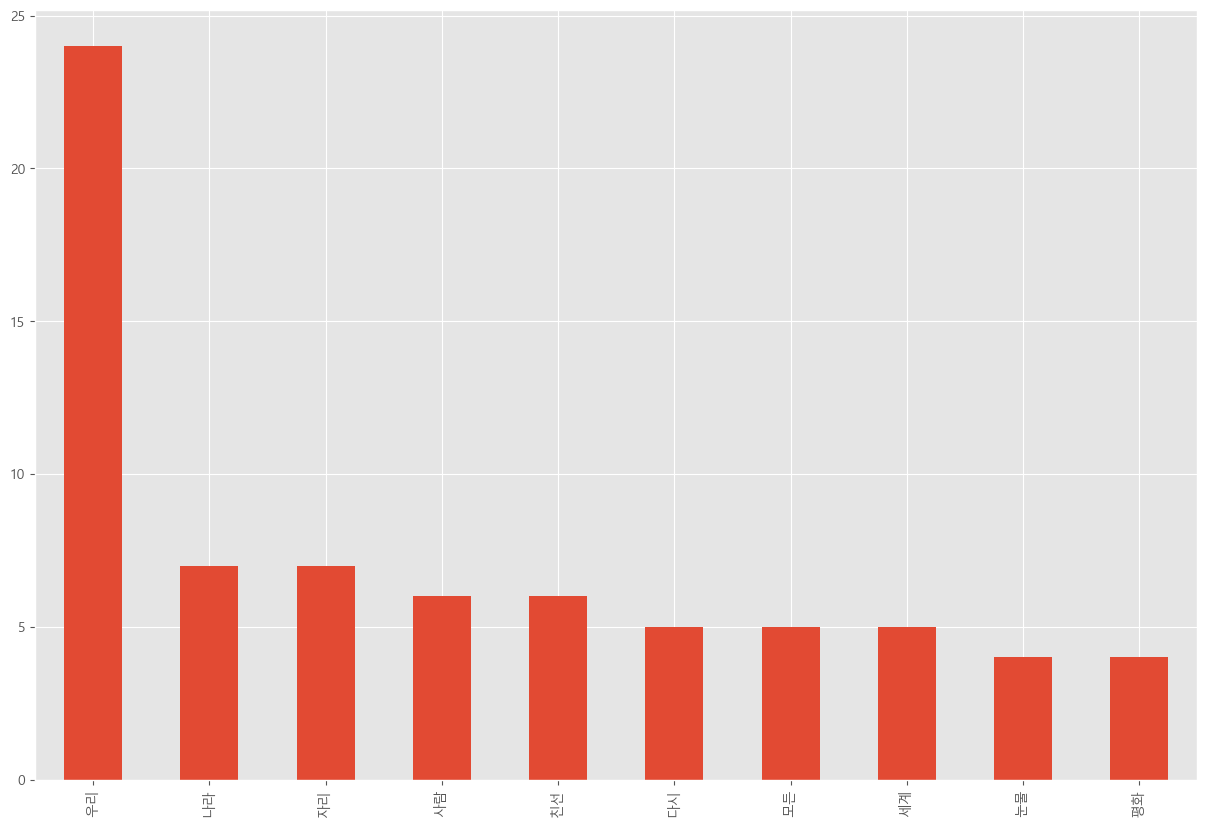

In [179]:
word_list_okt_first_lee_20[0:10].plot.bar()

### 2대 이승만 대통령

<Axes: >

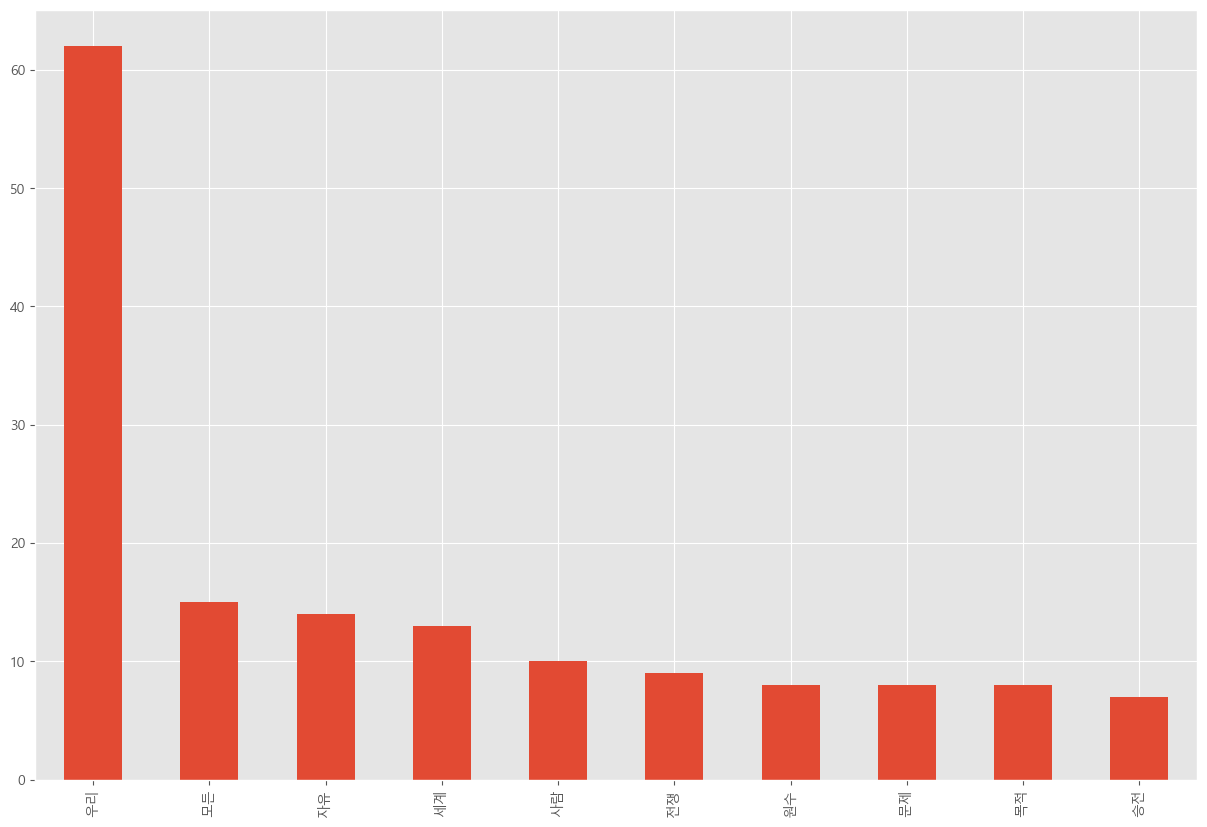

In [18]:
word_list_okt_second_lee_20[0:10].plot.bar()

### 3대 이승만 대통령

<Axes: >

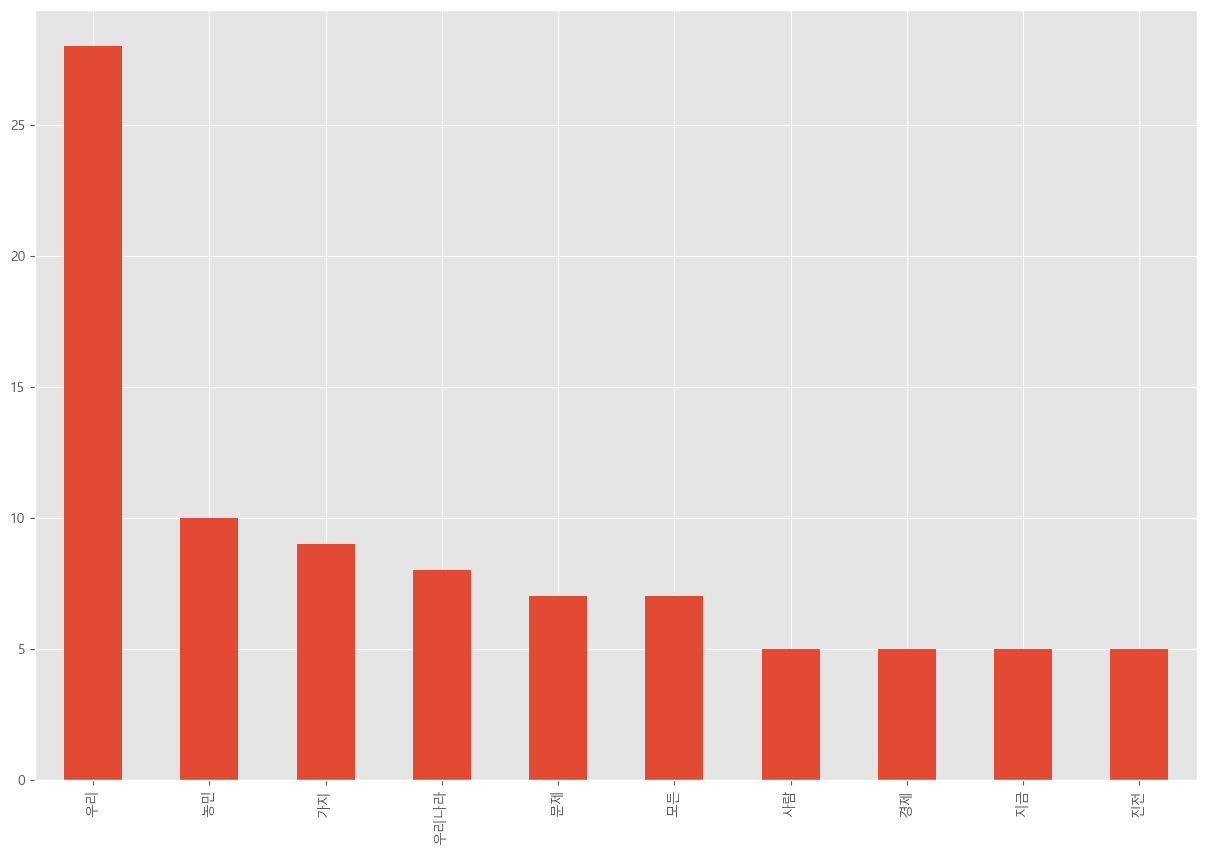

In [181]:
word_list_okt_third_lee_20[0:10].plot.bar()

### 4대 윤보선 대통령

<Axes: >

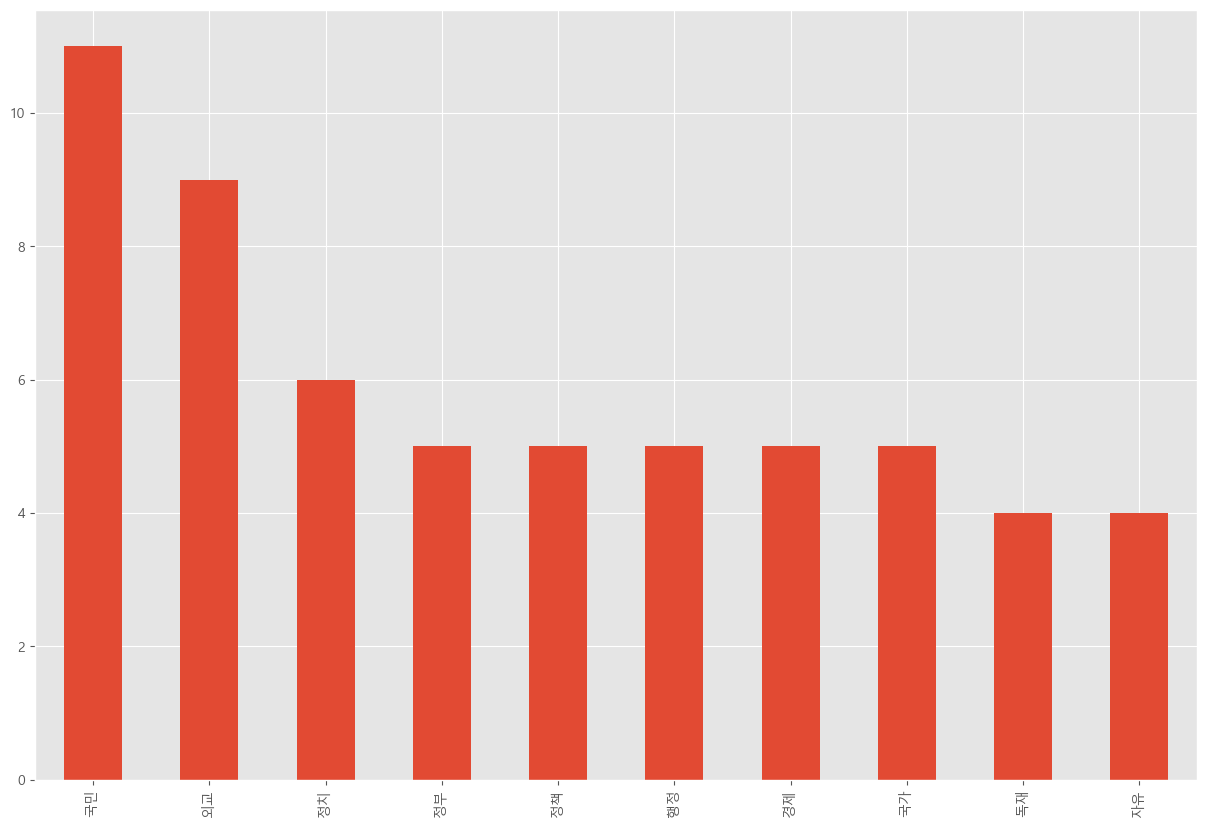

In [182]:
word_list_okt_fourth_yoon_20[0:10].plot.bar()

### 5대 박정희 대통령

<Axes: >

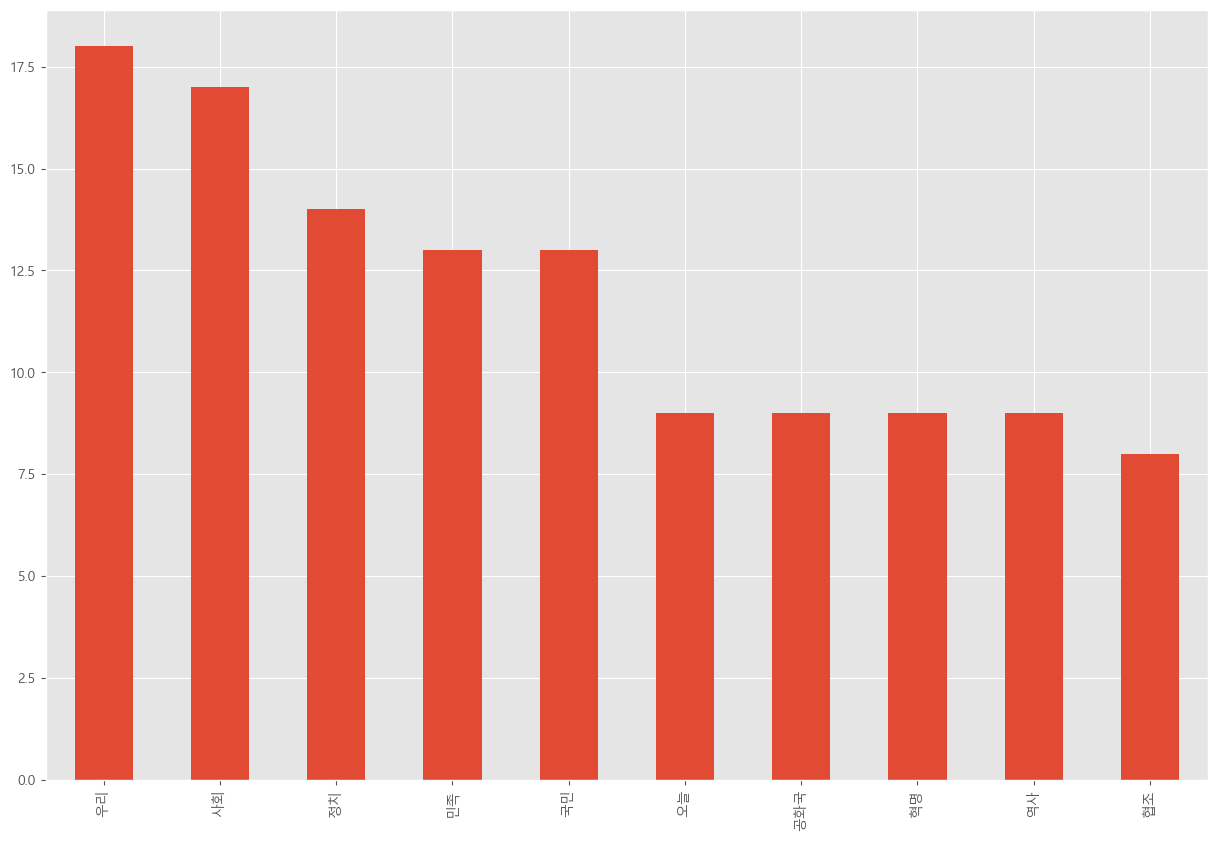

In [183]:
word_list_okt_fifth_park_20[0:10].plot.bar()

### 6대 박정희 대통령

<Axes: >

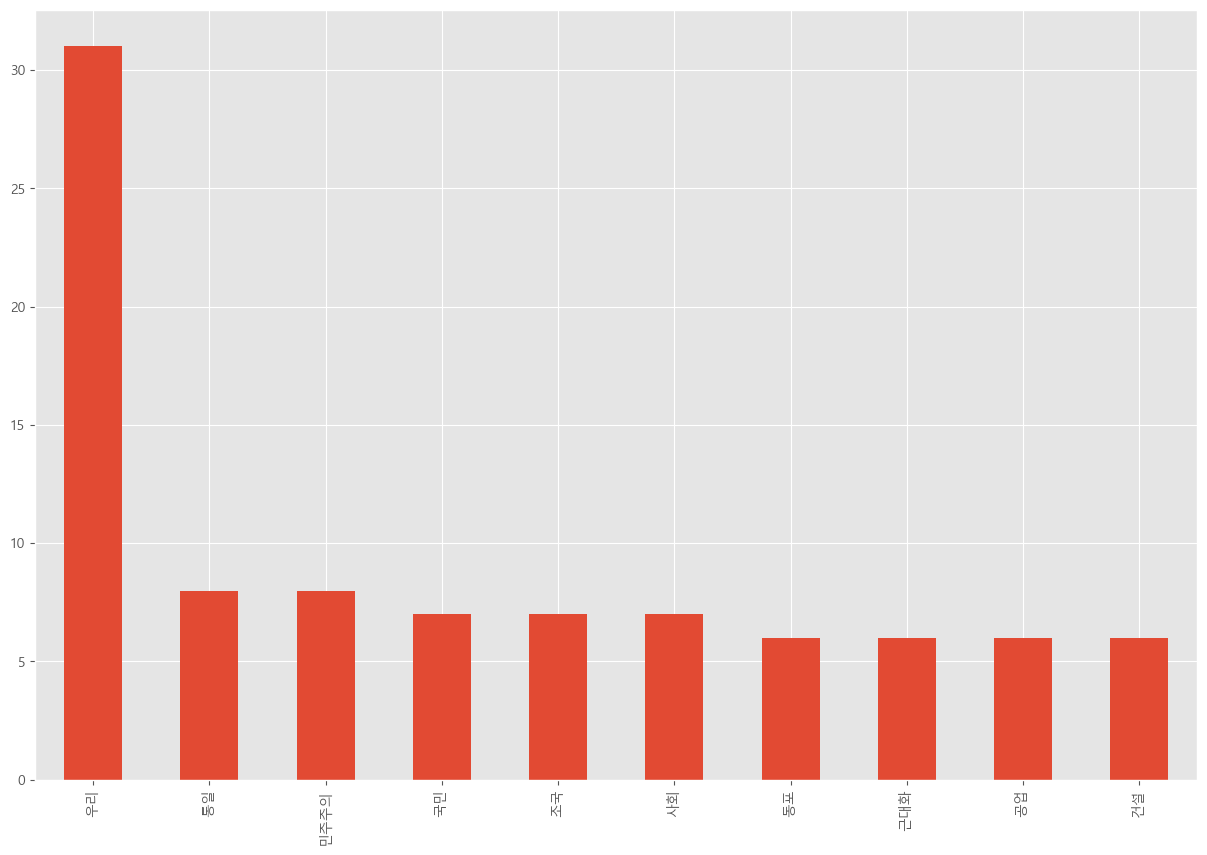

In [184]:
word_list_okt_sixth_park_20[0:10].plot.bar()

### 7대 박정희 대통령

<Axes: >

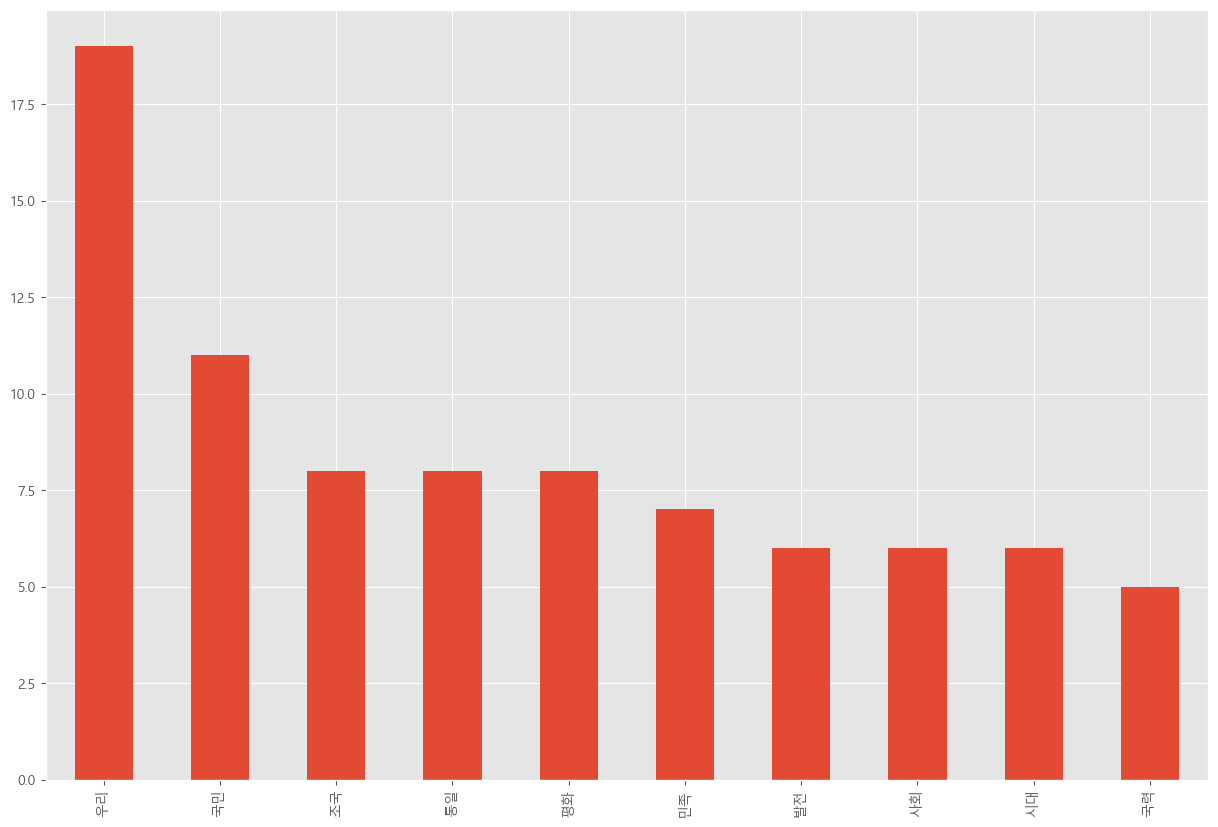

In [185]:
word_list_okt_seventh_park_20[0:10].plot.bar()

### 8대 박정희 대통령

<Axes: >

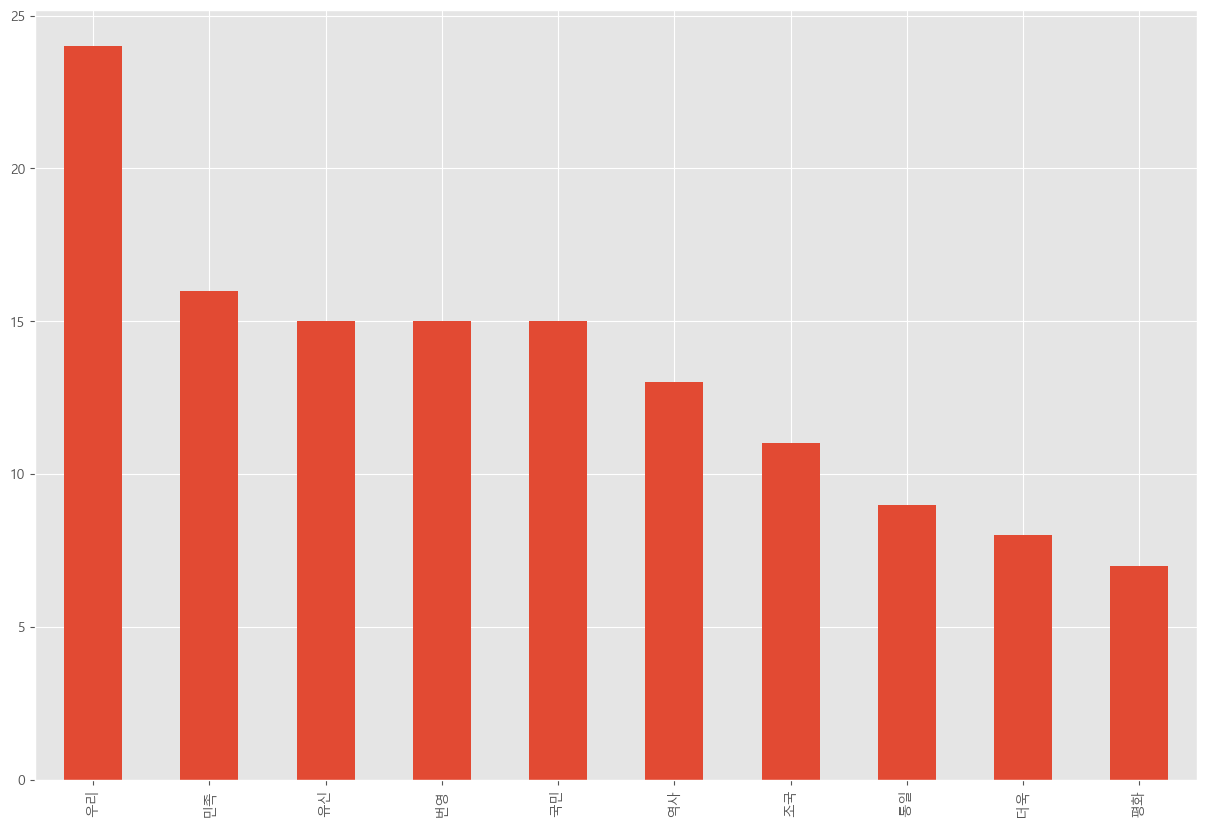

In [186]:
word_list_okt_eighth_park_20[0:10].plot.bar()

### 9대 박정희 대통령

<Axes: >

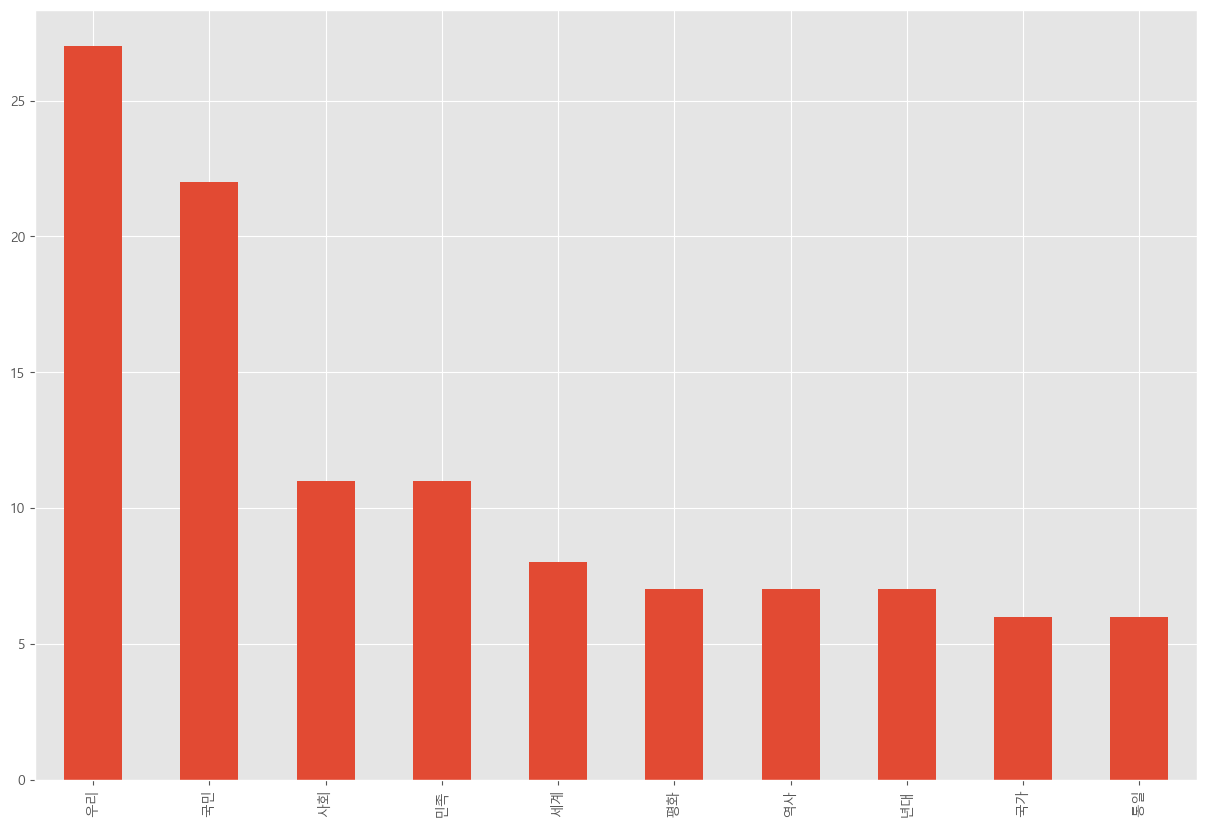

In [187]:
word_list_okt_ninth_park_20[0:10].plot.bar()

### 10대 최규하 대통령

<Axes: >

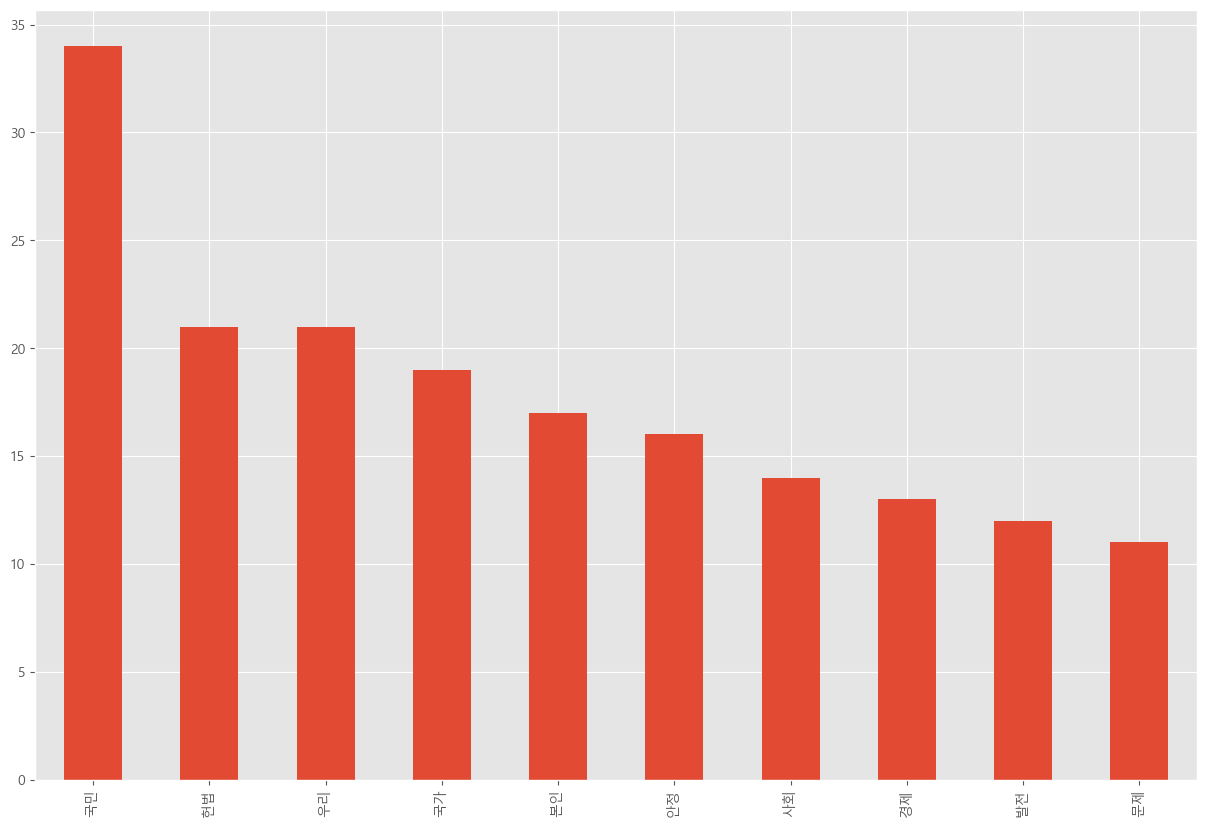

In [188]:
word_list_okt_tenth_choi_20[0:10].plot.bar()

### 11대 전두환 대통령

<Axes: >

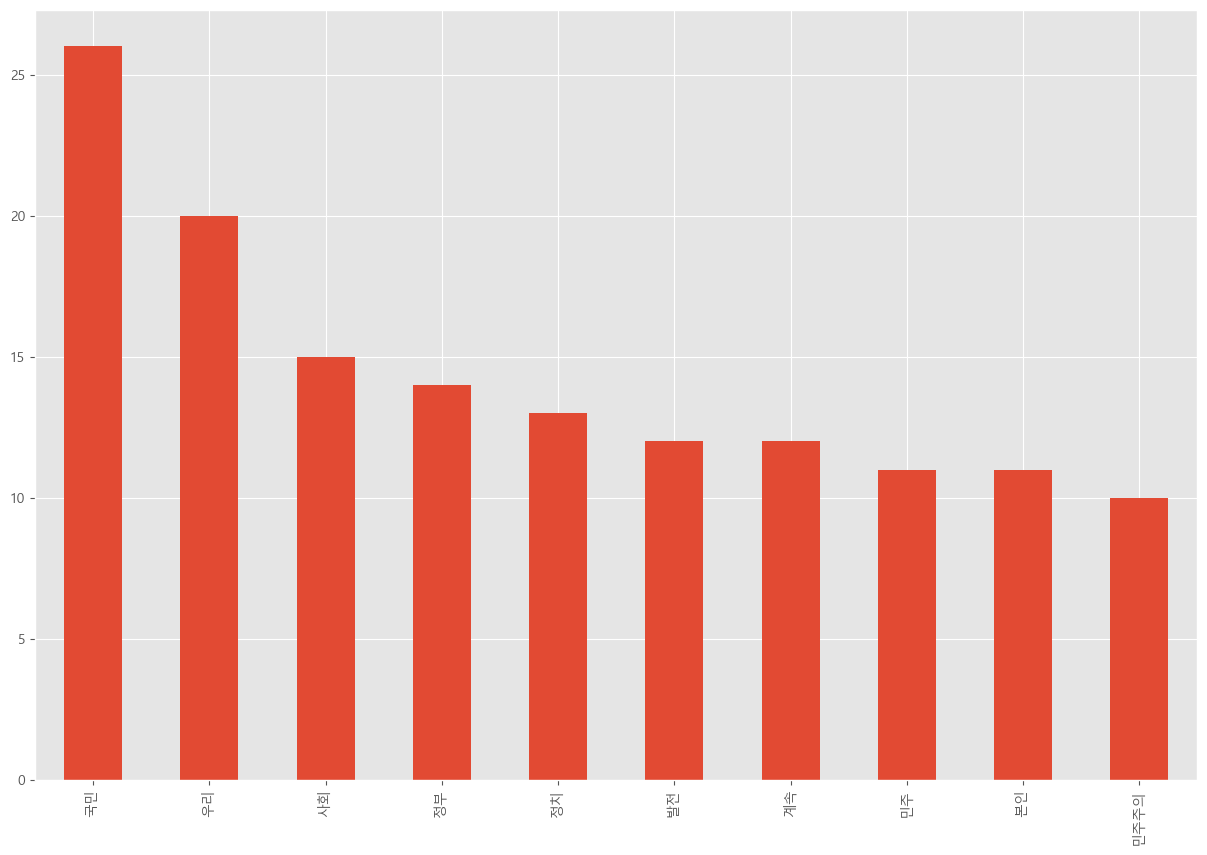

In [189]:
word_list_okt_eleventh_jeon_20[0:10].plot.bar()

### 12대 전두환 대통령

<Axes: >

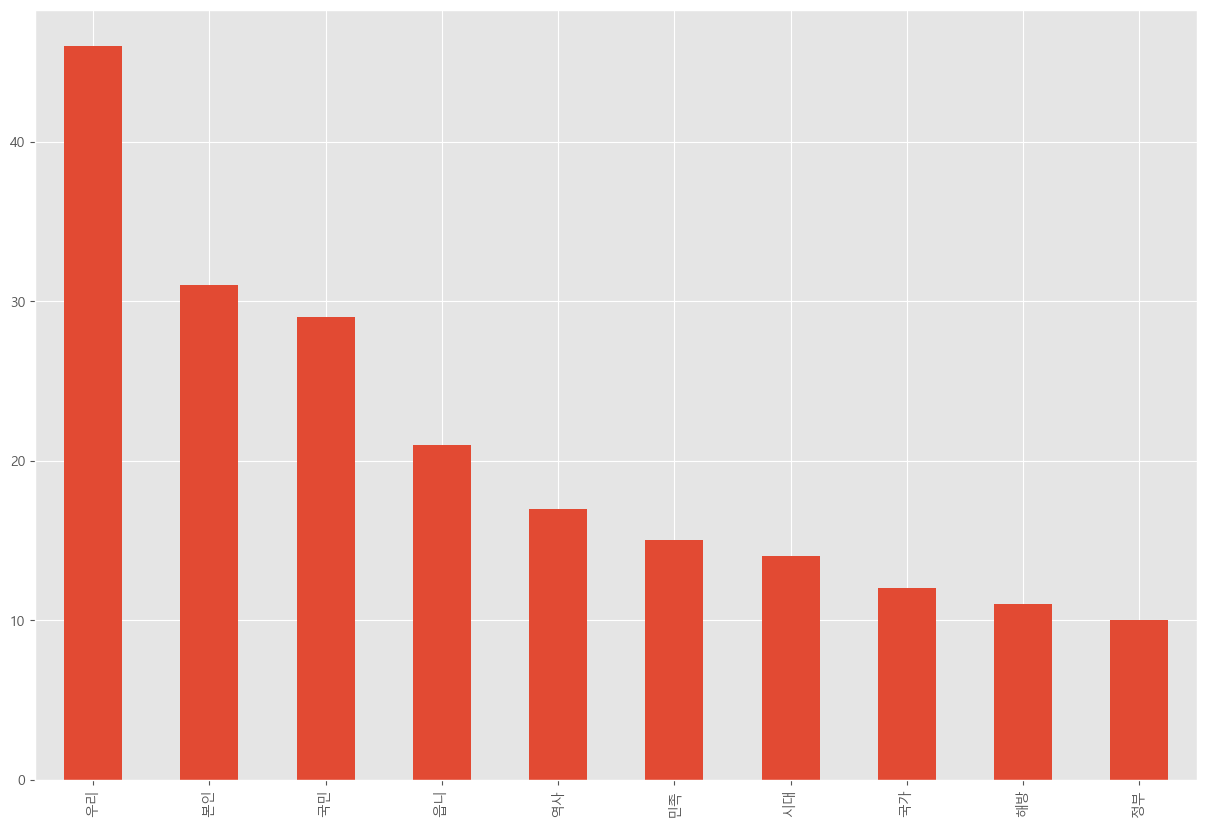

In [190]:
word_list_okt_twelfth_jeon_20[0:10].plot.bar()

### 13대 노태우 대통령

<Axes: >

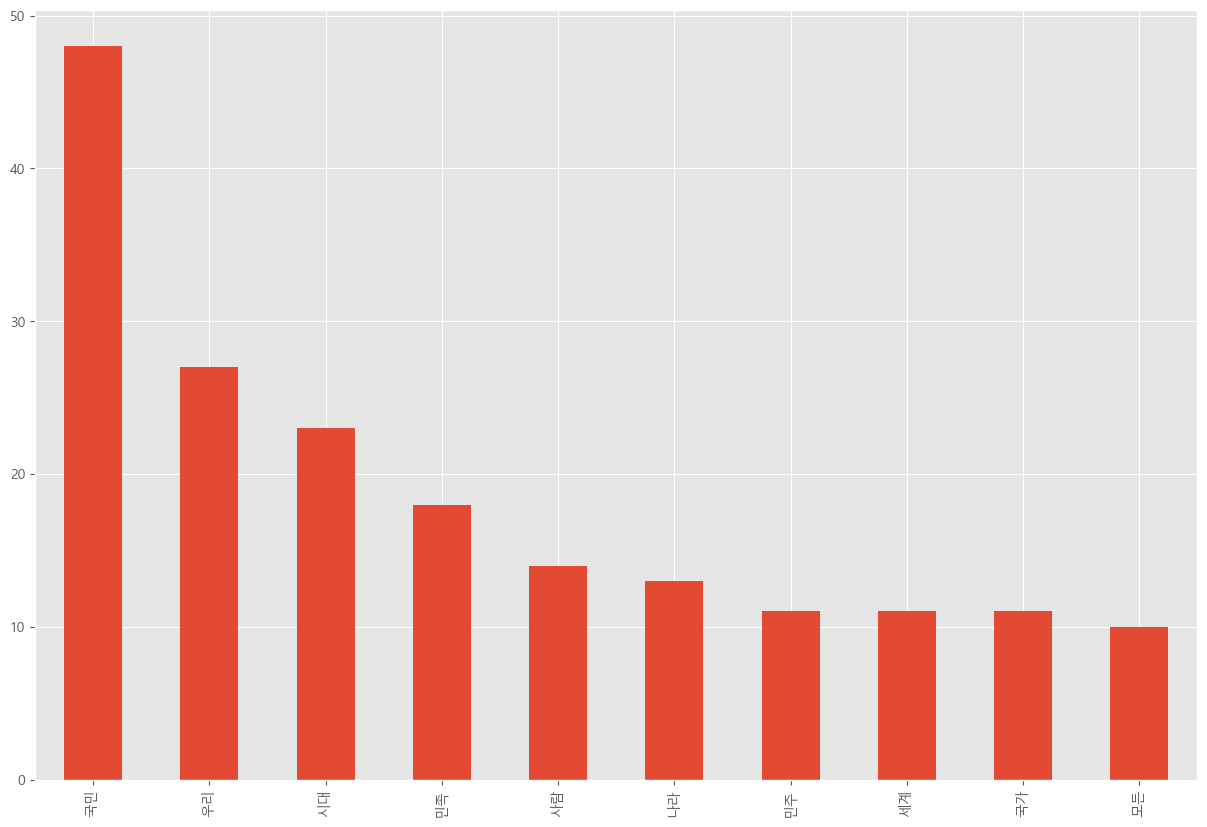

In [191]:
word_list_okt_thirteenth_no_20[0:10].plot.bar()

### 14대 김영삼 대통령

<Axes: >

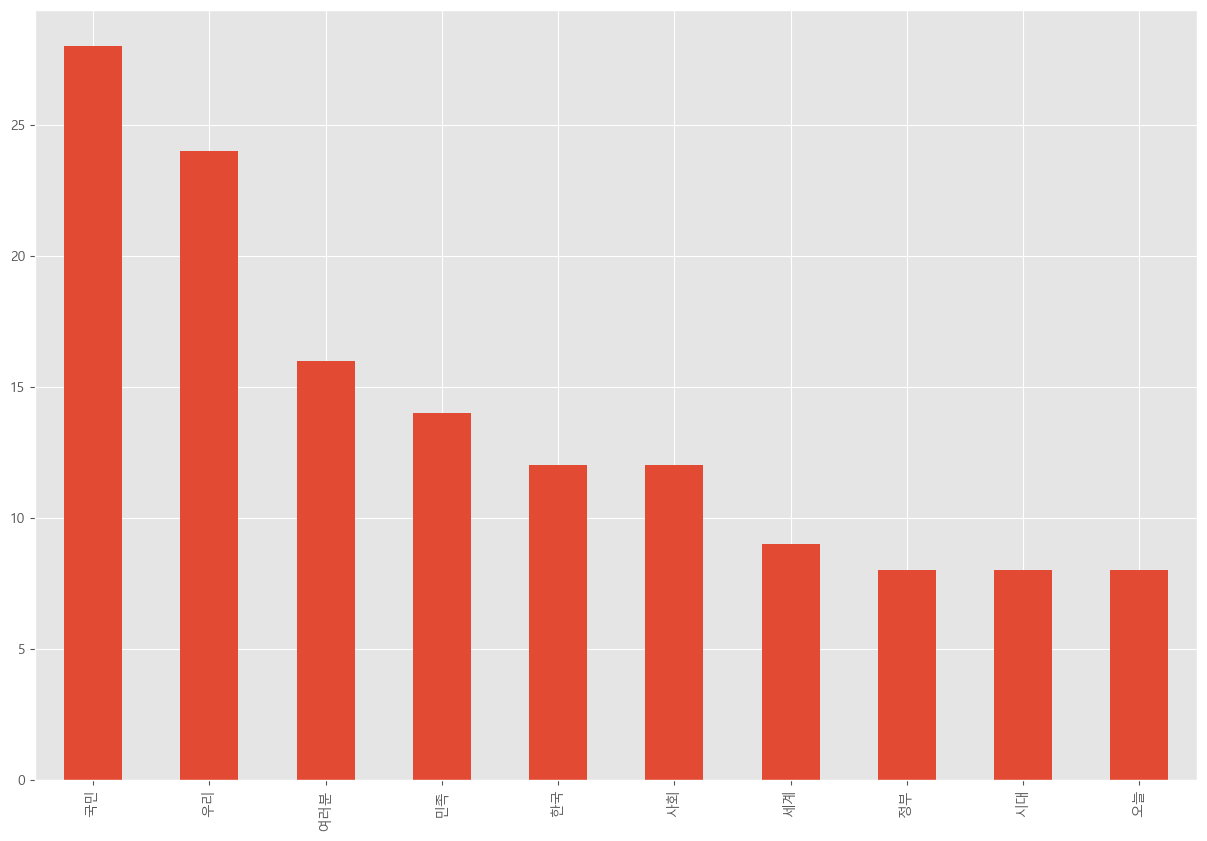

In [192]:
word_list_okt_fourteenth_kim_20[0:10].plot.bar()

### 15대 김대중 대통령

<Axes: >

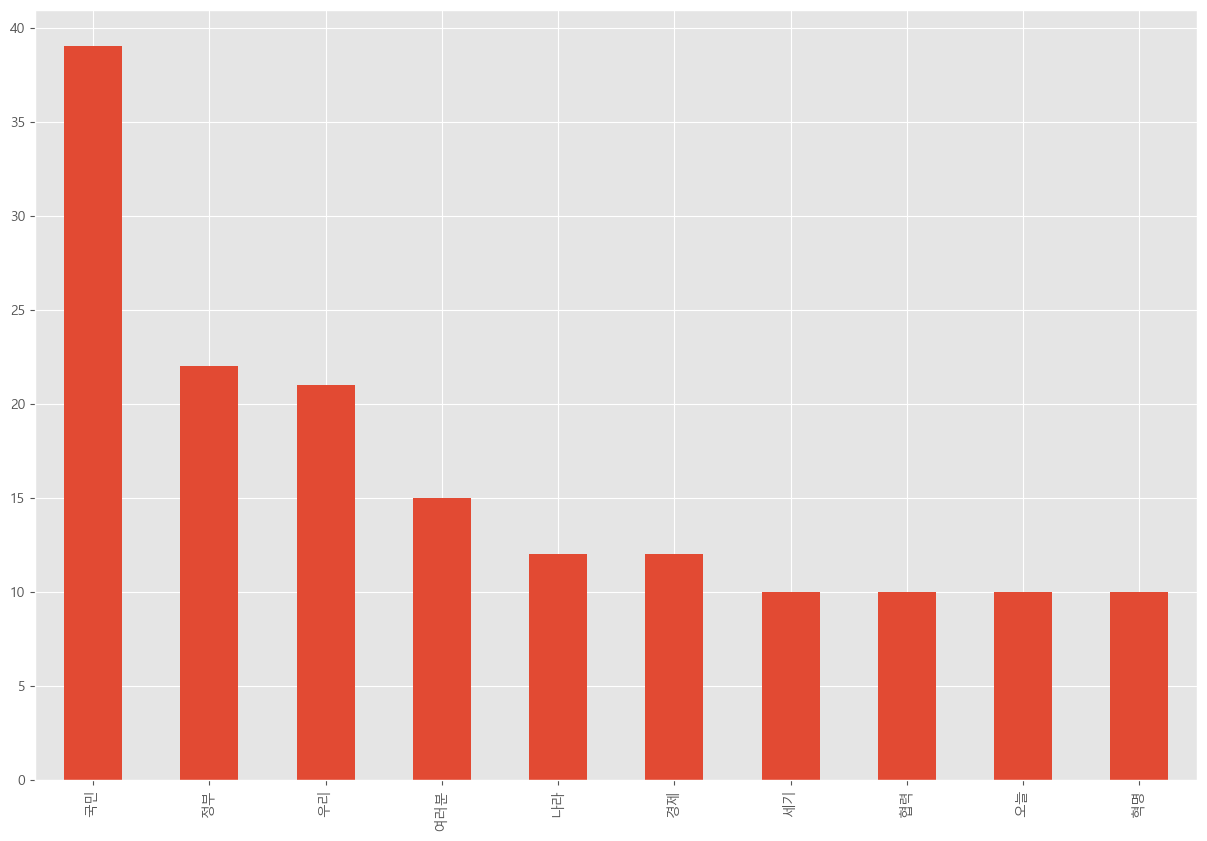

In [193]:
word_list_okt_fifteenth_kim_20[0:10].plot.bar()

### 16대 노무현 대통령

<Axes: >

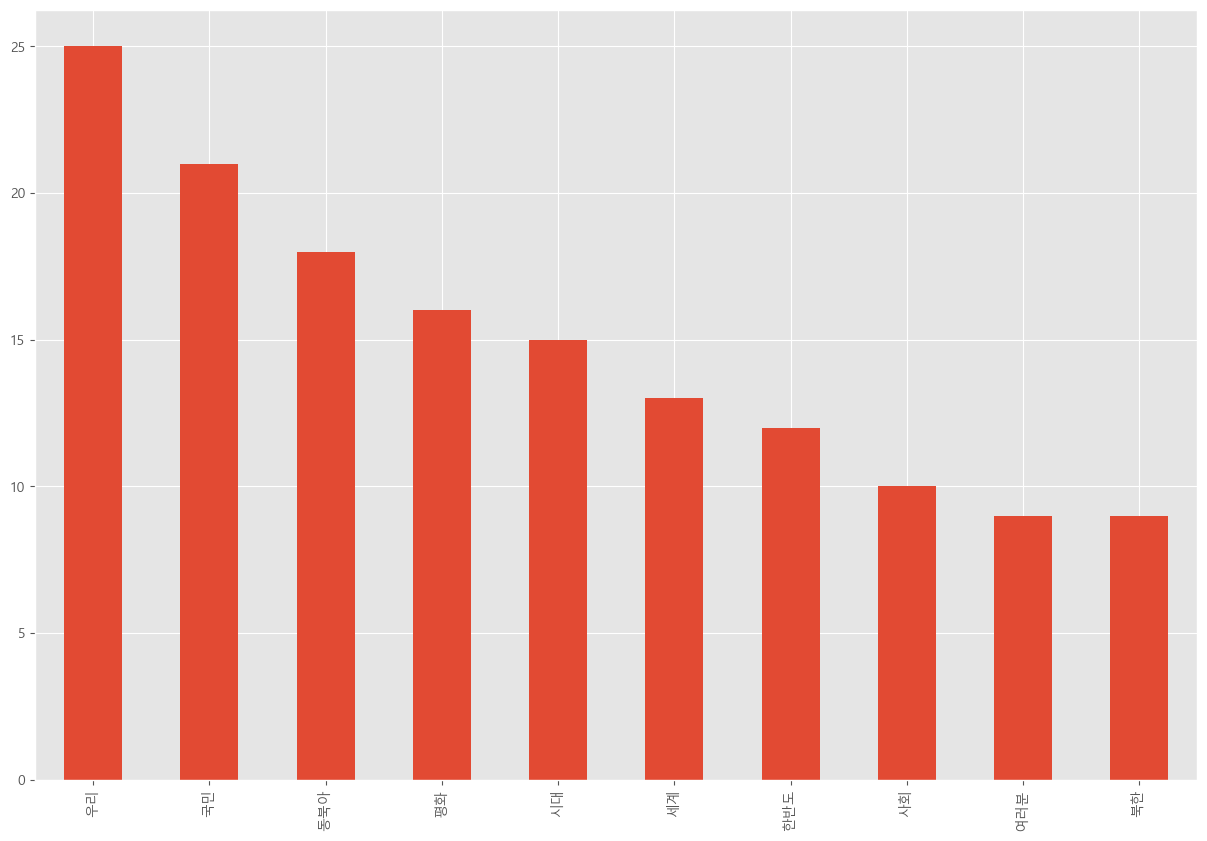

In [194]:
word_list_okt_sixteenth_no_20[0:10].plot.bar()

### 17대 이명박 대통령

<Axes: >

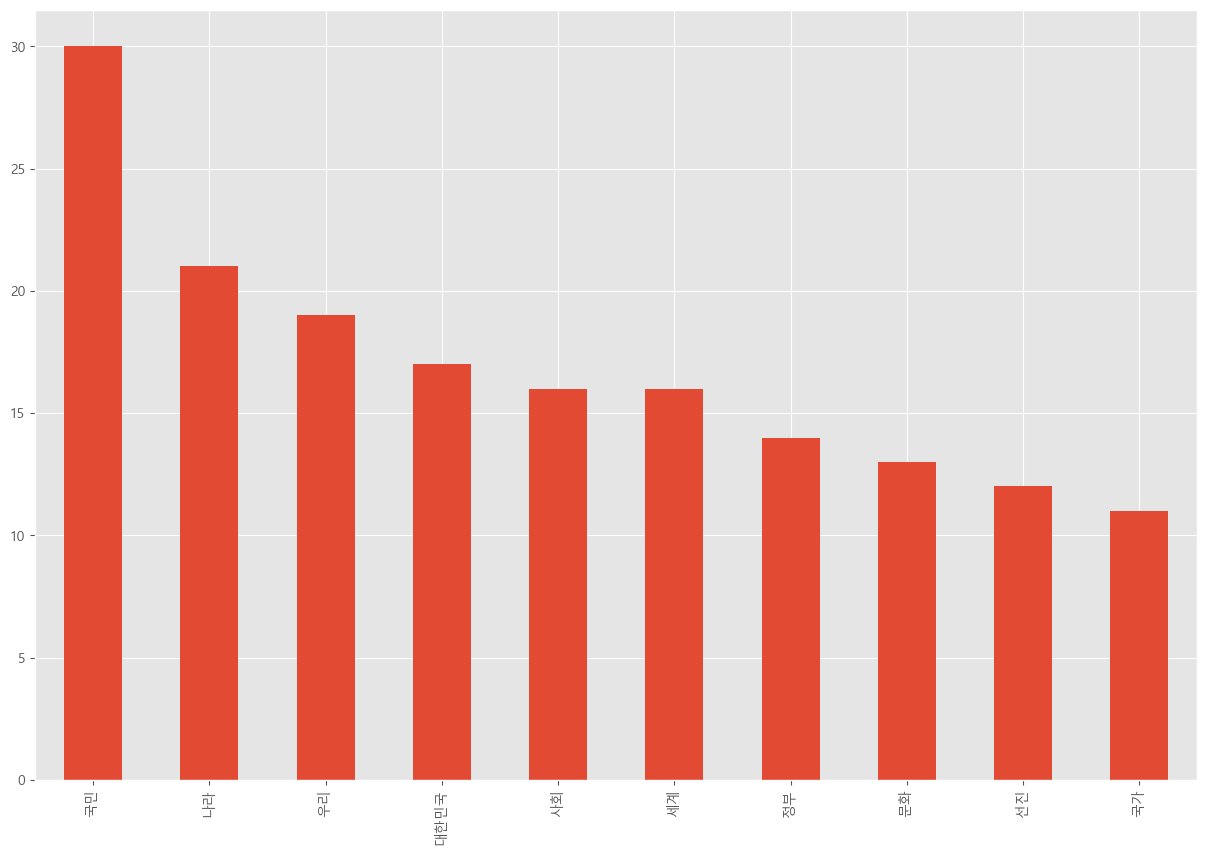

In [195]:
word_list_okt_seventeenth_lee_20[0:10].plot.bar()

### 18대 박근혜 대통령

<Axes: >

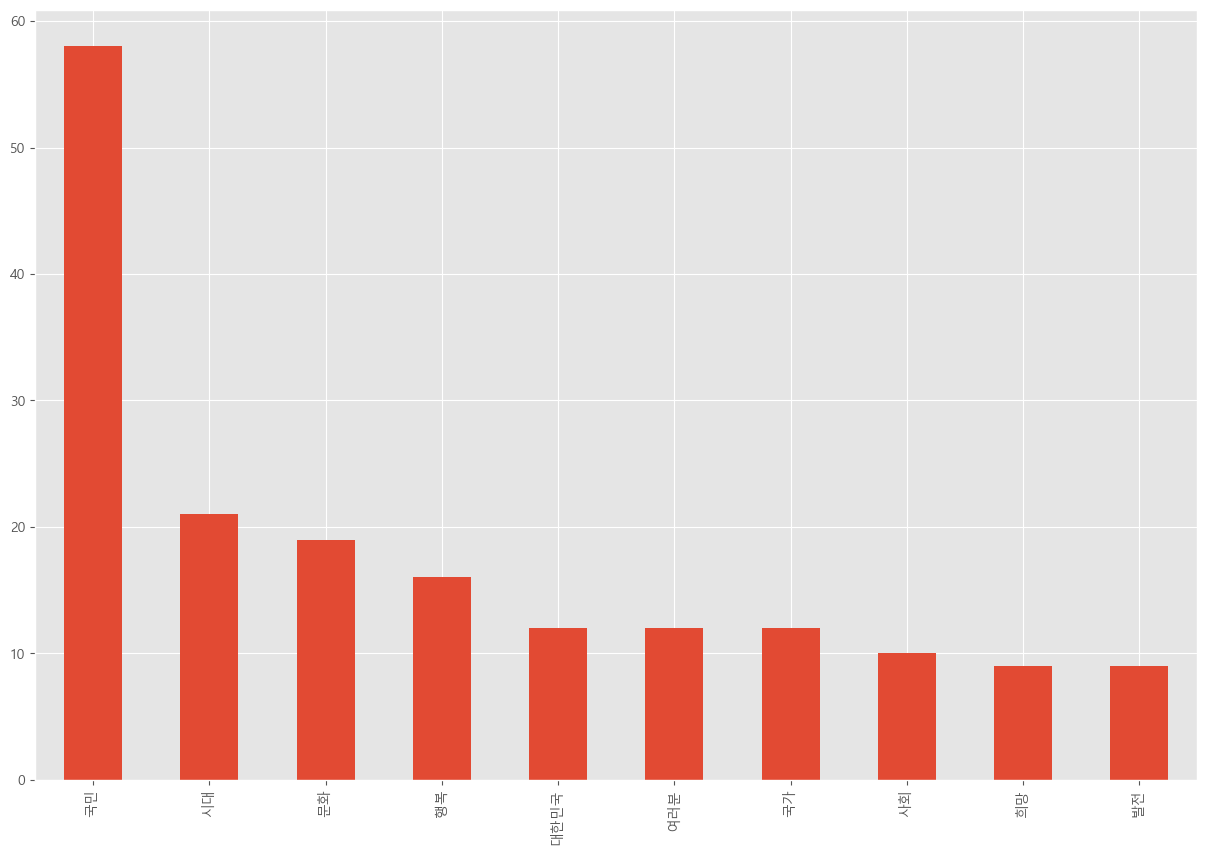

In [196]:
word_list_okt_eighteenth_park_20[0:10].plot.bar()

### 19대 문재인 대통령

<Axes: >

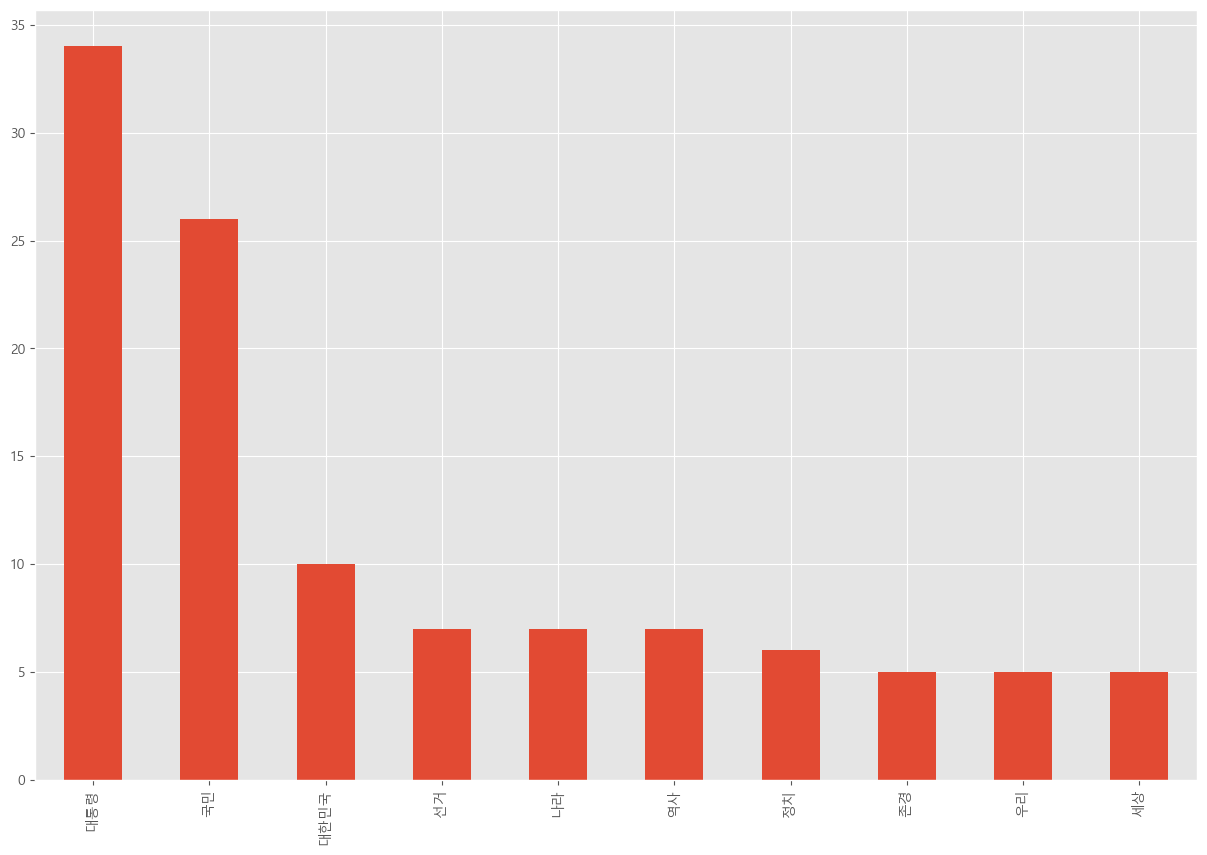

In [197]:
word_list_okt_nineteenth_moon_20[0:10].plot.bar()

### 20대 윤석열 대통령

<Axes: >

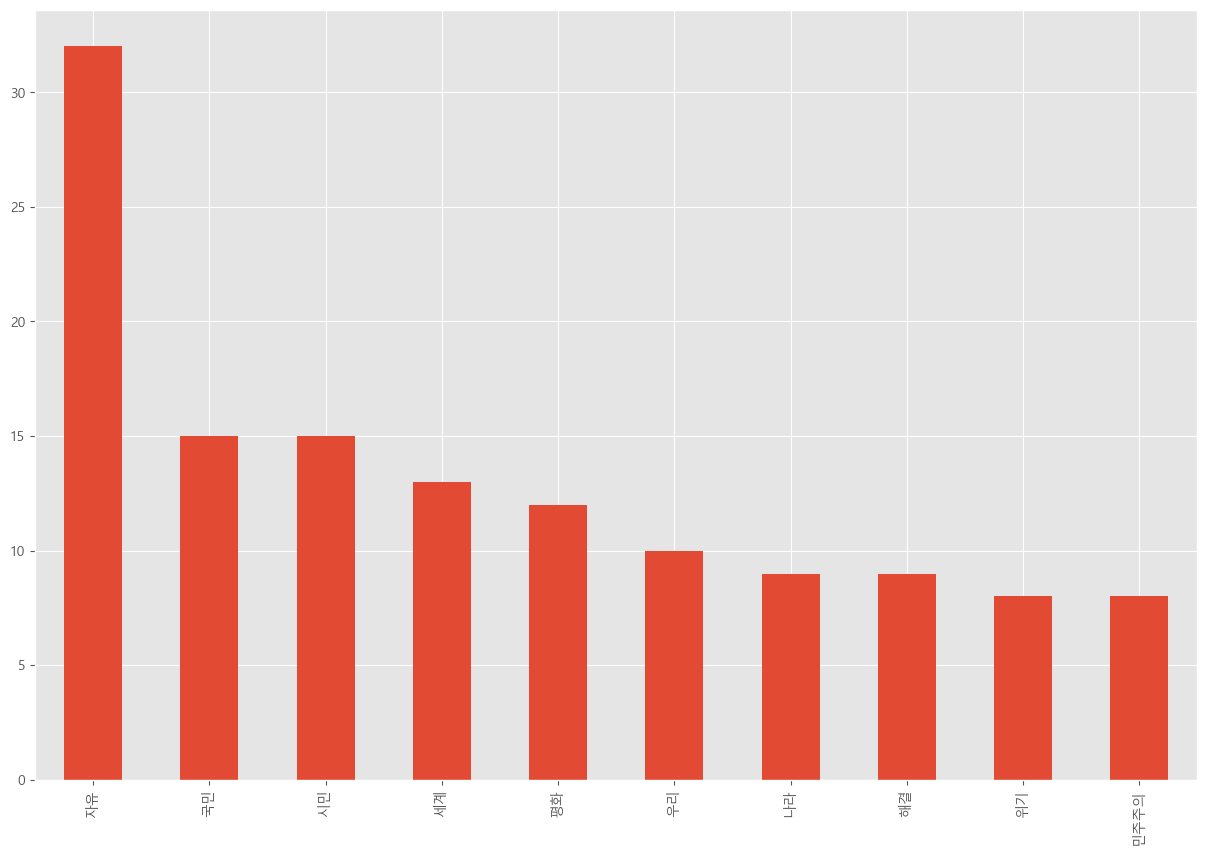

In [198]:
word_list_okt_twentieth_yoon_20[0:10].plot.bar()

## 시각화 - 워드클라우드

In [32]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
font_path = "c:/windows/fonts/malgun.ttf"
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white')

### 1대 이승만 대통령

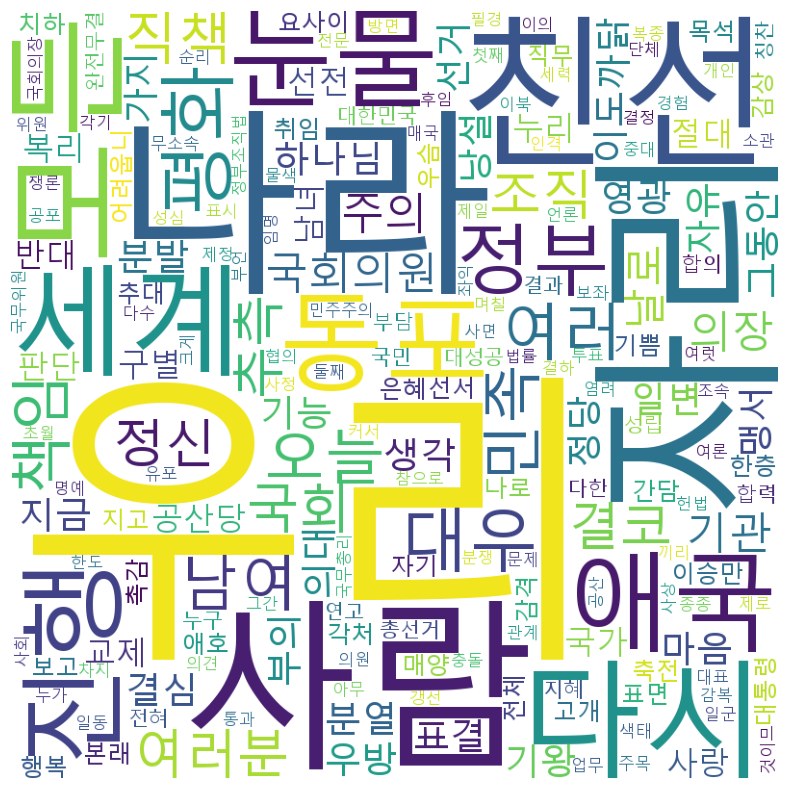

In [200]:
# 한글 워드크라우드 (이승만)
count_kor_first_lee = Counter(word_list_okt_first_lee)
wordcloud_kor_first_lee = wordcloud.generate_from_frequencies(count_kor_first_lee)
fig_kor_first_lee = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_first_lee)

### 2대 이승만 대통령

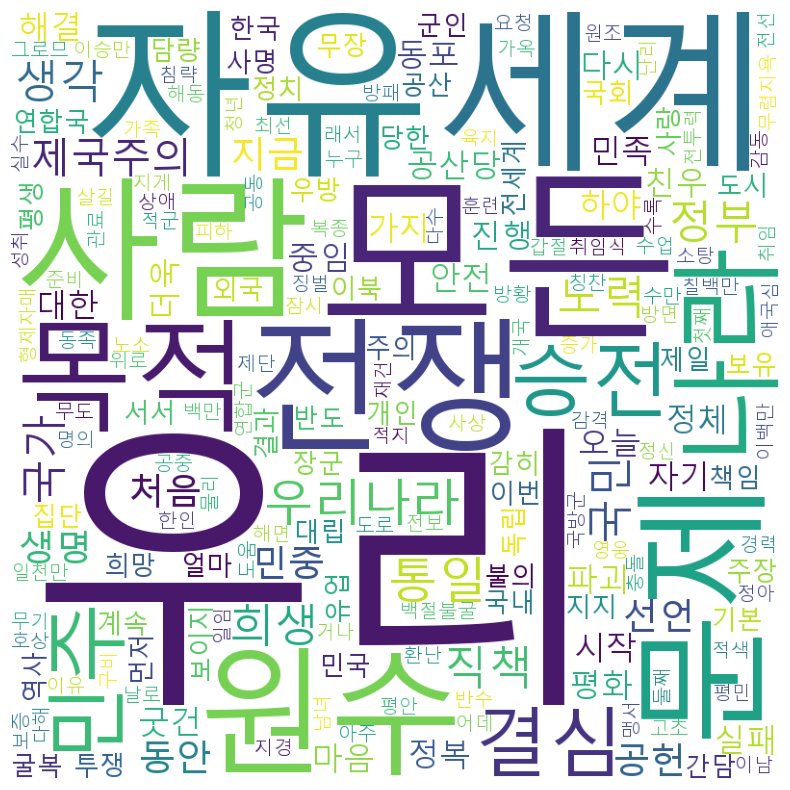

In [20]:
# 한글 워드크라우드 (이승만)
count_kor_second_lee = Counter(word_list_okt_second_lee)
wordcloud_kor_second_lee = wordcloud.generate_from_frequencies(count_kor_second_lee)
fig_kor_second_lee = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_second_lee)

### 3대 이승만 대통령

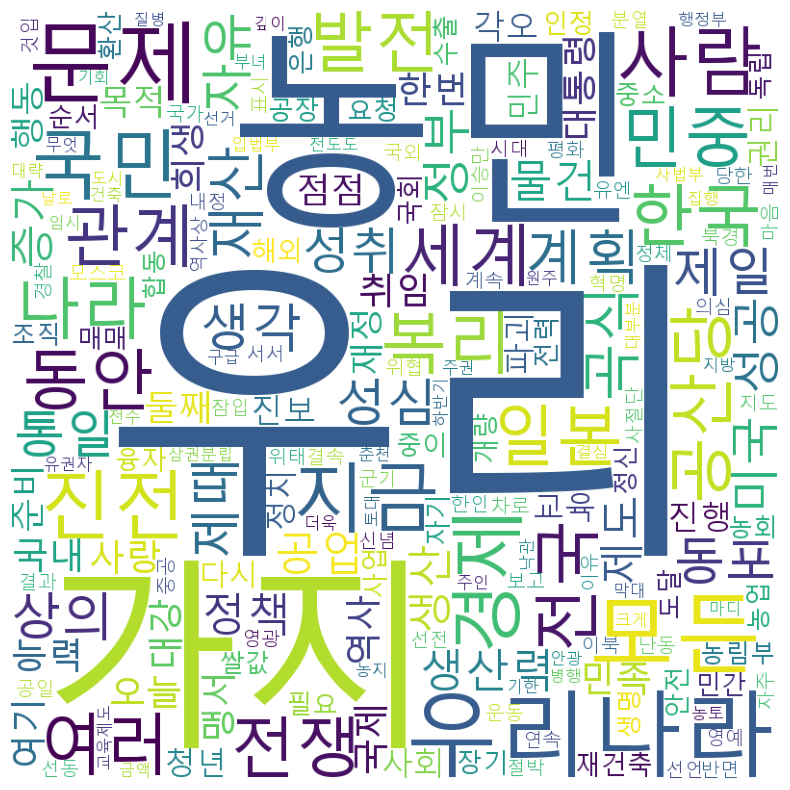

In [202]:
# 한글 워드크라우드 (이승만)
count_kor_third_lee = Counter(word_list_okt_third_lee)
wordcloud_kor_third_lee = wordcloud.generate_from_frequencies(count_kor_third_lee)
fig_kor_third_lee = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_third_lee)

### 4대 윤보선 대통령

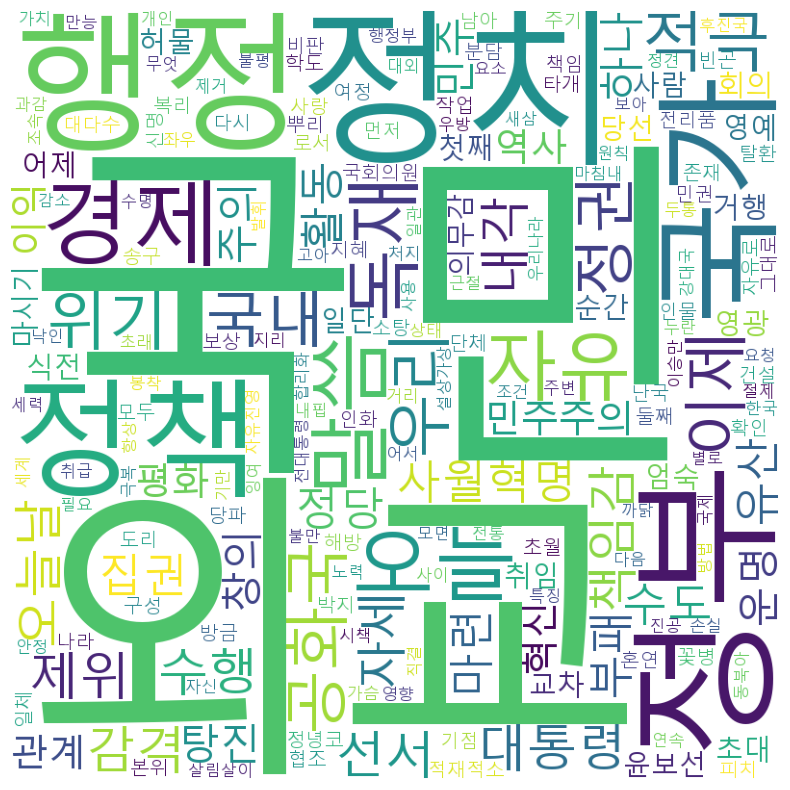

In [203]:
# 한글 워드크라우드 (윤보선)
count_kor_fourth_yoon = Counter(word_list_okt_fourth_yoon)
wordcloud_kor_fourth_yoon = wordcloud.generate_from_frequencies(count_kor_fourth_yoon)
fig_kor_fourth_yoon = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_fourth_yoon)

### 5대 박정희 대통령

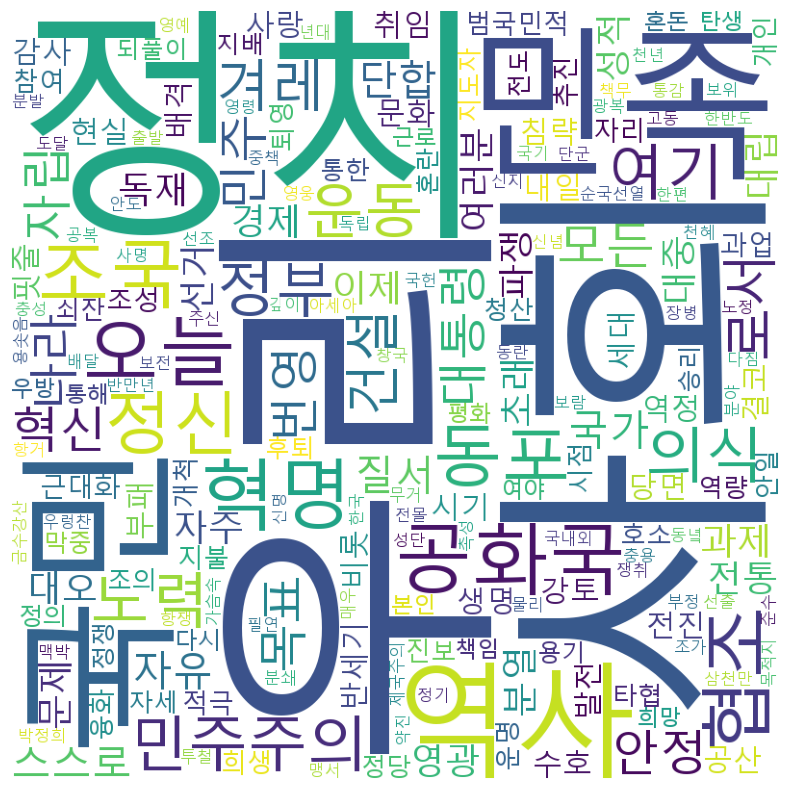

In [204]:
# 한글 워드크라우드 (박정희)
count_kor_fifth_park = Counter(word_list_okt_fifth_park)
wordcloud_kor_fifth_park = wordcloud.generate_from_frequencies(count_kor_fifth_park)
fig_kor_fifth_park = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_fifth_park)

### 6대 박정희 대통령

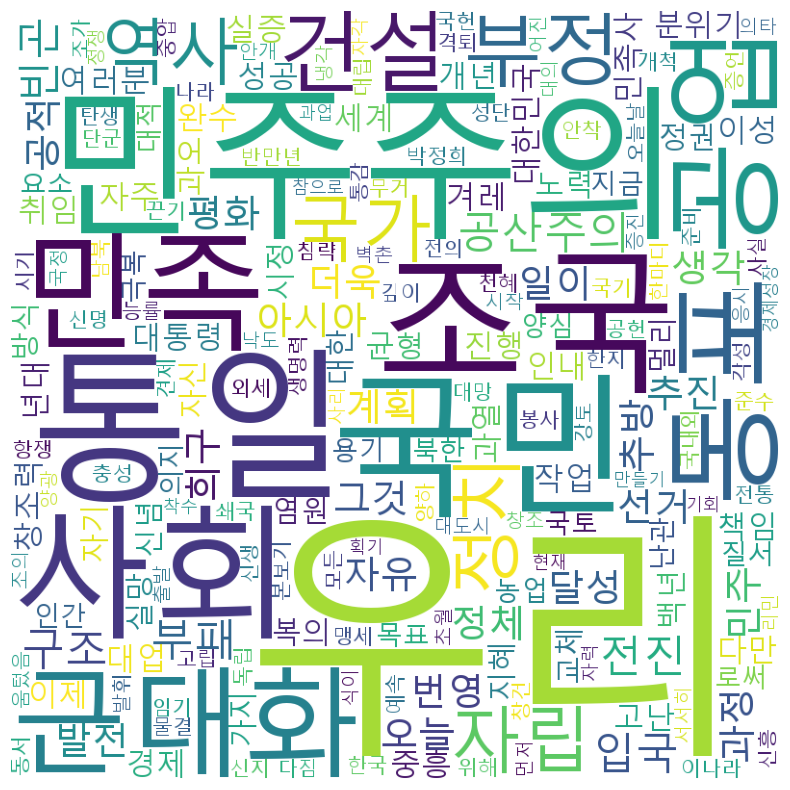

In [205]:
# 한글 워드크라우드 (박정희)
count_kor_sixth_park = Counter(word_list_okt_sixth_park)
wordcloud_kor_sixth_park = wordcloud.generate_from_frequencies(count_kor_sixth_park)
fig_kor_sixth_park = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_sixth_park)

### 7대 박정희 대통령

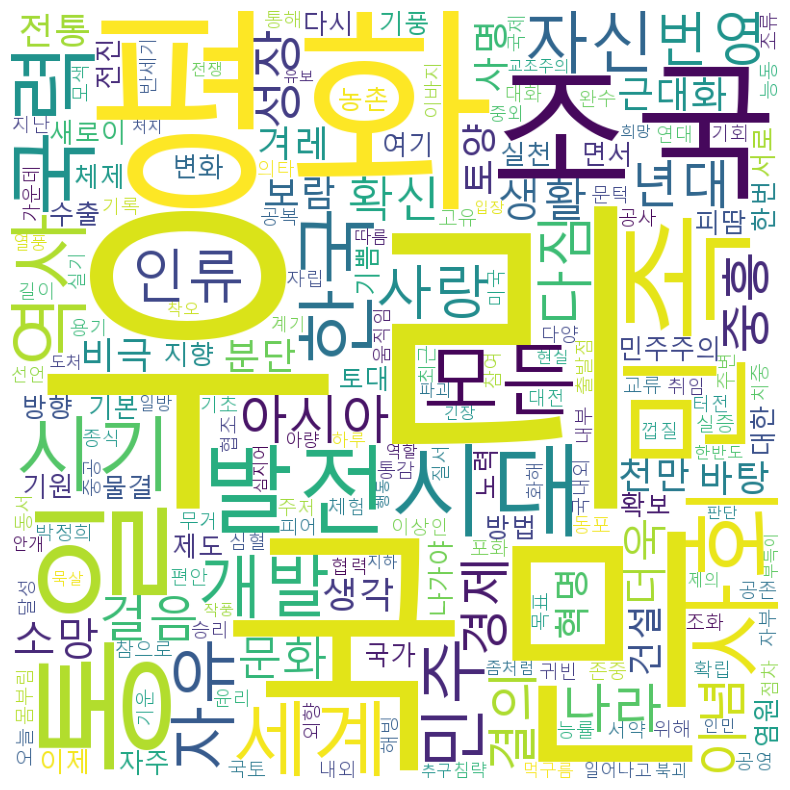

In [206]:
# 한글 워드크라우드 (박정희)
count_kor_seventh_park = Counter(word_list_okt_seventh_park)
wordcloud_kor_seventh_park = wordcloud.generate_from_frequencies(count_kor_seventh_park)
fig_kor_seventh_park = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_seventh_park)

### 8대 박정희 대통령

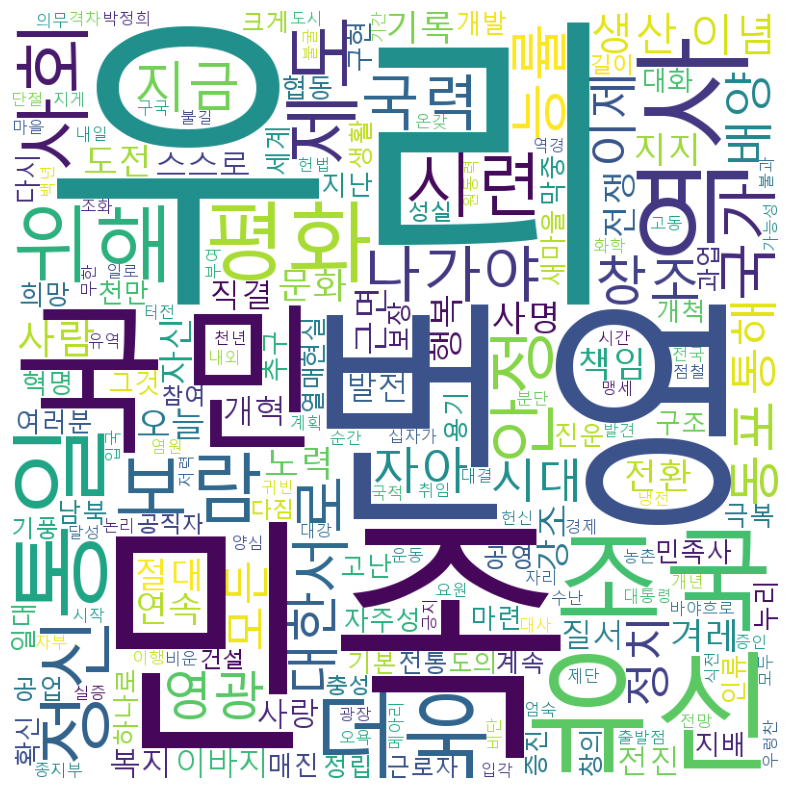

In [207]:
# 한글 워드크라우드 (박정희)
count_kor_eighth_park = Counter(word_list_okt_eighth_park)
wordcloud_kor_eighth_park = wordcloud.generate_from_frequencies(count_kor_eighth_park)
fig_kor_eighth_park = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_eighth_park)

### 9대 박정희 대통령

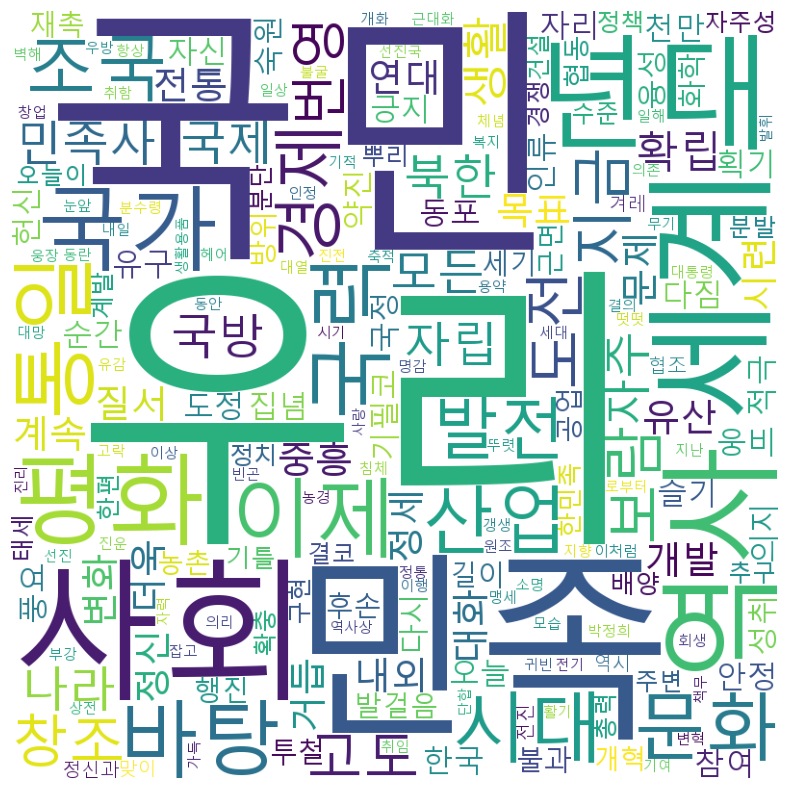

In [208]:
# 한글 워드크라우드 (박정희)
count_kor_ninth_park = Counter(word_list_okt_ninth_park)
wordcloud_kor_ninth_park = wordcloud.generate_from_frequencies(count_kor_ninth_park)
fig_kor_ninth_park = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_ninth_park)

### 10대 최규하 대통령

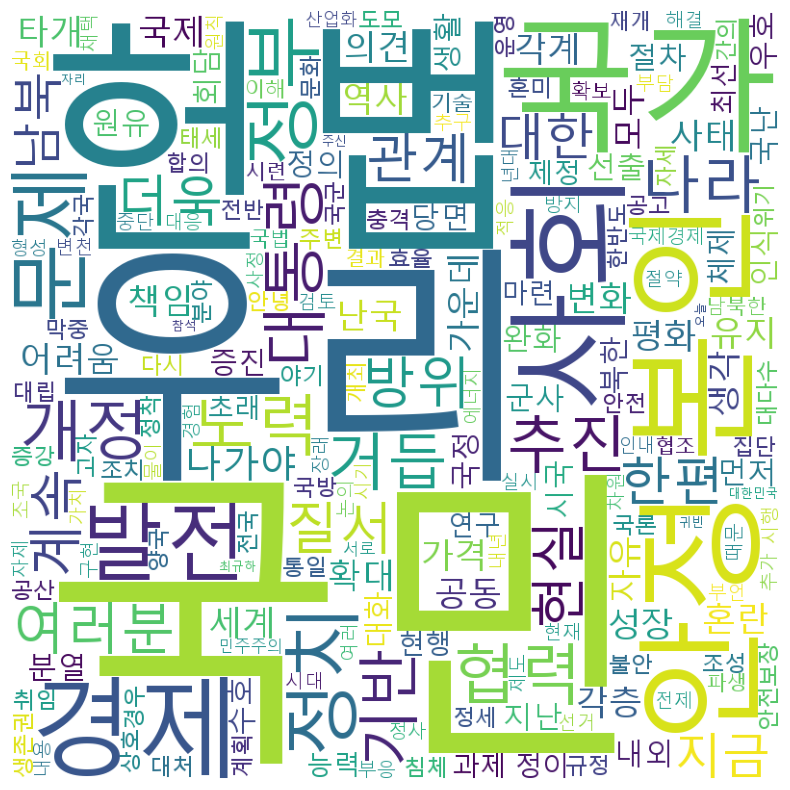

In [209]:
# 한글 워드크라우드 (최규하)
count_kor_tenth_choi = Counter(word_list_okt_tenth_choi)
wordcloud_kor_tenth_choi = wordcloud.generate_from_frequencies(count_kor_tenth_choi)
fig_kor_tenth_choi = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_tenth_choi)

### 11대 전두환 대통령

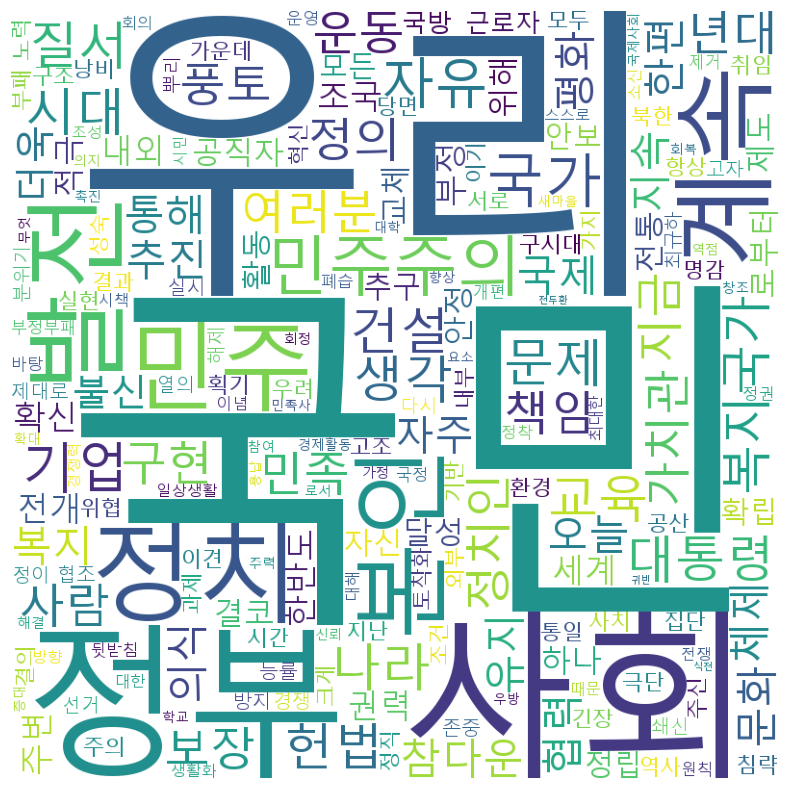

In [210]:
# 한글 워드크라우드 (전두환)
count_kor_eleventh_jeon = Counter(word_list_okt_eleventh_jeon)
wordcloud_kor_eleventh_jeon = wordcloud.generate_from_frequencies(count_kor_eleventh_jeon)
fig_kor_eleventh_jeon = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_eleventh_jeon)

### 12대 전두환 대통령

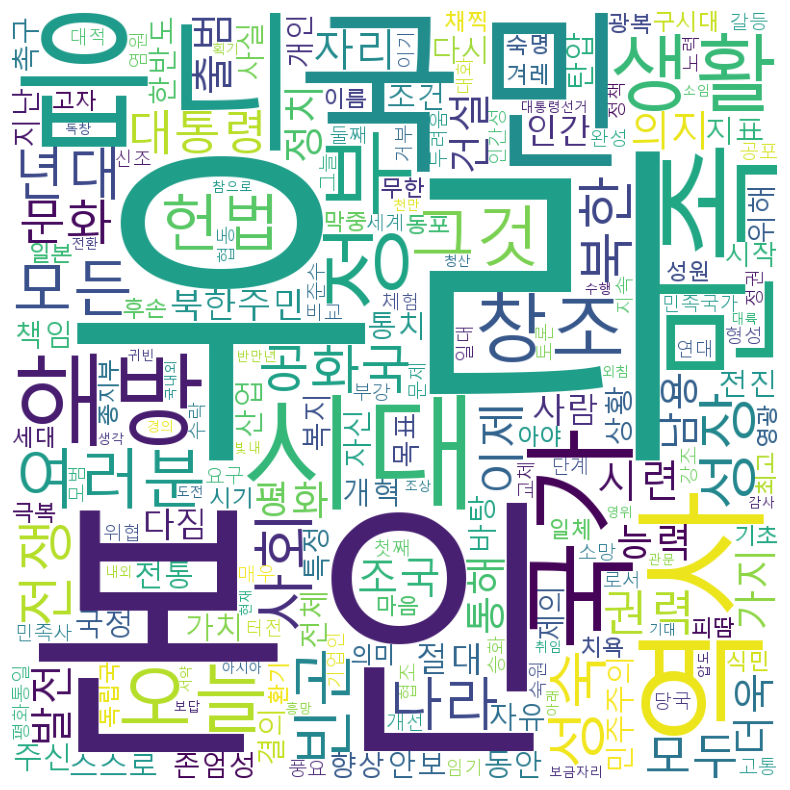

In [211]:
# 한글 워드크라우드 (전두환)
count_kor_twelfth_jeon = Counter(word_list_okt_twelfth_jeon)
wordcloud_kor_twelfth_jeon = wordcloud.generate_from_frequencies(count_kor_twelfth_jeon)
fig_kor_twelfth_jeon = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_twelfth_jeon)

### 13대 노태우 대통령

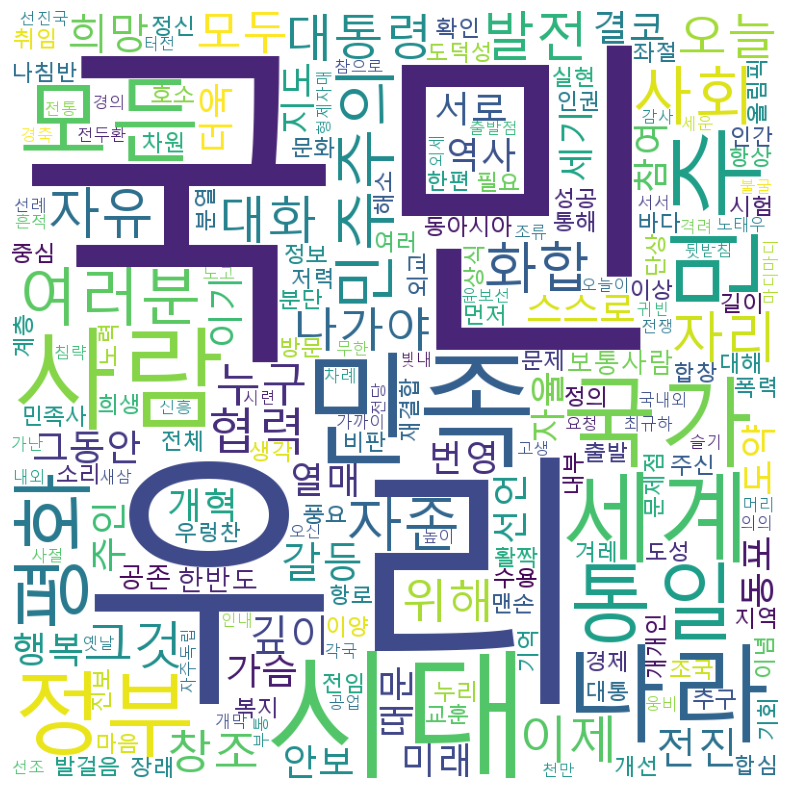

In [212]:
# 한글 워드크라우드 (노태우)
count_kor_thirteenth_no = Counter(word_list_okt_thirteenth_no)
wordcloud_kor_thirteenth_no = wordcloud.generate_from_frequencies(count_kor_thirteenth_no)
fig_kor_thirteenth_no = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_thirteenth_no)

### 14대 김영삼 대통령

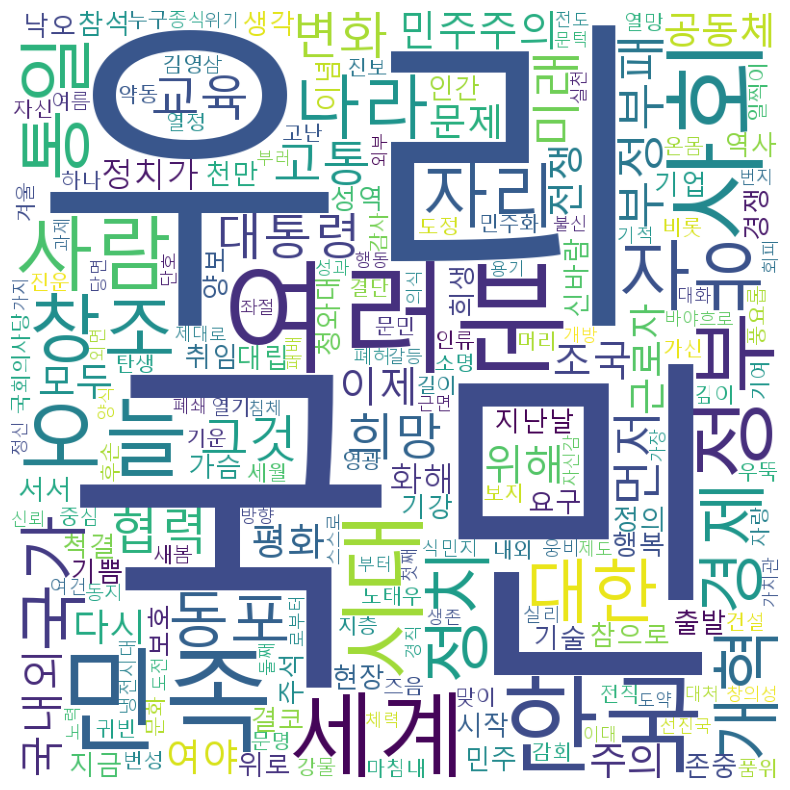

In [213]:
# 한글 워드크라우드 (김영삼)
count_kor_fourteenth_kim = Counter(word_list_okt_fourteenth_kim)
wordcloud_kor_fourteenth_kim = wordcloud.generate_from_frequencies(count_kor_fourteenth_kim)
fig_kor_fourteenth_kim = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_fourteenth_kim)

### 15대 김대중 대통령

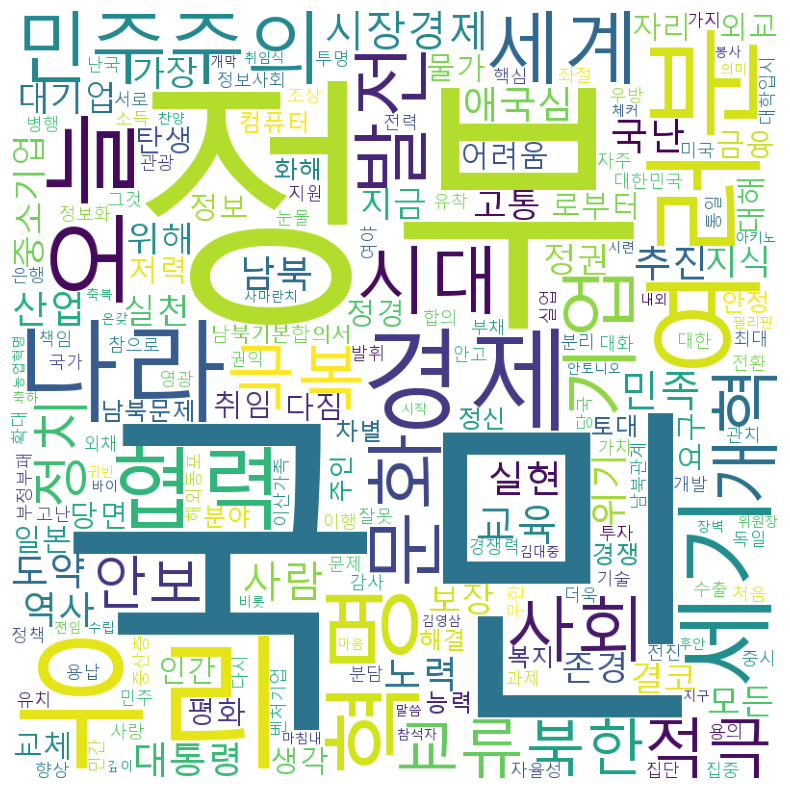

In [214]:
# 한글 워드크라우드 (김대중)
count_kor_fifteenth_kim = Counter(word_list_okt_fifteenth_kim)
wordcloud_kor_fifteenth_kim = wordcloud.generate_from_frequencies(count_kor_fifteenth_kim)
fig_kor_fifteenth_kim = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_fifteenth_kim)

### 16대 노무현 대통령

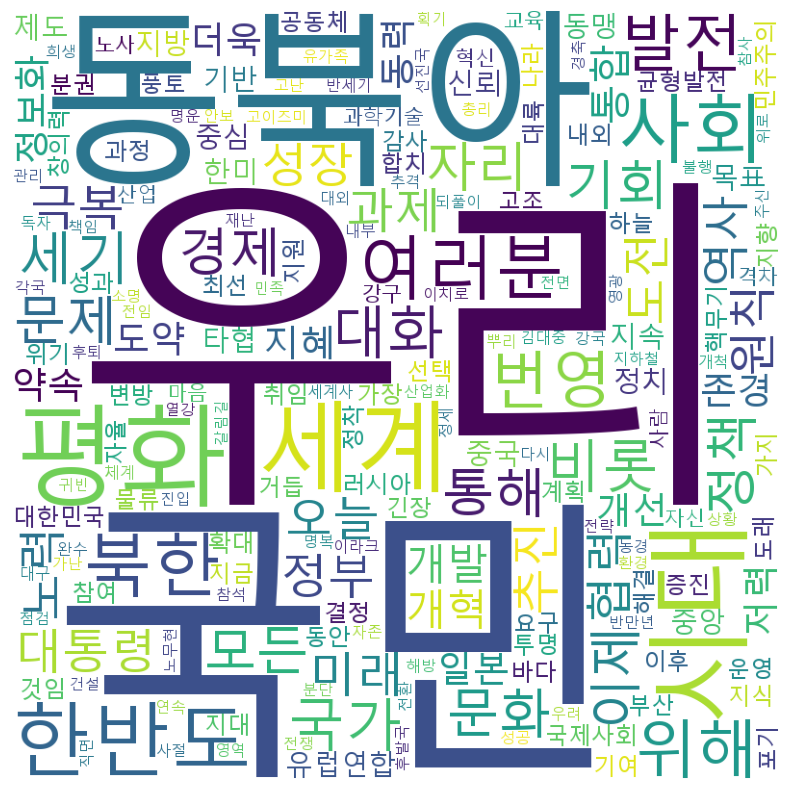

In [215]:
# 한글 워드크라우드 (노무현)
count_kor_sixteenth_no = Counter(word_list_okt_sixteenth_no)
wordcloud_kor_sixteenth_no = wordcloud.generate_from_frequencies(count_kor_sixteenth_no)
fig_kor_sixteenth_no = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_sixteenth_no)

### 17대 이명박 대통령

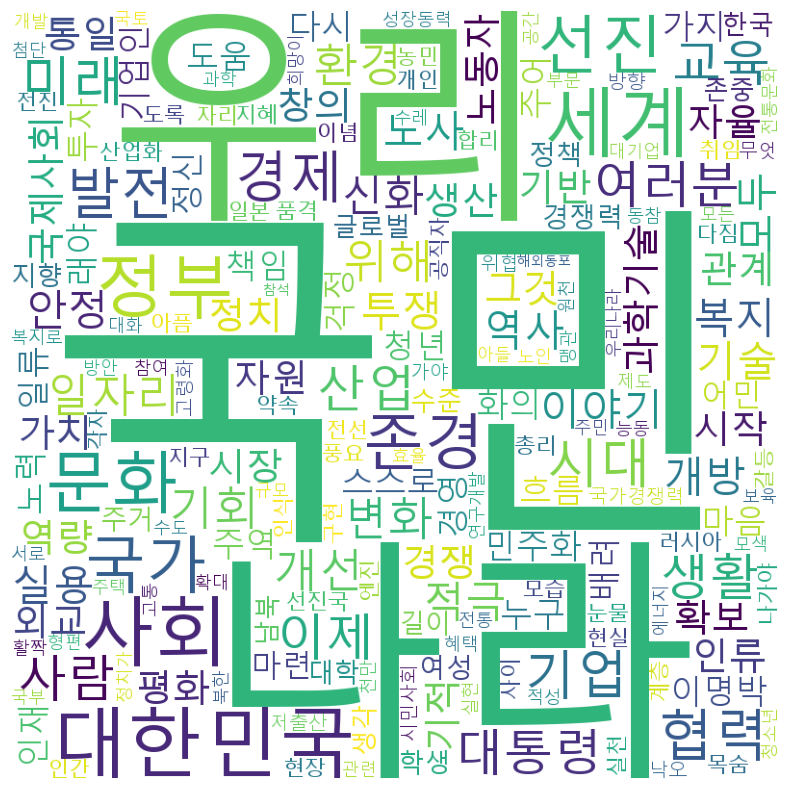

In [216]:
# 한글 워드크라우드 (이명박)
count_kor_seventeenth_lee = Counter(word_list_okt_seventeenth_lee)
wordcloud_kor_seventeenth_lee = wordcloud.generate_from_frequencies(count_kor_seventeenth_lee)
fig_kor_seventeenth_lee = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_seventeenth_lee)

### 18대 박근혜 대통령

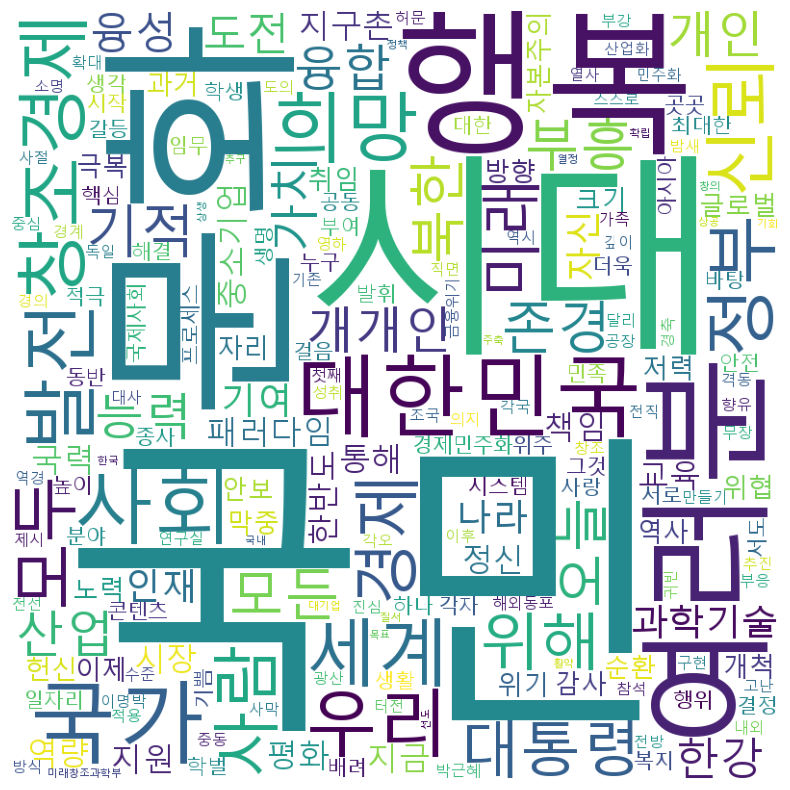

In [217]:
# 한글 워드크라우드 (박근혜)
count_kor_eighteenth_park = Counter(word_list_okt_eighteenth_park)
wordcloud_kor_eighteenth_park = wordcloud.generate_from_frequencies(count_kor_eighteenth_park)
fig_kor_eighteenth_park = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_eighteenth_park)

### 19대 문재인 대통령

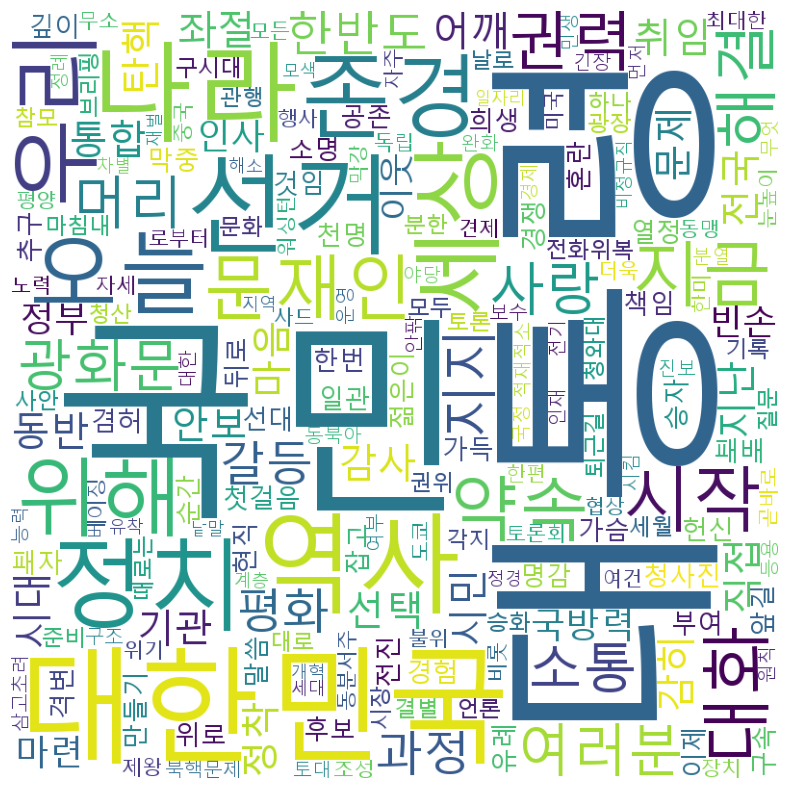

In [33]:
# 한글 워드크라우드 (문재인)
count_kor_nineteenth_moon = Counter(word_list_okt_nineteenth_moon)
wordcloud_kor_nineteenth_moon = wordcloud.generate_from_frequencies(count_kor_nineteenth_moon)
fig_kor_nineteenth_moon = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_nineteenth_moon)

### 20대 윤석열 대통령

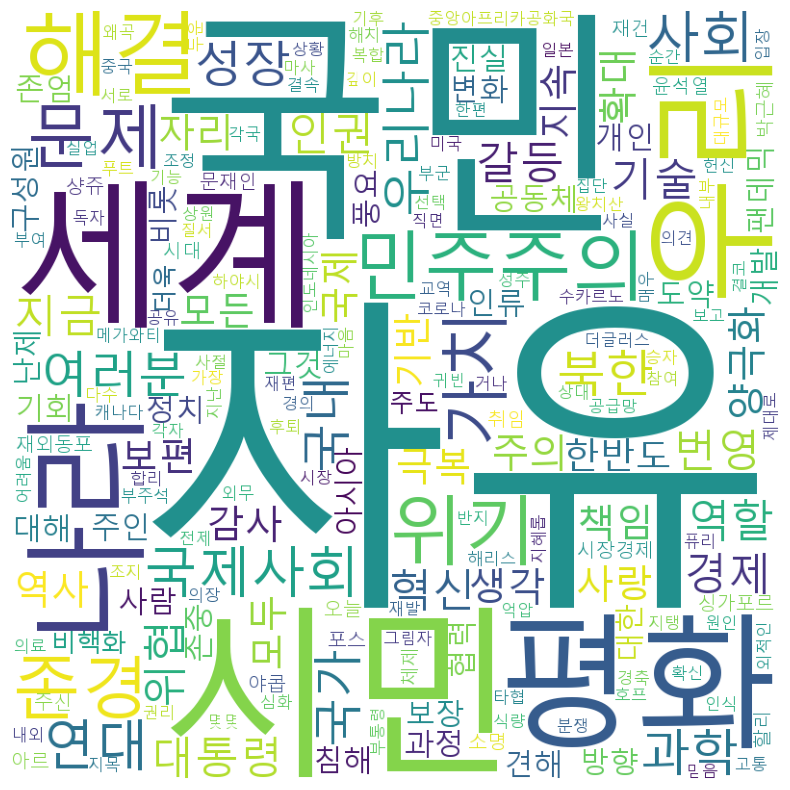

In [42]:
# 한글 워드크라우드 (윤석열)
count_kor_twentieth_yoon = Counter(word_list_okt_twentieth_yoon)
wordcloud_kor_twentieth_yoon = wordcloud.generate_from_frequencies(count_kor_twentieth_yoon)
fig_kor_twentieth_yoon = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud_kor_twentieth_yoon)